<p style="font-size:32px;"> DS projekt - Parking Lot Analysis - Roland Zsolt Nagy</p>

## Table of Contents 
(Respective headings need to be expanded in the notebook for the clickable references to work)

0. [Imports](#0-imports)

1. [Read CSV Files](#1-read-csv-files)

2. [Exploratory Data Analysis (EDA)](#2-exploratory-data-analysis-eda)

    - 2.1 ['parking_lots' table](#21-parking_lots-table)

    - 2.2 ['parking_sessions' table](#22-parking_sessions-table)

    - 2.3 ['transactions' table](#23-transactions-table)

    - 2.4 [Peak parking time analysis](#24-peak-parking-time-analysis)

3. [Feature engineering](#3-feature-engineering)

    - 3.1 [Merge tables](#31-merge-tables)

    - 3.2 [Question](#32-question) (Are there any discrepancies during merging?)

    - 3.3 [Question](#33-question) (Think of features that could be created ...)

4. [Understand parking personas](#4-understand-parking-personas)

    - 4.1 [Question](#41-question) (What type of parking lot users can you differentiate ... ?) <br>

5. [Explain the Results](#5-explain-the-results)

7. [Bonus task](#6-bonus-task)

8. [Different table merging approach](#7-different-table-merging-approach)


# 0. Imports

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Read CSV Files


In [ ]:
# Please find all the required input files for the project at:
# https://drive.google.com/drive/folders/1REFNYL-JqIhj8gaU7cGcxQWzzTS17Vwf?usp=sharing

parking_lots_df = pd.read_csv("parking_lots.csv")
parking_sessions_df = pd.read_csv("parking_sessions.csv")
transactions_df = pd.read_csv("transactions.csv")

# 2. Exploratory Data Analysis (EDA)

### 2.1 'parking_lots' table

In [3]:
# First overview of top 3 rows
print("parking_lots_df")
display(parking_lots_df.head(3))

# Check shape and nr. of unique values
print("Shape:", parking_lots_df.shape)
print()
print("Nr. (count) of values:")
display(parking_lots_df.count())
print()
print("Nr. of Unique values:")
display(parking_lots_df.nunique())

parking_lots_df


,ParkingLotId,Latitude,Longitude,ParkingSpace,City,State,Timezone
0,31a7ea48-ec83-441d-9e7d-5907b2024f3e,43.248102,-87.388549,39,Milwaukee,Wisconsin,GMT-7
1,90de355c-e1ac-48e4-8ea9-5ae4deb89c1c,29.956477,-97.905119,29,San Antonio,Texas,GMT-6
2,a1877052-5428-4d26-8188-be7827a6c98d,29.829458,-97.902774,15,San Antonio,Texas,GMT-6


Shape: (1165, 7)

Nr. (count) of values:


ParkingLotId    1165
Latitude        1008
Longitude       1008
ParkingSpace    1165
City            1142
State           1142
Timezone        1165
dtype: int64


Nr. of Unique values:


ParkingLotId    1165
Latitude        1008
Longitude       1008
ParkingSpace      50
City              72
State             25
Timezone           3
dtype: int64

- All records represent unique parking lots (as len of df = unique ParkingLotId values) 
- Parking lots in the dataset are located in 72 different cities found in 25 different states across 3 different time zones

In [4]:
# Check data types of variables
print(parking_lots_df.dtypes)

ParkingLotId     object
Latitude        float64
Longitude       float64
ParkingSpace      int64
City             object
State            object
Timezone         object
dtype: object


In [5]:
# Check missing values
print(parking_lots_df.isna().sum())

# Check number of unique (latitude, longitude) pairs
print("Nr. of Unique (latitude, longitude) pairs:", parking_lots_df.groupby(['Longitude', 'Latitude']).ngroups)
print("Nr. of rows", len(parking_lots_df))

ParkingLotId      0
Latitude        157
Longitude       157
ParkingSpace      0
City             23
State            23
Timezone          0
dtype: int64
Nr. of Unique (latitude, longitude) pairs: 1008
Nr. of rows 1165


- There are 1165 lots and 1008 locations
    - There are less geographic locations (latitude - longitude pairs) than parking lots (missing values for latitude and longitude) 

- Othen than latitude and longitude, missing values are only City and State
    - 23 in both, thus likely the same rows are not filled for both
    
- The Nr. of unique (latitude, longitude) pairs (= 1008) = Nr. of unique values in "Latitude" and in "Longitude", thus these features seem to represent valid coordinates 




In [6]:
# Check the only numerical feature: ParkingSpace 
print("'ParkingSpace' numerical feature statistical overview: ")
display(parking_lots_df["ParkingSpace"].describe())

'ParkingSpace' numerical feature statistical overview: 


count    1165.000000
mean       25.472103
std        14.368623
min         1.000000
25%        13.000000
50%        26.000000
75%        37.000000
max        50.000000
Name: ParkingSpace, dtype: float64

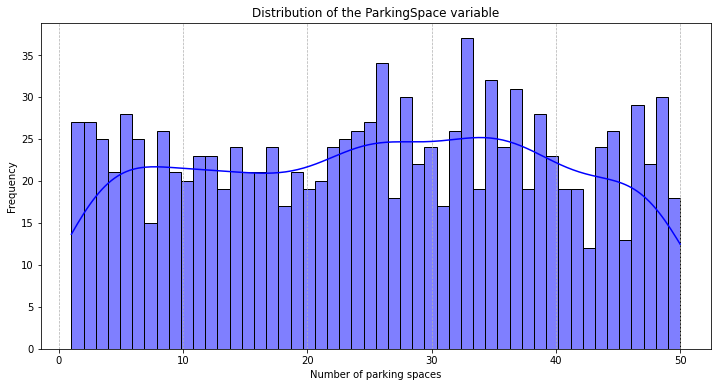

In [7]:
# Visualize the distribution of the columm ParkingSpace

plt.figure(figsize=(12, 6))

sns.histplot(parking_lots_df['ParkingSpace'], bins=50, kde=True, color='blue')

plt.title('Distribution of the ParkingSpace variable')
plt.xlabel('Number of parking spaces')
plt.ylabel('Frequency')

plt.grid(True, axis='x', linestyle='--', linewidth=0.7)
plt.show()

In [8]:
# Check some (5) of the most and least frequent number of available parking spaces (among all the 1165 parking lots)

parkingspace_value_counts = parking_lots_df["ParkingSpace"].value_counts().sort_values(ascending=False)
parkingspace_value_counts_df = parkingspace_value_counts.reset_index()

display(parkingspace_value_counts_df.head())
display(parkingspace_value_counts_df.tail())

parking_lots_df["ParkingSpace"].describe()

,ParkingSpace,count
0,33,37
1,26,34
2,35,32
3,37,31
4,49,30


,ParkingSpace,count
45,31,17
46,18,17
47,7,15
48,46,13
49,43,12


count    1165.000000
mean       25.472103
std        14.368623
min         1.000000
25%        13.000000
50%        26.000000
75%        37.000000
max        50.000000
Name: ParkingSpace, dtype: float64

The only numerical feature is the "ParkingSpaces", it is actually a discrete numerical variable instead of being continous as the maximum parking spaces that a lot can have is a whole number

- The smallest parking lot has only 1 parking space, 75% of the parking lots have 37 or less than 37 parking spaces, while the largest lot has 50 parking spaces 

- Generally it is similarly usual (similarly frequent) for parking lots to have any of [1 to 50] parking spaces based on the visualization of the distribution

    - The usual number of parking spaces is between 20 and 30 (as the usual level seen on the chart)
    
- There is no apparent pattern or tendency in the distribution of parking spaces, but based on the created tables:
    - The most common number of available parking spaces for parking lots are around ~33 to ~37 (where frequency 30+)
    - The least common number of available parking spaces for parking lots are around ~43 to ~46 (where frequency less than 15)

Nr. of Unique values for the remaining variables in the dataset:


City        72
State       25
Timezone     3
dtype: int64


'City' variable count of values:


City
Denver              179
Charlotte           152
Dallas               89
Milwaukee            80
Cleveland            55
                   ... 
Evergreen             1
Asheboro              1
Colorado Springs      1
Englewood             1
Tannersville          1
Name: count, Length: 72, dtype: int64

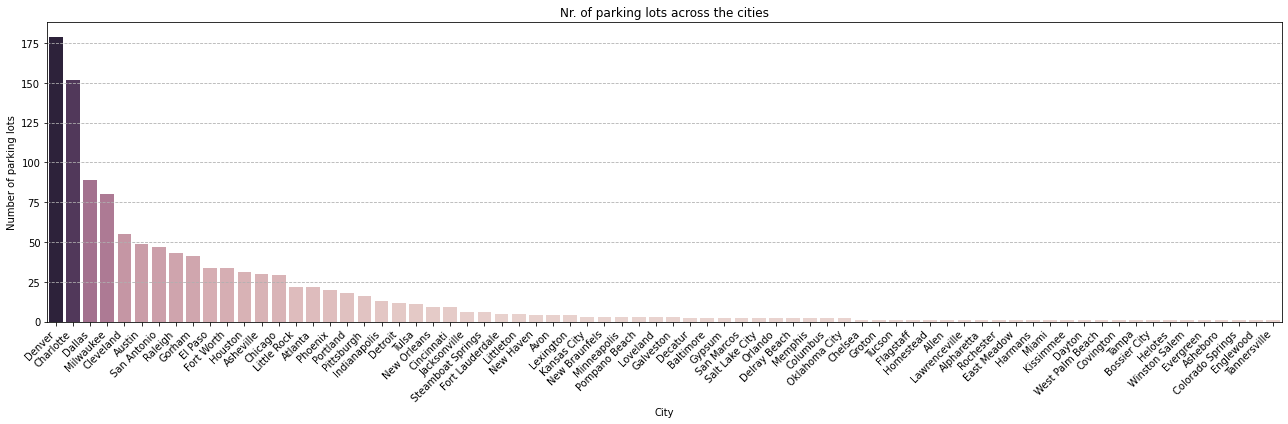

Chart (Nr. of parking lots distribution across the cities) statistics:
Mean - 15.9
Median - 3.0
75h percentile - 16.5





In [9]:
# Column "City"

print("Nr. of Unique values for the remaining variables in the dataset:")
display(parking_lots_df[["City", "State", "Timezone"]].nunique())
print()


# 'City' variable
# value counts
print("'City' variable count of values:")
city_value_counts = parking_lots_df["City"].value_counts()
display(city_value_counts)

# values distribution visualization 
plt.figure(figsize=(18, 6))
sns.barplot(x=city_value_counts.index, y=city_value_counts.values, hue=city_value_counts, legend=False)
plt.title('Nr. of parking lots across the cities')
plt.xlabel('City')
plt.ylabel('Number of parking lots')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# values distribution stats
print(f"Chart (Nr. of parking lots distribution across the cities) statistics:\n\
Mean - {round(np.mean(city_value_counts),1)}\n\
Median - {round(np.median(city_value_counts), 1)}\n\
75h percentile - {round(np.percentile(city_value_counts, 75), 1)}")
print("\n\n")

- Parking lots located in Denver and Charlotte cities are outstandingly frequent in the dataset compared to the other 70 cities  

- These 2 cities have an exceptionally high number of parking lots, with over 150 lots

    - while in half of the cities there are 3 or fewer lots
    
    - in 3/4 of the cities there are fewer than 17 parking lots
    
- The distribution of parking lots by cities is highly right-skewed

'State' variable count of values:


State
Texas             294
North Carolina    227
Colorado          202
Wisconsin          80
Ohio               67
Maine              59
Illinois           29
Georgia            26
Arizona            23
Florida            23
Arkansas           21
Pennsylvania       17
Oklahoma           13
Indiana            13
Michigan           12
Louisiana          10
Connecticut         5
Kentucky            5
Minnesota           4
Maryland            3
Missouri            3
Tennessee           2
Utah                2
Massachusetts       1
New York            1
Name: count, dtype: int64

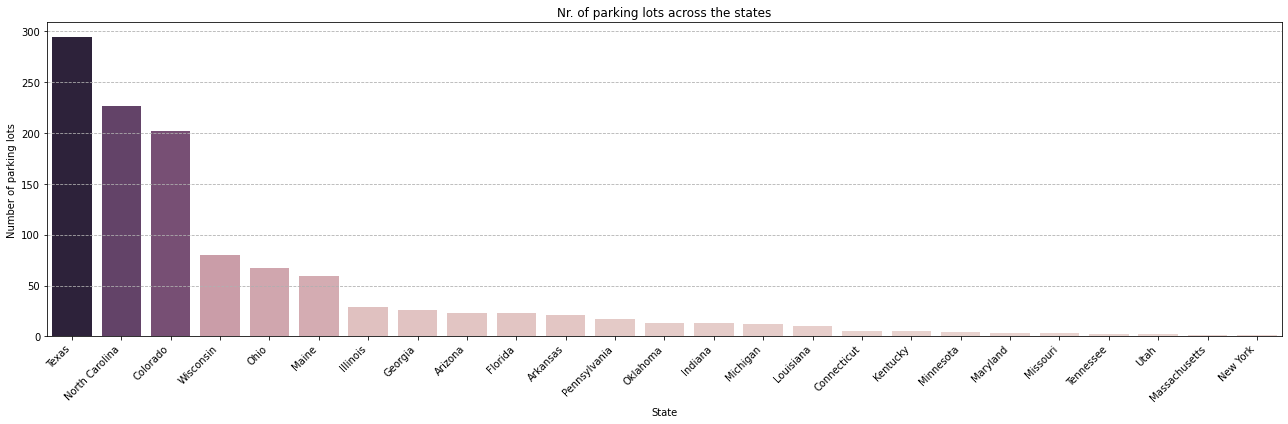

Chart (Nr. of parking lots distribution across the states) statistics:
Mean - 45.7
Median - 13.0
75h percentile - 29.0





In [10]:
# Column "State"

# value counts
print("'State' variable count of values:")
state_value_counts = parking_lots_df["State"].value_counts()
display(state_value_counts)

# values distribution visualization 
plt.figure(figsize=(18, 6))
sns.barplot(x=state_value_counts.index, y=state_value_counts.values, hue=state_value_counts, legend=False)
plt.title('Nr. of parking lots across the states')
plt.xlabel('State')
plt.ylabel('Number of parking lots')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# values distribution stats
print(f"Chart (Nr. of parking lots distribution across the states) statistics:\n\
Mean - {round(np.mean(state_value_counts),1)}\n\
Median - {round(np.median(state_value_counts), 1)}\n\
75h percentile - {round(np.percentile(state_value_counts, 75), 1)}")
print("\n\n")

- The states of Texas, North Carolina, and Colorado have an exceptionally high number of parking lots with over 200 lots

- In half of the states there are fewer than 46 lots and in 3/4 of the states there are 29 or fewer parking lots

- The distribution is highly right-skewed again

In [11]:
# Column "Timezone"

# value counts and percentages
print("'Timezone' variable count of values:")
timezone_value_counts = parking_lots_df["Timezone"].value_counts()
timezone_value_percentages = (timezone_value_counts / timezone_value_counts.sum()) * 100

# organize results in a df
timezone_value_distribution_df = pd.DataFrame({
    'Count': timezone_value_counts,
    'Ratio (%)': timezone_value_percentages
})
display(timezone_value_distribution_df.round(1))

'Timezone' variable count of values:


,Count,Ratio (%)
Timezone,,
GMT-7,403,34.6
GMT-6,381,32.7
GMT-5,381,32.7


- The parking lots in GMT-6 and GMT-5 are distributed almost equally

- GMT-6 and GMT-5 makes up 32.7% each, while GMT-7 is 34.6%

In [12]:
# Exploring relationships between variables: ParkingSpace vs City 

parking_lots_groupedby_cities_df = parking_lots_df.groupby('City')

total_parkingspace_by_city = parking_lots_groupedby_cities_df['ParkingSpace'].sum()
avg_parkingspace_by_city = parking_lots_groupedby_cities_df['ParkingSpace'].mean()

# check - should be the same
print("Average parking space per City: (2x)")
display((parking_lots_groupedby_cities_df['ParkingSpace'].sum()/parking_lots_groupedby_cities_df['ParkingLotId'].count())[:5])
display(avg_parkingspace_by_city[:5])
print()

 # check - as seen should be 72 unique values (the cities) with 179 as max (Denver)
print("Nr. of Cities:", len(parking_lots_groupedby_cities_df['ParkingLotId'].count()))
print("The most parking lot that a city has:", parking_lots_groupedby_cities_df['ParkingLotId'].count().max())
print()

print("Nr. of parking lots per City (top 5):")
display(city_value_counts.sort_values(ascending=False)[:5])
print()

print("Total nr. of parking space per City (top 5):")
display(total_parkingspace_by_city.sort_values(ascending=False)[:5])
print()

print("Average parking space per City (top 5):")
display(avg_parkingspace_by_city.sort_values(ascending=False)[:5])

Average parking space per City: (2x)


City
Allen         41.000000
Alpharetta    12.000000
Asheboro       1.000000
Asheville     23.066667
Atlanta       25.136364
dtype: float64

City
Allen         41.000000
Alpharetta    12.000000
Asheboro       1.000000
Asheville     23.066667
Atlanta       25.136364
Name: ParkingSpace, dtype: float64


Nr. of Cities: 72
The most parking lot that a city has: 179

Nr. of parking lots per City (top 5):


City
Denver       179
Charlotte    152
Dallas        89
Milwaukee     80
Cleveland     55
Name: count, dtype: int64


Total nr. of parking space per City (top 5):


City
Denver       4790
Charlotte    3664
Milwaukee    2187
Dallas       2121
Cleveland    1500
Name: ParkingSpace, dtype: int64


Average parking space per City (top 5):


City
Dayton           49.0
Harmans          47.0
Tampa            46.0
Lawrenceville    45.0
Allen            41.0
Name: ParkingSpace, dtype: float64

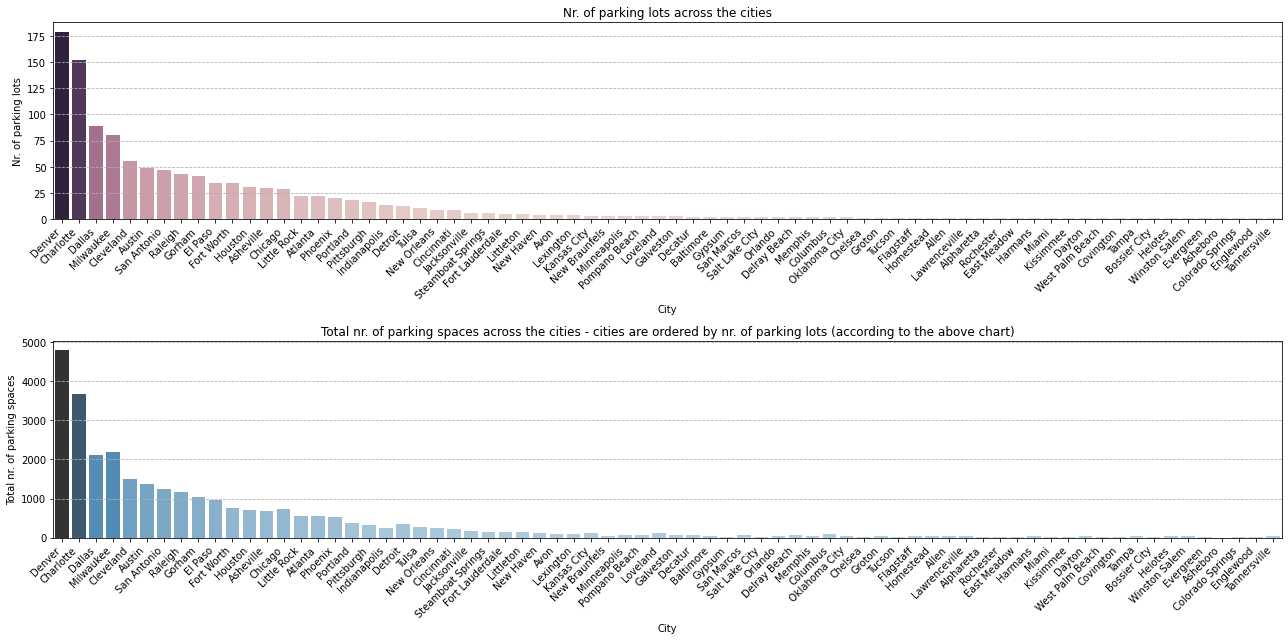

In [13]:
# Charts: examine how the Nr. of parking lots vs. how the Total nr. of parking spaces is changing across the cities

fig, ax = plt.subplots(2, 1, figsize=(18, 9))

# First chart
# Nr. of parking lots across the cities
sns.barplot(x=city_value_counts.index, 
            y=city_value_counts.values,
            ax=ax[0],
            hue=city_value_counts.values,
            legend=False)
# Labeling
ax[0].set_title('Nr. of parking lots across the cities')
ax[0].set_ylabel('Nr. of parking lots')
ax[0].grid(axis='y', linestyle='--')
ax[0].set_xticks(range(len(city_value_counts.index)))
ax[0].set_xticklabels(city_value_counts.index, rotation=45, ha='right')


# Second chart
# Total nr. of parking spaces across the cities - cities are ordered by nr. of parking lots (according to the above chart)
cities_ordered_by_nr_of_parking_lots = city_value_counts.sort_values(ascending=False).index
sns.barplot(x=total_parkingspace_by_city.loc[cities_ordered_by_nr_of_parking_lots].index,
            y=total_parkingspace_by_city.loc[cities_ordered_by_nr_of_parking_lots].values,
            ax=ax[1],
            hue=total_parkingspace_by_city.loc[cities_ordered_by_nr_of_parking_lots].values,
            legend=False, 
            palette="Blues_d")
# Labeling
ax[1].set_title('Total nr. of parking spaces across the cities - cities are ordered by nr. of parking lots (according to the above chart)')
ax[1].set_xlabel('City')
ax[1].set_ylabel('Total nr. of parking spaces')
ax[1].grid(axis='y', linestyle='--')
ax[1].set_xticks(range(len(total_parkingspace_by_city)))
ax[1].set_xticklabels(cities_ordered_by_nr_of_parking_lots, rotation=45, ha='right')

plt.tight_layout()
plt.show()

- There is almost no difference between the order of cities in terms of number of parking lots vs. total number of parking spaces available in the city

    - But sometimes a city has more total number of parking spaces than the previous city: for example Milwaukee vs. Dallas

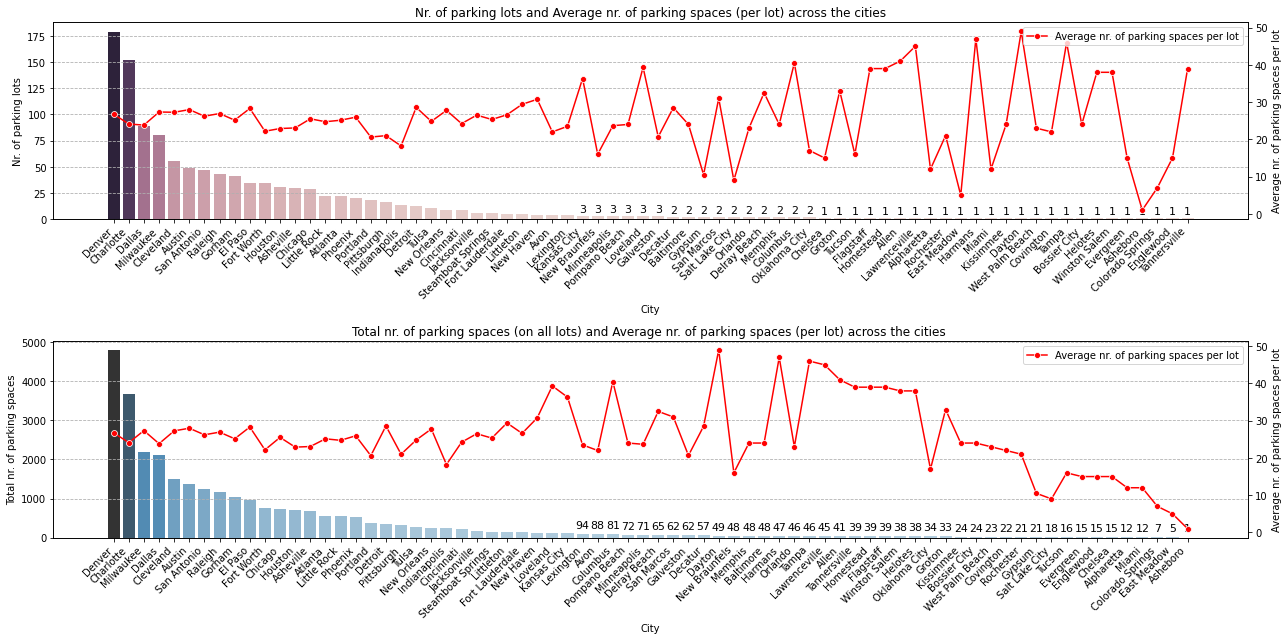

In [14]:
# Charts: examine how the Average nr. of parking spaces (per lot) is changing across the cities
    # based on nr. of parking lots vs. based on Total nr. of parking spaces (on all lots)

fig, ax = plt.subplots(2, 1, figsize=(18, 9))

# First chart
# Nr. of parking lots across the cities and Average nr. of parking spaces (per lot) across the cities
cities_ordered_by_nr_of_parking_lots = city_value_counts.sort_values(ascending=False).index
cities_ordered_by_nr_of_parking_lots_values = city_value_counts.sort_values(ascending=False).values
sns.barplot(x=cities_ordered_by_nr_of_parking_lots,
            y=cities_ordered_by_nr_of_parking_lots_values,
            ax=ax[0],
            hue=cities_ordered_by_nr_of_parking_lots_values,
            legend=False)

# Line plot for Average nr. of parking spaces per parking lot
ax2_1 = ax[0].twinx()
sns.lineplot(x=avg_parkingspace_by_city.loc[cities_ordered_by_nr_of_parking_lots].index,
             y=avg_parkingspace_by_city.loc[cities_ordered_by_nr_of_parking_lots].values,
             ax=ax2_1,
             color='red',
             marker='o',
             label='Average nr. of parking spaces per lot')

# Labeling
ax[0].set_title('Nr. of parking lots and Average nr. of parking spaces (per lot) across the cities')
ax[0].set_xlabel('City')
ax[0].set_xticks(range(len(cities_ordered_by_nr_of_parking_lots)))
ax[0].set_xticklabels(cities_ordered_by_nr_of_parking_lots, rotation=45, ha='right')
ax[0].set_ylabel('Nr. of parking lots')
ax2_1.set_ylabel('Average nr. of parking spaces per lot')
ax2_1.legend(loc='upper right')
ax[0].grid(axis='y', linestyle='--')
for index, value in enumerate(city_value_counts.sort_values(ascending=False)):
    if value <= 3:  # based on visual determination by examining the created chart
        ax[0].text(index, value + 2, str(int(value)), ha='center', va='bottom', fontsize=11)


# Second chart
# Total nr. of parking spaces across the cities
cities_ordered_by_nr_of_total_parkingspace = total_parkingspace_by_city.sort_values(ascending=False).index
cities_ordered_by_nr_of_total_parkingspace_values = total_parkingspace_by_city.sort_values(ascending=False).values
sns.barplot(x=cities_ordered_by_nr_of_total_parkingspace,
            y=cities_ordered_by_nr_of_total_parkingspace_values,
            ax=ax[1],
            hue=cities_ordered_by_nr_of_total_parkingspace_values,
            legend=False, 
            palette="Blues_d")

# Line plot for average nr. of parking spaces per parking lot
ax2_2 = ax[1].twinx()  # Secondary y-axis
sns.lineplot(x=avg_parkingspace_by_city.loc[cities_ordered_by_nr_of_total_parkingspace].index,
             y=avg_parkingspace_by_city.loc[cities_ordered_by_nr_of_total_parkingspace].values,
             ax=ax2_2,
             color='red',
             marker='o',
             label='Average nr. of parking spaces per lot')

# Labeling
ax[1].set_title('Total nr. of parking spaces (on all lots) and Average nr. of parking spaces (per lot) across the cities ')
ax[1].set_xlabel('City')
ax[1].set_xticks(range(len(cities_ordered_by_nr_of_total_parkingspace)))
ax[1].set_xticklabels(cities_ordered_by_nr_of_total_parkingspace, rotation=45, ha='right')
ax[1].set_ylabel('Total nr. of parking spaces')
ax2_2.set_ylabel('Average nr. of parking spaces per lot')
ax2_2.legend(loc='upper right')
ax[1].grid(axis='y', linestyle='--')
for index, value in enumerate(total_parkingspace_by_city.sort_values(ascending=False)):
    if value <= 94:  # based on visual determination by examining the created chart
        ax[1].text(index, value + 100, str(int(value)), ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()


**As the number of parking lots and total number of parking spaces decreases, the more volatile the average number of parking spaces per lot becomes (in the second chart then it gets stably decreasing)** <br><br>

**First chart:**
- If a city has at least 3 parking lots it is stable that the are on average around 90-100 parking spaces per lot in the city

 - In case a city has 3 or 2 parking lots: The less lot it has, the more volatile the average parking spaces per parking lots of the city is
 
- In case a city has only 1 parking lot (a bit less than half of the cities), it is visible that the parking lot can have either as few as 10 parking spaces or as many as 40-50 parking spaces
<br><br>

 **Second chart:**
- Volatility starts below ~100 total parking spaces. Until then, the average is around 2500.

- If a city has between ~100 and ~38 total parking spaces, the average parking space is generally higher than when a city has more total parking spaces. This means that, in these cities, there are generally larger parking lots, but fewer of them.

- Below having 50 or loss ptotal parking spaces, it is more and more likely to have only 1 parking lot and thus all the parking spaces are "coming" from there. This is why there is a decreasing trend, since the average starts to show the number of parking spaces of the only lot in the city. 

In [15]:
# Exploring relationships between variables: ParkingSpace vs State 

parking_lots_groupedby_states_df = parking_lots_df.groupby('State')

total_parkingspace_by_state = parking_lots_groupedby_states_df['ParkingSpace'].sum()
avg_parkingspace_by_state = parking_lots_groupedby_states_df['ParkingSpace'].mean()

# check - should be the same
print("Average parking space per state: (2x)")
display((parking_lots_groupedby_states_df['ParkingSpace'].sum()/parking_lots_groupedby_states_df['ParkingLotId'].count())[:5])
display(avg_parkingspace_by_state[:5])
print()

 # check - as seen should be 72 unique values (the states) with 179 as max (Denver)
print("Nr. of states:", len(parking_lots_groupedby_states_df['ParkingLotId'].count()))
print("state with the most parking lot:", parking_lots_groupedby_states_df['ParkingLotId'].count().max())
print()

print("Nr. of parking lots per state (top 5):")
display(state_value_counts.sort_values(ascending=False)[:5])
print()

print("Total nr. of parking space per state (top 5):")
display(total_parkingspace_by_state.sort_values(ascending=False)[:5])
print()

print("Average parking space per state (top 5):")
display(avg_parkingspace_by_state.sort_values(ascending=False)[:5])

Average parking space per state: (2x)


State
Arizona        26.173913
Arkansas       24.571429
Colorado       26.500000
Connecticut    31.200000
Florida        26.913043
dtype: float64

State
Arizona        26.173913
Arkansas       24.571429
Colorado       26.500000
Connecticut    31.200000
Florida        26.913043
Name: ParkingSpace, dtype: float64


Nr. of states: 25
state with the most parking lot: 294

Nr. of parking lots per state (top 5):


State
Texas             294
North Carolina    227
Colorado          202
Wisconsin          80
Ohio               67
Name: count, dtype: int64


Total nr. of parking space per state (top 5):


State
Texas             7401
North Carolina    5553
Colorado          5353
Wisconsin         2187
Ohio              1848
Name: ParkingSpace, dtype: int64


Average parking space per state (top 5):


State
Missouri       36.333333
Maryland       31.666667
Connecticut    31.200000
Michigan       28.583333
Ohio           27.582090
Name: ParkingSpace, dtype: float64

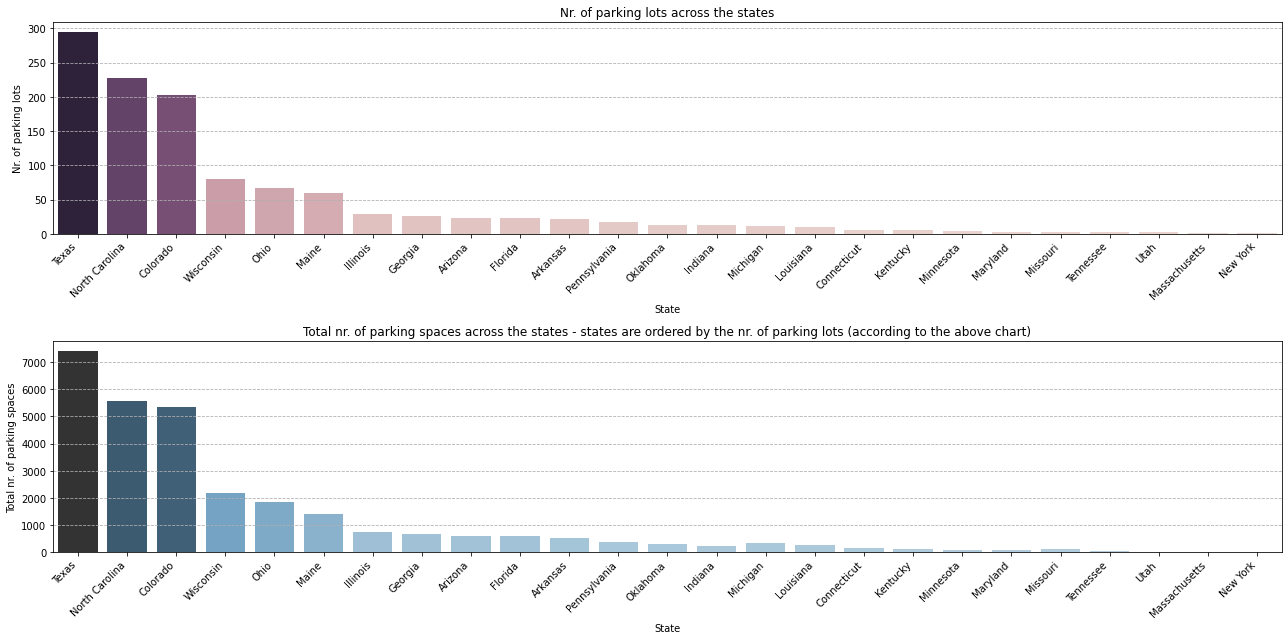

In [16]:
# Charts: examine how the Nr. of parking lots vs. how the Total nr. of parking spaces is changing across the states

fig, ax = plt.subplots(2, 1, figsize=(18, 9))

# First chart
# Nr. of parking lots across the states
sns.barplot(x=state_value_counts.index, 
            y=state_value_counts.values,
            ax=ax[0],
            hue=state_value_counts.values,
            legend=False)
# Labeling
ax[0].set_title('Nr. of parking lots across the states')
ax[0].set_ylabel('Nr. of parking lots')
ax[0].grid(axis='y', linestyle='--')
ax[0].set_xticks(range(len(state_value_counts.index)))
ax[0].set_xticklabels(state_value_counts.index, rotation=45, ha='right')


# Second chart
# Total nr. of parking spaces across the states - states are ordered by nr. of parking lots (according to the above chart)
states_ordered_by_nr_of_parking_lots = state_value_counts.sort_values(ascending=False).index
sns.barplot(x=total_parkingspace_by_state.loc[states_ordered_by_nr_of_parking_lots].index,
            y=total_parkingspace_by_state.loc[states_ordered_by_nr_of_parking_lots].values,
            ax=ax[1],
            hue=total_parkingspace_by_state.loc[states_ordered_by_nr_of_parking_lots].values,
            legend=False, 
            palette="Blues_d")
# Labeling
ax[1].set_title('Total nr. of parking spaces across the states - states are ordered by the nr. of parking lots (according to the above chart)')
ax[1].set_xlabel('State')
ax[1].set_ylabel('Total nr. of parking spaces')
ax[1].grid(axis='y', linestyle='--')
ax[1].set_xticks(range(len(total_parkingspace_by_state)))
ax[1].set_xticklabels(states_ordered_by_nr_of_parking_lots, rotation=45, ha='right')

plt.tight_layout()
plt.show()

- According to the above charts, the differences in the number of parking lots and spaces across the states are much smaller compared to the cities (as the state level is quite 'high level' aggregation)

- For example Colorado "performs" better for the total number of parking spaces than for the number of parking lots when compared to other cities

    - This could imply that it has generally slightly larger parking lots
- Sometimes the order switches: for example Michigan compared to Indiana, this suggests that Michigan has generally larger parking lots than Indiana"

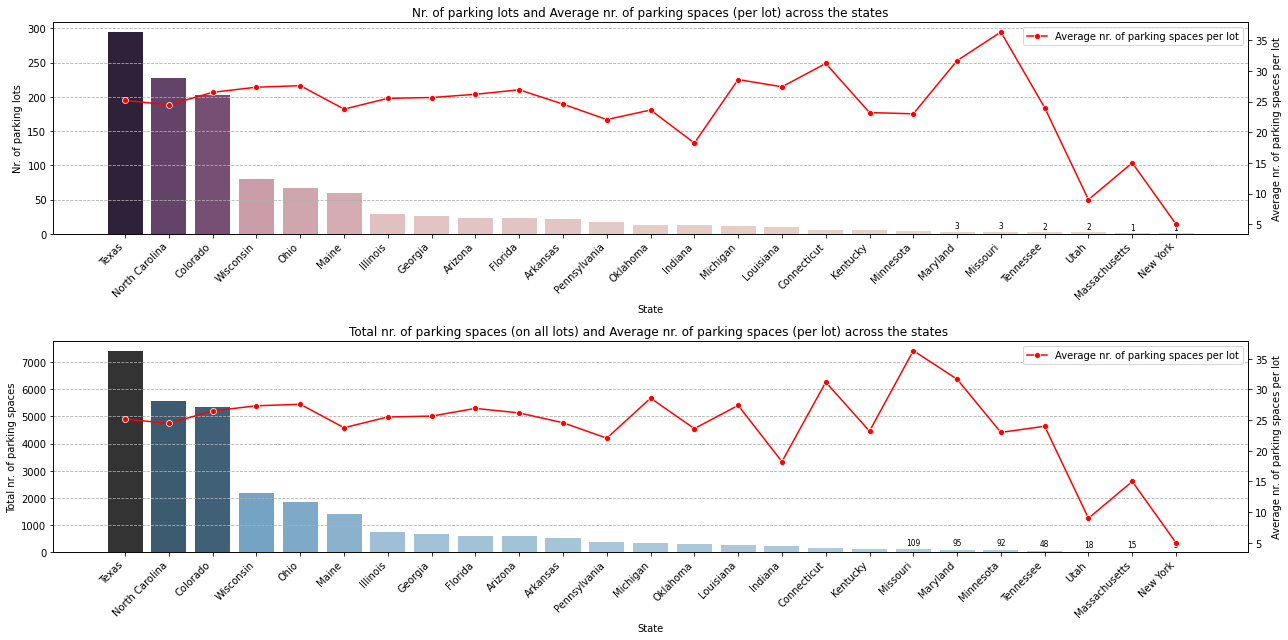

In [17]:
# Charts: examine how the Average nr. of parking spaces (per lot) is changing across the states
    # based on nr. of parking lots vs. based on Total nr. of parking spaces (on all lots)

fig, ax = plt.subplots(2, 1, figsize=(18, 9))

# First chart
# Nr. of parking lots across the states and Average nr. of parking spaces (per lot) across the states
states_ordered_by_nr_of_parking_lots = state_value_counts.sort_values(ascending=False).index
states_ordered_by_nr_of_parking_lots_values = state_value_counts.sort_values(ascending=False).values
sns.barplot(x=states_ordered_by_nr_of_parking_lots,
            y=states_ordered_by_nr_of_parking_lots_values,
            ax=ax[0],
            hue=states_ordered_by_nr_of_parking_lots_values,
            legend=False)

# Line plot for Average nr. of parking spaces per parking lot
ax2_1 = ax[0].twinx()
sns.lineplot(x=avg_parkingspace_by_state.loc[states_ordered_by_nr_of_parking_lots].index,
             y=avg_parkingspace_by_state.loc[states_ordered_by_nr_of_parking_lots].values,
             ax=ax2_1,
             color='red',
             marker='o',
             label='Average nr. of parking spaces per lot')

# Labeling
ax[0].set_title('Nr. of parking lots and Average nr. of parking spaces (per lot) across the states')
ax[0].set_xlabel('State')
ax[0].set_xticks(range(len(states_ordered_by_nr_of_parking_lots)))
ax[0].set_xticklabels(states_ordered_by_nr_of_parking_lots, rotation=45, ha='right')
ax[0].set_ylabel('Nr. of parking lots')
ax2_1.set_ylabel('Average nr. of parking spaces per lot')
ax2_1.legend(loc='upper right')
ax[0].grid(axis='y', linestyle='--')
for index, value in enumerate(state_value_counts.sort_values(ascending=False)):
    if value <= 3:  # based on visual determination by examining the created chart
        ax[0].text(index, value + 2, str(int(value)), ha='center', va='bottom', fontsize=7.5)


# Second chart
# Total nr. of parking spaces across the states
states_ordered_by_nr_of_total_parkingspace = total_parkingspace_by_state.sort_values(ascending=False).index
states_ordered_by_nr_of_total_parkingspace_values = total_parkingspace_by_state.sort_values(ascending=False).values
sns.barplot(x=states_ordered_by_nr_of_total_parkingspace,
            y=states_ordered_by_nr_of_total_parkingspace_values,
            ax=ax[1],
            hue=states_ordered_by_nr_of_total_parkingspace_values,
            legend=False, 
            palette="Blues_d")

# Line plot for average nr. of parking spaces per parking lot
ax2_2 = ax[1].twinx()  # Secondary y-axis
sns.lineplot(x=avg_parkingspace_by_state.loc[states_ordered_by_nr_of_total_parkingspace].index,
             y=avg_parkingspace_by_state.loc[states_ordered_by_nr_of_total_parkingspace].values,
             ax=ax2_2,
             color='red',
             marker='o',
             label='Average nr. of parking spaces per lot')

# Labeling
ax[1].set_title('Total nr. of parking spaces (on all lots) and Average nr. of parking spaces (per lot) across the states ')
ax[1].set_xlabel('State')
ax[1].set_xticks(range(len(states_ordered_by_nr_of_total_parkingspace)))
ax[1].set_xticklabels(states_ordered_by_nr_of_total_parkingspace, rotation=45, ha='right')
ax[1].set_ylabel('Total nr. of parking spaces')
ax2_2.set_ylabel('Average nr. of parking spaces per lot')
ax2_2.legend(loc='upper right')
ax[1].grid(axis='y', linestyle='--')
for index, value in enumerate(total_parkingspace_by_state.sort_values(ascending=False)):
    if value <= 110:  # based on visual determination by examining the created chart
        ax[1].text(index, value + 100, str(int(value)), ha='center', va='bottom', fontsize=7.5)

plt.tight_layout()
plt.show()

**As the number of parking lots and total number of parking spaces decreases, the more volatile the average number of parking spaces per lot becomes**
- In the first chart the average parking space starts to vary more starting from Indiana (from having ~20 lots or less)

- In the first chart the average parking space starts to vary more starting from Pennsylvania (from having ~400 parking spaces in total or less) <br><br>


**First chart**
- In Maryland and Missouri states (having only 3 parking lots altogether) the average parking spaces per the 3 lots are higher than if a state has more parking lots

- In Utah there are only 2, in Massachusetts and New York states only 1 parking lots, and they are much smaller than the average lots in other states <br><br>


**Second chart**
- The average number of parking spaces per lot is exceptionally high in the states of Missouri and Maryland, even though there are relatively very few total parking spaces (109, 95), indicating that there are generally larger parking lots in these states

- In the states of Utah, Massachusetts, and New York, the average number of parking spaces per lot is exceptionally low, as there are relatively very few total parking spaces (18, 15, 1), indicating that there are very small parking lots in these states

### 2.2 'parking_sessions' table

In [18]:
print("parking_sessions_df")
display(parking_sessions_df.head(3))

print("Shape:", parking_sessions_df.shape)

parking_sessions_df


,ParkingSessionId,PlateNumber,EntryDate,ExitDate,ParkingLotId,Make,Color
0,95f18106-b717-43dd-81b6-b6fbaec23e54,HJ08CW,2023-11-04 20:44:24.474000+00:00,2023-11-04 22:52:47.899000+00:00,21d37c77-7426-4843-bb64-9f5e283e973e,JEEP,White
1,d59c0519-3116-4530-892a-ec896744d0e5,0YEX66Q,2023-10-28 18:50:02.208000+00:00,2023-10-28 19:24:00.896000+00:00,3429b299-4266-4fe3-9fe3-8ea718ef8756,TESLA,Purple
2,3e25744e-6bd2-4c3b-b252-9fcd715fe99b,AFB580I,2023-10-21 17:38:49.466000+00:00,2023-10-21 20:10:59.252000+00:00,65dcf5db-550a-4a1e-a903-9ac5814f669d,Ford,Orange


Shape: (941096, 7)


In [19]:
parking_sessions_df.dtypes

ParkingSessionId    object
PlateNumber         object
EntryDate           object
ExitDate            object
ParkingLotId        object
Make                object
Color               object
dtype: object

In [20]:
# No numerical data type variable, thus describes return statistical overview for count, nr. of unique values, the most frequent value and the nr. of its occurence
parking_sessions_df.describe()

,ParkingSessionId,PlateNumber,EntryDate,ExitDate,ParkingLotId,Make,Color
count,941096,941096,941096,941096,941096,941096,941096
unique,941096,828399,940802,940817,262,14,9
top,f053ad7a-a64b-4569-9530-56d7fe5faffb,300304P,2023-11-05 04:02:58.821000+00:00,2023-10-24 18:36:35.520000+00:00,b6260b52-c371-4f07-a400-938553745c3f,Ford,Black
freq,1,27,2,2,63937,159519,187898


In [21]:
# The count for every variable is the length of the dataframe (941 096), there seems to be no missing values, check:

parking_sessions_df.isna().sum()

ParkingSessionId    0
PlateNumber         0
EntryDate           0
ExitDate            0
ParkingLotId        0
Make                0
Color               0
dtype: int64

In [22]:
# Column "ParkingSessionID"
parking_sessions_df["ParkingSessionId"].describe()

count                                   941096
unique                                  941096
top       f053ad7a-a64b-4569-9530-56d7fe5faffb
freq                                         1
Name: ParkingSessionId, dtype: object

- count = nr. of unique values = 941 096

-  nr. of the most frequent value's occurence = 1    
    - these points are proofs that ParkingSessionID is a proper identifier column each record describing truly individual parking sessions

In [23]:
# Column "PlateNumber" 
# used the phrase 'entry/entries' for the parking sessions in the following interpretation:
print("Total nr. of lot entries:", parking_sessions_df["ParkingSessionId"].count())
print(f'These entries were made by {parking_sessions_df["PlateNumber"].nunique()} different cars ( = Nr. of different cars i.e. plate numbers)')
print()

platenumber_value_counts = parking_sessions_df["PlateNumber"].value_counts() 
cars_single_entry = platenumber_value_counts[platenumber_value_counts == 1]
cars_multiple_entry = platenumber_value_counts[platenumber_value_counts > 1]

print(f"Nr. of different cars that entered a lot once: {len(cars_single_entry)}\n\
The total number of times they entered: {cars_single_entry.sum()}")
print()
print(f"Nr. of different cars that entered a lot multiple times: {len(cars_multiple_entry)}\n\
The total number of times they entered: {cars_multiple_entry.sum()}")

display(cars_single_entry)
display(cars_multiple_entry)


Total nr. of lot entries: 941096
These entries were made by 828399 different cars ( = Nr. of different cars i.e. plate numbers)

Nr. of different cars that entered a lot once: 753633
The total number of times they entered: 753633

Nr. of different cars that entered a lot multiple times: 74766
The total number of times they entered: 187463


PlateNumber
ZHQ654C    1
XH9T3LA    1
FLY138F    1
CNM010R    1
DEBZ94L    1
          ..
SPLEZR     1
RUV39HB    1
307BCKC    1
427BBSX    1
BSC708T    1
Name: count, Length: 753633, dtype: int64

PlateNumber
300304P     27
300539I     25
300304M     23
DCF075F     22
CQV7221X    21
            ..
HTTPSH       2
GLC669V      2
DSU103W      2
AFB580C      2
PEE274Z      2
Name: count, Length: 74766, dtype: int64

In [24]:
# Column "PlateNumber"

print("Ratio of cars that has entered a lot only one time:")
print(f"{len(cars_single_entry) / parking_sessions_df['PlateNumber'].nunique() * 100:.2f}% \
({len(cars_single_entry)}/{parking_sessions_df['PlateNumber'].nunique()})")
print("Ratio of cars that has entered a lot multiple times:")
print(f"{len(cars_multiple_entry) / parking_sessions_df['PlateNumber'].nunique() * 100:.2f}% \
({len(cars_multiple_entry)}/{parking_sessions_df['PlateNumber'].nunique()})")

print()

print("Ratio of total lot entries (parking sessions) that were made by such cars that entered a lot only one time:")
print(f"{cars_single_entry.sum() / parking_sessions_df['ParkingSessionId'].count() * 100:.2f}% \
({cars_single_entry.sum()}/{parking_sessions_df['ParkingSessionId'].count()})")
print("Ratio of total lot entries (parking sessions) that were made by such cars that entered a lot at one another time too (at least once):")
print(f"{cars_multiple_entry.sum() / parking_sessions_df['ParkingSessionId'].count() * 100:.2f}% \
({cars_multiple_entry.sum()}/{parking_sessions_df['ParkingSessionId'].count()})")

Ratio of cars that has entered a lot only one time:
90.97% (753633/828399)
Ratio of cars that has entered a lot multiple times:
9.03% (74766/828399)

Ratio of total lot entries (parking sessions) that were made by such cars that entered a lot only one time:
80.08% (753633/941096)
Ratio of total lot entries (parking sessions) that were made by such cars that entered a lot at one another time too (at least once):
19.92% (187463/941096)


- It is visible that only 9% of the cars have parked multiple times, but these account for about 20% of all parking sessions

In [25]:
print("Statistics for the distribution of cars (plate numbers): \
shows how many times a car has entered a lot (had a parking session)")
display(platenumber_value_counts.describe())

print(f"90th percentile: {round(np.percentile(platenumber_value_counts, 90), 1)}")
print(f"91th percentile: {round(np.percentile(platenumber_value_counts, 91), 1)}")
print(f"99th percentile: {round(np.percentile(platenumber_value_counts, 99), 1)}")
print(f"Nr. of cars that has entered a lot (had a parking session) more than 3 times: \
{len(platenumber_value_counts[platenumber_value_counts>3])} \
({len(platenumber_value_counts[platenumber_value_counts>3])/parking_sessions_df['PlateNumber'].nunique()* 100:.2f}%)")


Statistics for the distribution of cars (plate numbers): shows how many times a car has entered a lot (had a parking session)


count    828399.000000
mean          1.136042
std           0.556861
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          27.000000
Name: count, dtype: float64

90th percentile: 1.0
91th percentile: 2.0
99th percentile: 3.0
Nr. of cars that has entered a lot (had a parking session) more than 3 times: 8010 (0.97%)


- Only from the 91st percentile onwards the number of parking sessions are 2 (instead of 1) for the same
    - corresponds to the ratio of cars that have entered a lot only once: 90.97%

- At the 99th percentile, there are still only 3 parking sessions per car

- There are 8,010 cars (which is only 0.97%) that have parked more than 3 times, while the maximum is 27

In [26]:
# Columns "EntryDate" and "ExitDate"
parking_sessions_df[["EntryDate", "ExitDate"]].describe()

,EntryDate,ExitDate
count,941096,941096
unique,940802,940817
top,2023-11-05 04:02:58.821000+00:00,2023-10-24 18:36:35.520000+00:00
freq,2,2


- The unique values do not match the count for the entry and exit dates

- There are identical entry and exit dates (the same date can occur a maximum of 2 times)

- Could be due to:
    - If the same ParkingLotId is associated with the same EntryDate twice, then the same session has been entered twice (and one of them is likely erroneous)

    - If two different ParkingLotIds are associated with the same EntryDate, then two different cars entered at the exact same time in two different lots.
    
        - It’s possible that the the entry/exit datetimes are not the same, they just appear the same due to the different time zones (the EntryDate and ExitDate columns should be converted to a common time zone)

In [27]:
print(parking_sessions_df.shape)
print(parking_lots_df.shape)

# In case there would be leading and trailing spaces, but I wouldn't assume them for such an Id column
parking_sessions_df['ParkingLotId'] = parking_sessions_df['ParkingLotId'].str.strip()
parking_lots_df['ParkingLotId'] = parking_lots_df['ParkingLotId'].str.strip()

parking_sessions_with_lots_df = pd.merge(parking_sessions_df, parking_lots_df, on='ParkingLotId', how='left')
print(parking_sessions_with_lots_df.shape)

(941096, 7)
(1165, 7)
(941096, 13)


In [28]:
# Convert date colums to datetime data type
# parking_sessions_with_lots_df['EntryDate_adjusted'] = pd.to_datetime(parking_sessions_with_lots_df['EntryDate'], errors='coerce')
# parking_sessions_with_lots_df['ExitDate_adjusted'] = pd.to_datetime(parking_sessions_with_lots_df['ExitDate'], errors='coerce')

# # Adjust times to a single time zone: to 'GMT-6' as it's in the middle
# def adjust_time(row):
#     if row['Timezone'] == 'GMT-5':
#         parking_sessions_with_lots_df.loc[row.name, 'EntryDate_adjusted'] += pd.Timedelta(hours=1)
#         parking_sessions_with_lots_df.loc[row.name, 'ExitDate_adjusted'] += pd.Timedelta(hours=1)
#     elif row['Timezone'] == 'GMT-7':
#         parking_sessions_with_lots_df.loc[row.name, 'EntryDate_adjusted'] -= pd.Timedelta(hours=1)
#         parking_sessions_with_lots_df.loc[row.name, 'ExitDate_adjusted'] -= pd.Timedelta(hours=1)

# # Apply adjustment + progress monitor
# for index, row in parking_sessions_with_lots_df.iterrows():
#     adjust_time(row)
#     if (index + 1) % 100 == 0:
#         print(f'Processed {index + 1} of {parking_sessions_with_lots_df.shape[0]} rows')

Running previous cell in local environment results in: "MemoryError: Unable to allocate 7.18 MiB for an array with shape (1, 941096) and data type datetime64[ns]"

Because of memory issues making the same computation in Google Colab: https://colab.research.google.com/drive/1NB2a-BqdGhSFRmi7cV2Qhdw-XMnSWsV1?usp=sharing

-  exporting the new df from there and importing it here

- other option would have been to save 'parking_sessions_with_lots_df' as csv and read-in and process it in chunks

In [29]:
parking_sessions_with_lots_df_adjusted_times = pd.read_csv("parking_sessions_with_lots_df_adjusted_times.csv")
parking_sessions_with_lots_df_adjusted_times[["Timezone", "EntryDate", "EntryDate_adjusted", "ExitDate", "ExitDate_adjusted"]]

,Timezone,EntryDate,EntryDate_adjusted,ExitDate,ExitDate_adjusted
0,GMT-5,2023-11-04 20:44:24.474000+00:00,2023-11-04 21:44:24.474000+00:00,2023-11-04 22:52:47.899000+00:00,2023-11-04 23:52:47.899000+00:00
1,GMT-7,2023-10-28 18:50:02.208000+00:00,2023-10-28 17:50:02.208000+00:00,2023-10-28 19:24:00.896000+00:00,2023-10-28 18:24:00.896000+00:00
2,GMT-5,2023-10-21 17:38:49.466000+00:00,2023-10-21 18:38:49.466000+00:00,2023-10-21 20:10:59.252000+00:00,2023-10-21 21:10:59.252000+00:00
3,GMT-5,2023-10-22 23:11:41.597000+00:00,2023-10-23 00:11:41.597000+00:00,2023-10-23 00:17:47.127000+00:00,2023-10-23 01:17:47.127000+00:00
4,GMT-5,2023-10-24 21:12:06.023000+00:00,2023-10-24 22:12:06.023000+00:00,2023-10-24 21:35:30.628000+00:00,2023-10-24 22:35:30.628000+00:00
...,...,...,...,...,...
941091,GMT-6,2023-11-19 01:40:09.502000+00:00,2023-11-19 01:40:09.502000+00:00,2023-11-19 02:46:36.812000+00:00,2023-11-19 02:46:36.812000+00:00
941092,GMT-6,2023-11-19 02:38:40.504000+00:00,2023-11-19 02:38:40.504000+00:00,2023-11-19 02:54:37.999000+00:00,2023-11-19 02:54:37.999000+00:00
941093,GMT-6,2023-11-19 02:58:34.356000+00:00,2023-11-19 02:58:34.356000+00:00,2023-11-19 03:16:13.006000+00:00,2023-11-19 03:16:13.006000+00:00
941094,GMT-5,2023-10-31 17:19:07.756000+00:00,2023-10-31 18:19:07.756000+00:00,2023-10-31 20:23:11.315000+00:00,2023-10-31 21:23:11.315000+00:00


EntryDate and ExitDate conversion was succesful

Some datetimes are not in the exact same format as most of them, for example in the dataset there is '2023-10-20 22:58:39+00:00',
which does not have fractional seconds as the other usual datetimes (2023-10-31 17:19:07.756000+00:00)
- for such datetime values the pd.to_datetime() function fails to convert them to datetime data type (fractional seconds format for dates are inferred by the function)

Check these:

In [30]:
diff_datetformat_entrydates = parking_sessions_with_lots_df_adjusted_times[parking_sessions_with_lots_df_adjusted_times['EntryDate_adjusted'].isna()][['EntryDate', 'EntryDate_adjusted']]
diff_datetformat_exitdates = parking_sessions_with_lots_df_adjusted_times[parking_sessions_with_lots_df_adjusted_times['ExitDate_adjusted'].isna()][['ExitDate', 'ExitDate_adjusted']]

print(len(diff_datetformat_entrydates))
display(diff_datetformat_entrydates.head())
print()
print(len(diff_datetformat_exitdates))
display(diff_datetformat_exitdates.head())

# For such rows I could have dealt with their conversion in Google Colab as well and export the dataframe from there with these rows too already dealt with

923


,EntryDate,EntryDate_adjusted
702,2023-10-20 22:58:39+00:00,NaN
2278,2023-11-12 21:15:44+00:00,NaN
2744,2023-10-21 01:41:35+00:00,NaN
3844,2023-11-02 20:56:27+00:00,NaN
3916,2023-11-13 21:27:17+00:00,NaN



964


,ExitDate,ExitDate_adjusted
471,2023-10-21 00:41:16+00:00,NaN
1271,2023-10-21 00:28:25+00:00,NaN
2865,2023-10-21 01:57:05+00:00,NaN
3191,2023-11-19 20:44:47+00:00,NaN
3685,2023-11-02 14:21:26+00:00,NaN


For such rows use the to_datetime() function again, but this time set the not set the errors parameter to coerce, so that the to_datetime() function is forced to convert all values to datetime

- This time the to_datetime() function will infer the datetime format without fractional seconds

In [31]:
# Convert date colums to datetime data type
parking_sessions_with_lots_df_adjusted_times.loc[diff_datetformat_entrydates.index, 'EntryDate_adjusted'] = pd.to_datetime(
    parking_sessions_with_lots_df_adjusted_times.loc[diff_datetformat_entrydates.index, 'EntryDate']) #, format='%Y-%m-%d %H:%M:%S%z') 

parking_sessions_with_lots_df_adjusted_times.loc[diff_datetformat_exitdates.index, 'ExitDate_adjusted'] = pd.to_datetime(
    parking_sessions_with_lots_df_adjusted_times.loc[diff_datetformat_exitdates.index, 'ExitDate']) #, format='%Y-%m-%d %H:%M:%S%z')

In [32]:
display(parking_sessions_with_lots_df_adjusted_times.loc[diff_datetformat_entrydates.index][["EntryDate", "EntryDate_adjusted"]].head())
display(len(parking_sessions_with_lots_df_adjusted_times[parking_sessions_with_lots_df_adjusted_times['EntryDate_adjusted'].isna()]))

display(parking_sessions_with_lots_df_adjusted_times.loc[diff_datetformat_exitdates.index][["ExitDate", "ExitDate_adjusted"]].head())
display(len(parking_sessions_with_lots_df_adjusted_times[parking_sessions_with_lots_df_adjusted_times['ExitDate_adjusted'].isna()]))

,EntryDate,EntryDate_adjusted
702,2023-10-20 22:58:39+00:00,2023-10-20 22:58:39+00:00
2278,2023-11-12 21:15:44+00:00,2023-11-12 21:15:44+00:00
2744,2023-10-21 01:41:35+00:00,2023-10-21 01:41:35+00:00
3844,2023-11-02 20:56:27+00:00,2023-11-02 20:56:27+00:00
3916,2023-11-13 21:27:17+00:00,2023-11-13 21:27:17+00:00


0

,ExitDate,ExitDate_adjusted
471,2023-10-21 00:41:16+00:00,2023-10-21 00:41:16+00:00
1271,2023-10-21 00:28:25+00:00,2023-10-21 00:28:25+00:00
2865,2023-10-21 01:57:05+00:00,2023-10-21 01:57:05+00:00
3191,2023-11-19 20:44:47+00:00,2023-11-19 20:44:47+00:00
3685,2023-11-02 14:21:26+00:00,2023-11-02 14:21:26+00:00


0

In [33]:
# Runs for ~50s in my local environment

# Adjust datetime based on timezone for these rows as well

def adjust_time_entry(row):
    if row['Timezone'] == 'GMT-5':
        parking_sessions_with_lots_df_adjusted_times.loc[row.name, 'EntryDate_adjusted'] += pd.Timedelta(hours=1)
    elif row['Timezone'] == 'GMT-7':
        parking_sessions_with_lots_df_adjusted_times.loc[row.name, 'EntryDate_adjusted'] -= pd.Timedelta(hours=1)

def adjust_time_exit(row):
    if row['Timezone'] == 'GMT-5':
        parking_sessions_with_lots_df_adjusted_times.loc[row.name, 'ExitDate_adjusted'] += pd.Timedelta(hours=1)
    elif row['Timezone'] == 'GMT-7':
        parking_sessions_with_lots_df_adjusted_times.loc[row.name, 'ExitDate_adjusted'] -= pd.Timedelta(hours=1)

# Apply adjustment
for index, row in parking_sessions_with_lots_df_adjusted_times.loc[diff_datetformat_entrydates.index].iterrows():
    adjust_time_entry(row)

for index, row in parking_sessions_with_lots_df_adjusted_times.loc[diff_datetformat_exitdates.index].iterrows():
    adjust_time_exit(row)

In [34]:
# Check adjusted Entry and Exit dates

parking_sessions_with_lots_df_adjusted_times['EntryDate_adjusted'] = pd.to_datetime(parking_sessions_with_lots_df_adjusted_times['EntryDate_adjusted'])
parking_sessions_with_lots_df_adjusted_times['ExitDate_adjusted'] = pd.to_datetime(parking_sessions_with_lots_df_adjusted_times['ExitDate_adjusted'])


display(parking_sessions_with_lots_df_adjusted_times.loc[diff_datetformat_entrydates.index][["Timezone", "EntryDate", "EntryDate_adjusted"]].head(6))
print(parking_sessions_with_lots_df_adjusted_times["EntryDate_adjusted"].isna().sum())

display(parking_sessions_with_lots_df_adjusted_times.loc[diff_datetformat_exitdates.index][["Timezone", "ExitDate", "ExitDate_adjusted"]].head(6))
print(parking_sessions_with_lots_df_adjusted_times["ExitDate_adjusted"].isna().sum())

,Timezone,EntryDate,EntryDate_adjusted
702,GMT-6,2023-10-20 22:58:39+00:00,2023-10-20 22:58:39+00:00
2278,GMT-5,2023-11-12 21:15:44+00:00,2023-11-12 22:15:44+00:00
2744,GMT-6,2023-10-21 01:41:35+00:00,2023-10-21 01:41:35+00:00
3844,GMT-6,2023-11-02 20:56:27+00:00,2023-11-02 20:56:27+00:00
3916,GMT-5,2023-11-13 21:27:17+00:00,2023-11-13 22:27:17+00:00
6386,GMT-7,2023-10-21 03:00:47+00:00,2023-10-21 02:00:47+00:00


0


,Timezone,ExitDate,ExitDate_adjusted
471,GMT-5,2023-10-21 00:41:16+00:00,2023-10-21 01:41:16+00:00
1271,GMT-5,2023-10-21 00:28:25+00:00,2023-10-21 01:28:25+00:00
2865,GMT-5,2023-10-21 01:57:05+00:00,2023-10-21 02:57:05+00:00
3191,GMT-6,2023-11-19 20:44:47+00:00,2023-11-19 20:44:47+00:00
3685,GMT-5,2023-11-02 14:21:26+00:00,2023-11-02 15:21:26+00:00
3899,GMT-7,2023-10-21 04:03:53+00:00,2023-10-21 03:03:53+00:00


0


**From the perspective of: EntryDate**

In [35]:
# Parking sessions where the date of entry is exactly the same datetime as for another parking session too

sessions_duplicated_entrydates = parking_sessions_with_lots_df_adjusted_times["EntryDate_adjusted"].value_counts()[parking_sessions_with_lots_df_adjusted_times["EntryDate_adjusted"].value_counts()>1].index

print(len(parking_sessions_with_lots_df_adjusted_times[parking_sessions_with_lots_df_adjusted_times['EntryDate_adjusted'].isin(sessions_duplicated_entrydates)].sort_values(by='EntryDate_adjusted')))
display(parking_sessions_with_lots_df_adjusted_times[parking_sessions_with_lots_df_adjusted_times['EntryDate_adjusted'].isin(sessions_duplicated_entrydates)].sort_values(by='EntryDate_adjusted')[
    ["ParkingSessionId", "PlateNumber", "EntryDate_adjusted", "ExitDate_adjusted", "ParkingLotId", "City"]].head(6))

544


,ParkingSessionId,PlateNumber,EntryDate_adjusted,ExitDate_adjusted,ParkingLotId,City
634381,3e837d36-d916-491d-ade8-2de5803f0af7,YCQ480M,2023-10-20 13:47:18.148000+00:00,2023-10-20 22:05:32.824000+00:00,9150bdee-543c-4efa-b8ab-77a5cfec5e55,Denver
634101,62246f1d-9d74-4de9-8467-fc27c5e83b9d,070ZNFU,2023-10-20 13:47:18.148000+00:00,2023-10-20 23:05:09.519000+00:00,2acdc832-00e3-4448-b8a9-647d2b492585,Denver
637692,d5cd0d45-f1d5-4426-b771-8be34521952a,AUGG16V,2023-10-20 13:54:23.269000+00:00,2023-10-20 14:24:45.853000+00:00,cc77e9bb-0e5c-4cd9-b901-8d00683d9771,Avon
637106,9f81c773-0574-4a59-ad20-8bd20de54840,LRK8521L,2023-10-20 13:54:23.269000+00:00,2023-10-20 19:46:50.459000+00:00,5acf56b9-72d2-4659-abdc-a3ff0e7bc0d7,Dallas
640345,6b7abf49-c702-49dc-a6e9-12c650cde5f8,SSV7822I,2023-10-20 16:25:03.088000+00:00,2023-10-21 03:09:00.169000+00:00,42666ebf-9e87-41c2-9245-3981f8e3acac,Allen
640313,e785a3b3-21d6-4d20-961f-d5f1a746f223,DVXU09T,2023-10-20 16:25:03.088000+00:00,2023-10-20 16:25:25.165000+00:00,f670920d-95eb-4c77-9eeb-501d5ecd373a,Denver


- It can be seen that ParkingLotId is different - suggest that sessions with the same EntryDate accidentally happened at the same time at different parking lots

In [36]:
# Parking sessions where the date of entry is exactly the same datetime as for another parking session too AND these 2 sessions were at the same parking lot

sessions_grouped_by_entrydate_lotid = parking_sessions_with_lots_df_adjusted_times.groupby(['EntryDate', 'ParkingLotId']).size().reset_index(name='Count')
same_entrydate_same_lot = sessions_grouped_by_entrydate_lotid[sessions_grouped_by_entrydate_lotid['Count'] > 1]["EntryDate"].tolist()

print(len(parking_sessions_with_lots_df_adjusted_times[parking_sessions_with_lots_df_adjusted_times['EntryDate'].isin(same_entrydate_same_lot)].sort_values(by='EntryDate')))
display(parking_sessions_with_lots_df_adjusted_times[parking_sessions_with_lots_df_adjusted_times['EntryDate'].isin(same_entrydate_same_lot)].sort_values(by='EntryDate')[[
"ParkingSessionId", "PlateNumber", "Make", "Color", "EntryDate_adjusted", "ExitDate_adjusted", "ParkingLotId", "City"]].head(20))

42


,ParkingSessionId,PlateNumber,Make,Color,EntryDate_adjusted,ExitDate_adjusted,ParkingLotId,City
655193,1f94c426-e38c-41f7-89bf-6443be27a74a,BLGZ54T,JEEP,Blue,2023-10-20 20:45:47.984000+00:00,2023-10-20 21:11:56.037000+00:00,1eb7ec6e-1047-4786-b6b8-8655e6aa5dcf,Denver
654047,08d9261b-d7f6-4558-9cdb-d56b77ec7782,CIVF21L,Toyota,Black,2023-10-20 20:45:47.984000+00:00,2023-10-20 21:15:57.562000+00:00,1eb7ec6e-1047-4786-b6b8-8655e6aa5dcf,Denver
659495,02af4c61-d6ae-40a5-9674-c673d2fa820b,SRQ785A,Mercedes,Blue,2023-10-21 01:36:52.997000+00:00,2023-10-21 04:32:03.578000+00:00,d0c7ac31-0f21-4d61-a3f0-ca19377b2a16,Loveland
659280,16939a44-45ca-4c6f-875c-5ddae6d3c632,ASOD87K,Honda,Grey,2023-10-21 01:36:52.997000+00:00,2023-10-21 05:13:57.336000+00:00,d0c7ac31-0f21-4d61-a3f0-ca19377b2a16,Loveland
54496,57f95b30-3ba7-4889-9995-6df407cf062f,CWAM89P,Mercedes,Black,2023-10-21 18:00:58.855000+00:00,2023-10-21 18:18:00.816000+00:00,b6260b52-c371-4f07-a400-938553745c3f,Denver
102034,3fc97f84-c428-4d95-9ec0-6ed0752407a7,CFDM22Z,Honda,Blue,2023-10-21 18:00:58.855000+00:00,2023-10-21 18:16:37.985000+00:00,b6260b52-c371-4f07-a400-938553745c3f,Denver
90020,14042ae7-2d29-43bb-92e8-3852fa708ba6,AOHS70U,KIA,Green,2023-10-23 13:59:54.470000+00:00,2023-10-23 14:21:19.901000+00:00,0e3742df-7a0e-4660-a961-9b7e91e02f34,Denver
90033,e70b1eee-fe48-4a9b-952d-607b7cc00a8c,748RNJJ,Toyota,Black,2023-10-23 13:59:54.470000+00:00,2023-10-23 14:00:05.599000+00:00,0e3742df-7a0e-4660-a961-9b7e91e02f34,Denver
240730,e931c509-6325-4381-850a-6c160fccb7ad,ALYU00D,Toyota,Orange,2023-10-24 18:45:20.384000+00:00,2023-10-24 18:45:44.121000+00:00,0e3742df-7a0e-4660-a961-9b7e91e02f34,Denver
237461,4e5602c0-1849-4a87-80e7-ac282461f1a4,AOHS70U,KIA,Green,2023-10-24 18:45:20.384000+00:00,2023-10-24 19:45:32.182000+00:00,0e3742df-7a0e-4660-a961-9b7e91e02f34,Denver


- It can be seen that out of the 544 sessions (previous cell) when the entry date was the same, 42 sessions happened at the same lot

- In case there are no multiple entry gates for some lots (that allow cars to enter at the same time through different gates and into the same lot), these 42 sessions indicate data quality issues: they were recorded with errors (for example in the number plate)
    - As there is no information if it's possible to enter for 2 cars at the sime time through 2 different gates, these rows are not excluded  

**From the perspective of: ExitDate**

In [37]:
# Parking sessions where the date of entry is exactly the same datetime as for another parking session too

sessions_duplicated_ExitDates = parking_sessions_with_lots_df_adjusted_times["ExitDate_adjusted"].value_counts()[parking_sessions_with_lots_df_adjusted_times["ExitDate_adjusted"].value_counts()>1].index

print(len(parking_sessions_with_lots_df_adjusted_times[parking_sessions_with_lots_df_adjusted_times['ExitDate_adjusted'].isin(sessions_duplicated_ExitDates)].sort_values(by='ExitDate_adjusted')))
display(parking_sessions_with_lots_df_adjusted_times[parking_sessions_with_lots_df_adjusted_times['ExitDate_adjusted'].isin(sessions_duplicated_ExitDates)].sort_values(by='ExitDate_adjusted')[
    ["ParkingSessionId", "PlateNumber", "EntryDate_adjusted", "ExitDate_adjusted", "ParkingLotId", "City"]].head(6))

562


,ParkingSessionId,PlateNumber,EntryDate_adjusted,ExitDate_adjusted,ParkingLotId,City
616837,60058d7e-cb57-4cc1-8619-b39808bd1931,771LUHI,2023-10-20 00:59:33.959000+00:00,2023-10-20 01:06:04.041000+00:00,73221a9c-3d93-4617-9327-7a223f9c7d89,Kansas City
619756,ab150c09-c727-4e3f-92e1-7615332fbf6b,BSG789L,2023-10-20 00:33:00.117000+00:00,2023-10-20 01:06:04.041000+00:00,3e91cdd5-6459-4573-9dc3-a1f0b9db0091,Denver
625631,8703fc5d-44bb-4258-a88d-5392f3532a7f,ELP0087I,2023-10-20 11:58:11.564000+00:00,2023-10-20 14:36:01.588000+00:00,f446dac7-b6e9-48e5-9d5e-8e4a7ce667e4,Detroit
544285,c89988c5-766c-43d4-a8da-36bbc9ee0d80,8746YSI,2023-10-20 12:17:19.657000+00:00,2023-10-20 14:36:01.588000+00:00,87a9e7a2-3f9b-405b-b73f-dbe535d93bee,Portland
637873,c8578abc-699c-4928-b264-ee3bb359a4e3,KJX5120R,2023-10-20 15:17:40.522000+00:00,2023-10-20 15:21:54.634000+00:00,5b799c8d-1ab2-4c0a-8cfb-6f9891945a24,Raleigh
636578,c01466fb-cf3a-49ed-969e-c02db0ca92b2,SVJ1434U,2023-10-20 15:21:28.713000+00:00,2023-10-20 15:21:54.634000+00:00,c950dc7f-9036-4eb0-ba76-b28b15ad1ae2,San Antonio


- It can be seen that ParkingLotId is different - suggest that sessions with the same ExitDate accidentally happened at the same time at different parking lots

In [38]:
# Parking sessions where the date of entry is exactly the same datetime as for another parking session too AND these 2 sessions were at the same parking lot

sessions_grouped_by_ExitDate_lotid = parking_sessions_with_lots_df_adjusted_times.groupby(['ExitDate', 'ParkingLotId']).size().reset_index(name='Count')
same_ExitDate_same_lot = sessions_grouped_by_ExitDate_lotid[sessions_grouped_by_ExitDate_lotid['Count'] > 1]["ExitDate"].tolist()

print(len(parking_sessions_with_lots_df_adjusted_times[parking_sessions_with_lots_df_adjusted_times['ExitDate'].isin(same_ExitDate_same_lot)].sort_values(by='ExitDate')))
display(parking_sessions_with_lots_df_adjusted_times[parking_sessions_with_lots_df_adjusted_times['ExitDate'].isin(same_ExitDate_same_lot)].sort_values(by='ExitDate')[[
"ParkingSessionId", "PlateNumber", "EntryDate_adjusted", "ExitDate_adjusted", "ParkingLotId", "City"]].head(6))

38


,ParkingSessionId,PlateNumber,EntryDate_adjusted,ExitDate_adjusted,ParkingLotId,City
389815,12fea03d-f805-450b-a2f1-644330e643d6,AGW6650Y,2023-10-26 21:58:17.103000+00:00,2023-10-26 21:58:32.738000+00:00,9e6ae743-47dd-4c21-bd3c-e477d0f6eda6,Chicago
377732,82ef5b8f-55cb-458f-9e21-97a9cc5b4f3c,AUY7833V,2023-10-26 19:59:04.995000+00:00,2023-10-26 21:58:32.738000+00:00,9e6ae743-47dd-4c21-bd3c-e477d0f6eda6,Chicago
610111,8f12149c-a35d-45a3-bf69-77bb77b1fd20,SYZ4845G,2023-10-28 23:04:38.289000+00:00,2023-10-28 23:09:49.238000+00:00,f7b6b023-c764-4372-8d5d-3a945f37c3dc,San Antonio
613484,c05dda98-ad83-43d3-8b03-2eabcffc5d3b,RYP8950P,2023-10-28 23:06:24.237000+00:00,2023-10-28 23:09:49.238000+00:00,f7b6b023-c764-4372-8d5d-3a945f37c3dc,San Antonio
615881,9c7bce42-3565-4e52-9ab0-ee2b717703b1,SBL2280O,2023-10-29 05:52:13.339000+00:00,2023-10-29 08:23:48.276000+00:00,adc656f4-cfea-4694-b241-a94e53b98b61,Dallas
621268,45f8d73f-ab00-4a64-8152-bdd4fbb1e067,TML8007K,2023-10-29 08:09:43.605000+00:00,2023-10-29 08:23:48.276000+00:00,adc656f4-cfea-4694-b241-a94e53b98b61,Dallas


- It can be seen that out of the 562 sessions (previous cell) when the exit date was the same, 38 sessions happened at the same lot

- In case there are no multiple entry gates for some lots (that allow cars to exit at the same time through different gates from the same lot), these 38 sessions indicate data quality issues: they were recorded with errors (for example in the number plate)

    - As there is no information if it's possible to exit for 2 cars at the sime time through 2 different gates, these rows are not excluded  

In [39]:
# Parking sessions where entry AND exit dates are the same

same_entrydate_same_exitdate = parking_sessions_with_lots_df_adjusted_times.groupby(['EntryDate', 'ExitDate']).size().reset_index(name='Count')
print(len(same_entrydate_same_exitdate[same_entrydate_same_exitdate['Count'] > 1]))

0


- Fortunately there are no two sessions where the EntryDate and ExitDate are both the same 

In [40]:
# Adding duration of parking column/feauture in MINUTES

parking_sessions_with_lots_df_adjusted_times['ParkingDuration_mins'] = (parking_sessions_with_lots_df_adjusted_times['ExitDate_adjusted'] - parking_sessions_with_lots_df_adjusted_times['EntryDate_adjusted']).dt.total_seconds()/60
display(parking_sessions_with_lots_df_adjusted_times[['EntryDate_adjusted', 'ExitDate_adjusted', 'ParkingDuration_mins']].head())

,EntryDate_adjusted,ExitDate_adjusted,ParkingDuration_mins
0,2023-11-04 21:44:24.474000+00:00,2023-11-04 23:52:47.899000+00:00,128.390417
1,2023-10-28 17:50:02.208000+00:00,2023-10-28 18:24:00.896000+00:00,33.978133
2,2023-10-21 18:38:49.466000+00:00,2023-10-21 21:10:59.252000+00:00,152.163100
3,2023-10-23 00:11:41.597000+00:00,2023-10-23 01:17:47.127000+00:00,66.092167
4,2023-10-24 22:12:06.023000+00:00,2023-10-24 22:35:30.628000+00:00,23.410083


In [41]:
print(len(parking_sessions_with_lots_df_adjusted_times[parking_sessions_with_lots_df_adjusted_times['ParkingDuration_mins'] < 0]))
display(parking_sessions_with_lots_df_adjusted_times[parking_sessions_with_lots_df_adjusted_times['ParkingDuration_mins'] < 0][[
"ParkingSessionId", "PlateNumber", "Timezone", "EntryDate", "ExitDate", "EntryDate_adjusted", "ExitDate_adjusted"]].head(3))

 # Filter out rows where ParkingDuration_mins is less than 0
parking_sessions_with_lots_df_adjusted_times = parking_sessions_with_lots_df_adjusted_times[parking_sessions_with_lots_df_adjusted_times['ParkingDuration_mins'] >= 0]

13


,ParkingSessionId,PlateNumber,Timezone,EntryDate,ExitDate,EntryDate_adjusted,ExitDate_adjusted
32238,9588cb6a-1844-4b0f-8ade-fa5b036551e8,BCP7694I,GMT-6,2023-10-21 15:41:21.378000+00:00,2023-10-21 15:41:19.767000+00:00,2023-10-21 15:41:21.378000+00:00,2023-10-21 15:41:19.767000+00:00
115965,fe102b57-2268-40ce-b2d0-5ac15646eddb,CEDY64A,GMT-6,2023-10-22 22:15:00.486000+00:00,2023-10-22 22:14:15.037000+00:00,2023-10-22 22:15:00.486000+00:00,2023-10-22 22:14:15.037000+00:00
118441,130f2a42-7e23-4314-9726-3ffa1bf06018,BRYZ90X,GMT-7,2023-10-22 23:38:52.299000+00:00,2023-10-22 23:38:42.026000+00:00,2023-10-22 22:38:52.299000+00:00,2023-10-22 22:38:42.026000+00:00


- These rows where the ExitDate is an earlier datetime than the StartDate also raise data quiality issues

Exclude these records (13) from the dataset:

In [42]:
parking_sessions_with_lots_df_adjusted_times[parking_sessions_with_lots_df_adjusted_times['ParkingDuration_mins'] == 0]

,Unnamed: 0,ParkingSessionId,PlateNumber,EntryDate,ExitDate,ParkingLotId,Make,Color,Latitude,Longitude,ParkingSpace,City,State,Timezone,EntryDate_adjusted,ExitDate_adjusted,ParkingDuration_mins


- There are no sessions with the same datetime for EntryDate and ExitDate

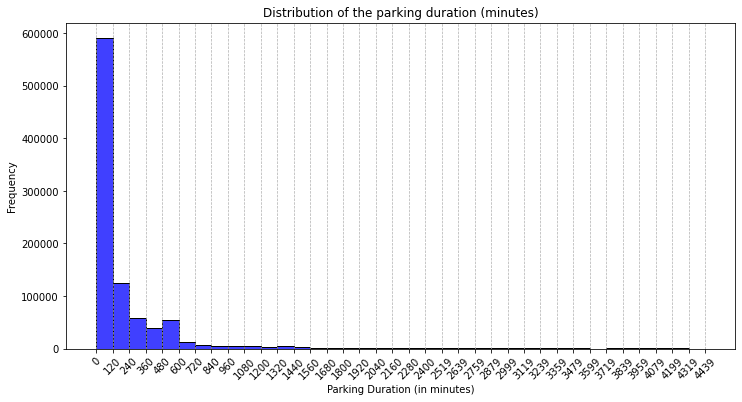

Statistical overview for the "ParkingDuration_mins" variable:


count    941083.000000
mean        225.862285
std         500.459418
min           0.000033
25%           1.860550
50%          48.123217
75%         227.494058
max        4439.084617
Name: ParkingDuration_mins, dtype: float64

In [43]:
# Visualize the distribution of duration of parking

plt.figure(figsize=(12, 6))

sns.histplot(parking_sessions_with_lots_df_adjusted_times['ParkingDuration_mins'], bins=37, color='blue')

# Ticks on x axis
bin_edges = np.histogram_bin_edges(parking_sessions_with_lots_df_adjusted_times['ParkingDuration_mins'], bins=37)
plt.xticks(bin_edges, rotation=45)

plt.title('Distribution of the parking duration (minutes)')
plt.xlabel('Parking Duration (in minutes)')
plt.ylabel('Frequency')
plt.grid(True, axis='x', linestyle='--', linewidth=0.7)
plt.show()

print('Statistical overview for the "ParkingDuration_mins" variable:')
display(parking_sessions_with_lots_df_adjusted_times['ParkingDuration_mins'].describe())

Discussing the conclusions and findings from the above chart and statistical overview in section "4. Understand parking personas" at the Question "What type of parking lot users can you differentiate based on the length of their parking?"


count                                   941096
unique                                     262
top       b6260b52-c371-4f07-a400-938553745c3f
freq                                     63937
Name: ParkingLotId, dtype: object

'ParkingLotId' variable count of values:


ParkingLotId
b6260b52-c371-4f07-a400-938553745c3f    63937
87a9e7a2-3f9b-405b-b73f-dbe535d93bee    33305
7aafdfad-d489-41f3-af86-cf98435fe1a2    23946
5d260039-d07d-449d-b4a2-c8fc95a647f4    21653
cc77e9bb-0e5c-4cd9-b901-8d00683d9771    20730
                                        ...  
e9e52848-3a68-48d6-8ee6-ea0ec297d8c5      124
8af3603b-5caa-4a51-b354-faebee9dfe11       78
8b37f44e-cd9f-449e-8206-3a40d6a5fca8       26
355bc629-25e4-4158-85a4-747f36b34a77        3
aa69ed6b-834b-42c1-ad0e-57f6d899b7da        1
Name: count, Length: 262, dtype: int64

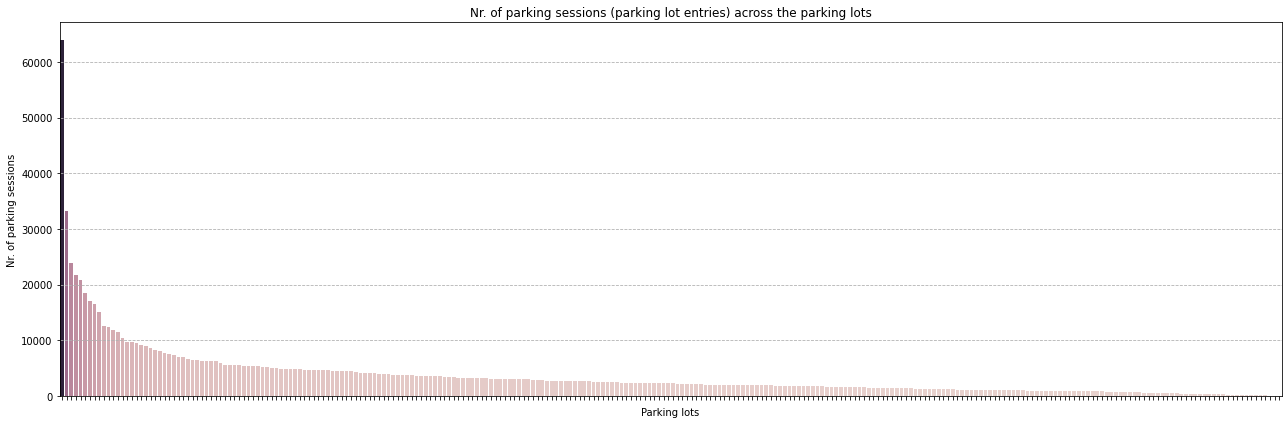

Chart (Nr. of parking lots distribution across the lots) statistics:


count      262.000000
mean      3591.969466
std       5498.682197
min          1.000000
25%       1082.000000
50%       2234.500000
75%       4160.750000
max      63937.000000
Name: count, dtype: float64

In [44]:
# "ParkingLotId" column

display(parking_sessions_df["ParkingLotId"].describe())

# value counts
ParkingLotID_value_counts = parking_sessions_df["ParkingLotId"].value_counts()
print("'ParkingLotId' variable count of values:")
display(ParkingLotID_value_counts)

# values distribution visualization 
plt.figure(figsize=(18, 6))
sns.barplot(x=ParkingLotID_value_counts.index, y=ParkingLotID_value_counts.values, hue=ParkingLotID_value_counts, legend=False)
plt.title('Nr. of parking sessions (parking lot entries) across the parking lots')
plt.xlabel('Parking lots')
plt.gca().set_xticklabels([])
plt.ylabel('Nr. of parking sessions')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# values distribution stats
print(f"Chart (Nr. of parking lots distribution across the lots) statistics:")
display(ParkingLotID_value_counts.describe())

- There are lots where 1 parking session occurred and others where hundreds to thousands of parking sessions took place

- The highest number of parking sessions at a single lot was 63 937, while in the "first" 50% of lots there were 2 234 or fewer parking sessions

- The relative standard deviation is very high (5498.68/3591.97), which again indicates that the 262 parking lots are very different from each other in terms of the parking sessions that occurred

'make' variable count of values:


Make
Ford          159519
JEEP          130663
Toyota        113040
TESLA         102563
KIA            95364
Mercedes       94836
Audi           75602
Honda          75430
Fiat           46501
Volkswagen     27495
Hummer          9704
BMW             9176
Lexus           1152
Suzuki            51
Name: count, dtype: int64

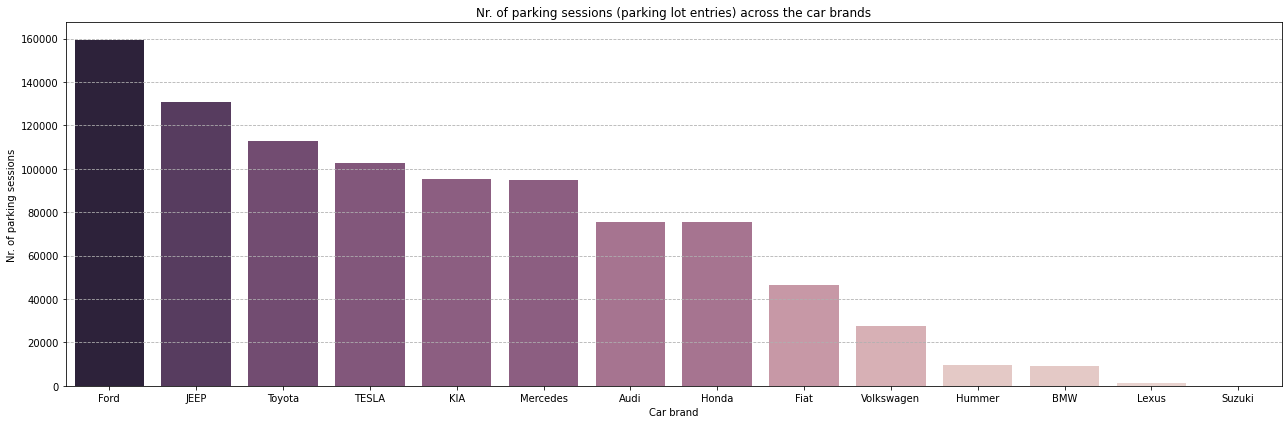

Chart (Nr. of parking lots distribution across the car brands) statistics:
Count - 14
Mean - 67221.1
Standard deviation - 50104.4
Min - 51
Max - 159519


In [45]:
# "Make" column

# value counts
print("'make' variable count of values:")
make_value_counts = parking_sessions_df["Make"].value_counts()
display(make_value_counts)

# values distribution visualization 
plt.figure(figsize=(18, 6))
sns.barplot(x=make_value_counts.index, y=make_value_counts.values, hue=make_value_counts, legend=False)
plt.title('Nr. of parking sessions (parking lot entries) across the car brands')
plt.xlabel('Car brand')
plt.ylabel('Nr. of parking sessions')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# values distribution stats
print(f"Chart (Nr. of parking lots distribution across the car brands) statistics:\n\
Count - {round(len(make_value_counts),1)}\n\
Mean - {round(np.mean(make_value_counts),1)}\n\
Standard deviation - {round(np.std(make_value_counts),1)}\n\
Min - {round(np.min(make_value_counts), 1)}\n\
Max - {round(np.max(make_value_counts), 1)}")

- The fewest parking sessions in the dataset were made by Suzuki cars: 51 sessions, while the most were made by Ford cars: 159 519 sessions.

- It is not surprising that the most parking sessions occurred with American car brands (Ford, JEEP, TESLA), as the dataset contains data simulated for parkings in the United States

- There  relative standard deviation is high here again (50104.4/67221.1), indicating that the 14 car brands are very different from each other in terms of the parking sessions with those car brands:
    
    - Some brands had very few (less than 1,000), while others had a very high number (over 100,000) of parking sessions

'Color' variable count of values:


Color
Black     187898
White     142109
Blue      140696
Grey       95680
Green      95411
Red        93803
Purple     93498
Yellow     46329
Orange     45672
Name: count, dtype: int64

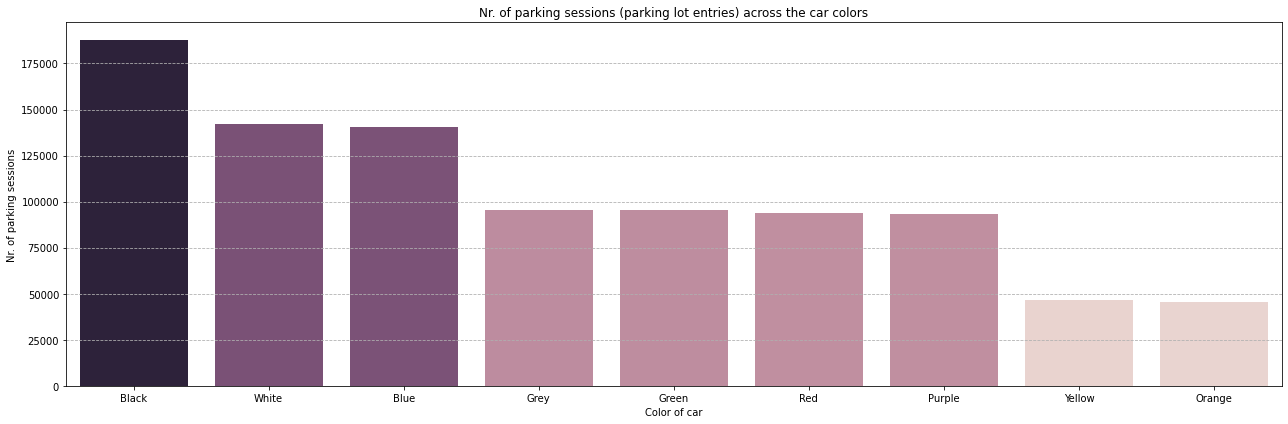

Chart (Nr. of parking lots distribution across the car colors) statistics:
Count - 9
Mean - 104566.2
Standard deviation - 43359.3
Min - 45672
Max - 187898


In [46]:
# "Color" column

# value counts
print("'Color' variable count of values:")
color_value_counts = parking_sessions_df["Color"].value_counts()
display(color_value_counts)

# values distribution visualization 
plt.figure(figsize=(18, 6))
sns.barplot(x=color_value_counts.index, y=color_value_counts.values, hue=color_value_counts, legend=False)
plt.title('Nr. of parking sessions (parking lot entries) across the car colors')
plt.xlabel('Color of car')
plt.ylabel('Nr. of parking sessions')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# values distribution stats
print(f"Chart (Nr. of parking lots distribution across the car colors) statistics:\n\
Count - {round(len(color_value_counts),1)}\n\
Mean - {round(np.mean(color_value_counts),1)}\n\
Standard deviation - {round(np.std(color_value_counts),1)}\n\
Min - {round(np.min(color_value_counts), 1)}\n\
Max - {round(np.max(color_value_counts), 1)}")

- The fewest parking sessions in the dataset were made by orange cars: 45,672 sessions, while the most were made by black cars: 187,898 sessions

- The relative standard deviation is smaller here (43359.3/67221.1), which suggests that the color of the car does not make as significant a difference in how often the cars are parked compared to factors like the car brand

### 2.3 'transactions' table

In [47]:
print("transactions_df")
display(transactions_df.head(3))

print("Shape:", transactions_df.shape)

transactions_df


,TransactionId,TransactionDate,TransactionType,ParkingSessionId,PlateNumber,Amount
0,8eb7b382-1317-4885-a184-b9c04fd1e602,2023-11-05 02:06:05.852000000,Post,0452fc17-8ac4-4384-a984-14482db7c7aa,FRC4646Z,57
1,002d8cca-c704-442a-a05d-02de98922734,2023-11-06 21:03:17.095000000,Card,90b68a61-4078-4b3f-83e3-d2219c95d2d5,AKE6695C,64
2,851590a4-7b18-4a4e-b0db-1c53951c8611,2023-10-24 21:31:35.742000000,Card,02d9fd03-ba36-4178-9136-9c98ab5ba84b,KRU739U,111


Shape: (661355, 6)


In [48]:
transactions_df.dtypes

TransactionId       object
TransactionDate     object
TransactionType     object
ParkingSessionId    object
PlateNumber         object
Amount               int64
dtype: object

In [49]:
# First statistical overview of the non-numerical columns
transactions_df.iloc[:, :-1].describe()

,TransactionId,TransactionDate,TransactionType,ParkingSessionId,PlateNumber
count,661355,661355,661355,536424,661355
unique,661355,659619,3,536424,593656
top,dfdeebf4-2426-494a-9c19-c6e83e6d0db6,2023-11-15 16:59:40.104000000,Post,07740418-9ea2-4ae9-8748-12ef124f796f,DCF075G
freq,1,3,221118,1,20


Missing values:
- seem to be present only for "ParkingSessionId",

- as the count for this variable is less than the nr. of transactions (length of dataframe)

- check:

In [50]:
print(transactions_df.isna().sum())

TransactionId            0
TransactionDate          0
TransactionType          0
ParkingSessionId    124931
PlateNumber              0
Amount                   0
dtype: int64


As "ParkingSessionId" is the only column containing missing values, discuss the interpretation of them (missing values) at the 'column "ParkingSessionId"' cell 

In [51]:
# column "TransactionId" 
transactions_df["TransactionId"].describe()


count                                   661355
unique                                  661355
top       dfdeebf4-2426-494a-9c19-c6e83e6d0db6
freq                                         1
Name: TransactionId, dtype: object

- count = nr. of unique values = 661 355
- nr. of the most frequent value's occurence = 1    
    - these points are proofs that TransactionId is a proper identifier column each record describing truly individual transactions

In [52]:
# Column "TransactionDate"
display(transactions_df["TransactionDate"].describe())

repeated_transactions = (transactions_df["TransactionDate"].count()-transactions_df["TransactionDate"].nunique())
print("(count - unique) =", repeated_transactions, repeated_transactions/len(transactions_df)*100)

transactiondate_value_counts = transactions_df["TransactionDate"].value_counts()
print(len(transactiondate_value_counts[transactiondate_value_counts>1]))
print()
print(transactiondate_value_counts.value_counts())
display(transactiondate_value_counts[transactiondate_value_counts>2]) 

count                            661355
unique                           659619
top       2023-11-15 16:59:40.104000000
freq                                  3
Name: TransactionDate, dtype: object

(count - unique) = 1736 0.2624914002313432
1734

count
1    657885
2      1732
3         2
Name: count, dtype: int64


TransactionDate
2023-11-15 16:59:40.104000000    3
2023-11-05 23:01:44.800000000    3
Name: count, dtype: int64

Count is not equal to nr. of unique values: 
- there are 1736 (count - unique) transactions (0,26% of all transactions) that share the same transaction time as another transaction (or as 2 other transactions)

 - there are 1734 transaction times that are linked to multiple transactions (to 2 or 3 transactions, based on for example the frequency of the most frequent TransactionDate)
 
    - out of them only 2 transaction times are linked to 3 different transactions, and the other 1732 times are linked to 2 different transactions   

,Count,Ratio (%)
TransactionType,,
Post,221118,33.43
Card,220333,33.32
Check,219904,33.25


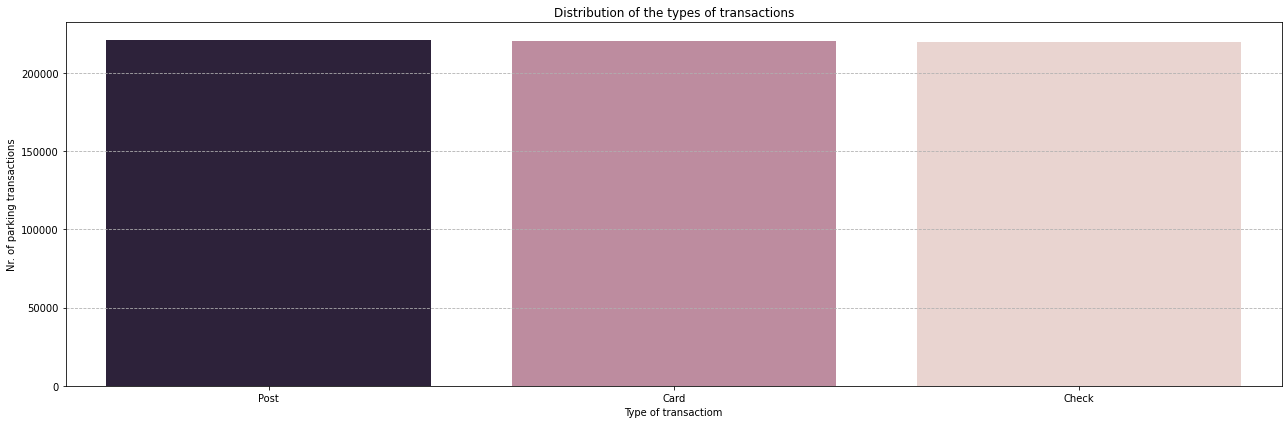

Chart (Distribution of the types of transactionss) statistics:
Count - 3
Mean - 220451.7
Standard deviation - 502.7
Min - 219904
Max - 221118


In [53]:
# Column "TransactionType"
# transactions_df["TransactionType"].describe()) -every information from here is included in the below analysis

# Value counts + percentages
transactiontype_value_counts = transactions_df["TransactionType"].value_counts()
transactiontype_value_percentages = (transactiontype_value_counts / transactiontype_value_counts.sum()) * 100

transactiontype_value_distribution_df = pd.DataFrame({
    'Count': transactiontype_value_counts,
    'Ratio (%)': transactiontype_value_percentages
})
display(transactiontype_value_distribution_df.round(2))

# values distribution visualization 
plt.figure(figsize=(18, 6))
sns.barplot(x=transactiontype_value_counts.index, y=transactiontype_value_counts.values, hue=transactiontype_value_counts, legend=False)
plt.title('Distribution of the types of transactions')
plt.xlabel('Type of transactiom')
plt.ylabel('Nr. of parking transactions')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# values distribution stats
print(f"Chart (Distribution of the types of transactionss) statistics:\n\
Count - {round(len(transactiontype_value_counts),1)}\n\
Mean - {round(np.mean(transactiontype_value_counts),1)}\n\
Standard deviation - {round(np.std(transactiontype_value_counts),1)}\n\
Min - {round(np.min(transactiontype_value_counts), 1)}\n\
Max - {round(np.max(transactiontype_value_counts), 1)}")

- There are 3 different types of transactions: Post, Card, Check

- The number of transactions don't differ too much (low relative standard deviation) in terms of type of transactions

- With each payment type (transaction type) around ~220 000 transactions were made

    - the most transactions were 'executed' by 'Post' type (221 118)

        -  which could refer to those transactions that have been recorded ("posted") to an account after processing (like bank transactions that appear after they were confirmed)

    - the least transactions were made using a check (paper or electronic) (219 904)
    
- But again, relatively there is a very small difference between the occurence of these types
    
    - it is almost equally frequent for different payment types (transaction types) to be used for transactions
   
        - this is shown by the ratio of types as well: 33.43%, 33.32%, 33.25%

In [54]:
# Column "ParkingSessionId"


print(transactions_df["ParkingSessionId"].isna().sum())

print(transactions_df["ParkingSessionId"].isna().sum()/len(transactions_df)*100)
print()


display(transactions_df["ParkingSessionId"].describe())


124931
18.890157328514942



count                                   536424
unique                                  536424
top       07740418-9ea2-4ae9-8748-12ef124f796f
freq                                         1
Name: ParkingSessionId, dtype: object

As it was identified earlier, in this column there are some missing values as the count for this variable (536 424) is less than the nr. of transactions (661 355)

- There are 124 931 transactions that are not linked to any parking session 

    - So they have been recorded without a corresponding parking session 

        - Which shows that these transactions were actually incorrect charges ("mimicking erroneous charges")

            - Among all the transactions close to 1/5 (18,9%) of them are such invalid charges (unlinked transactions)    <br><br><br>

- count = nr. of unique values = 536 424
- nr. of the most frequent value's occurence = 1  
<br>these points are proofs that ParkingSessionId is a proper identifier column, and it's appropriate to join the parking_sessions table on this column

count      661355
unique     593656
top       DCF075G
freq           20
Name: PlateNumber, dtype: object

PlateNumber
DCF075G     20
300304W     18
300304T     18
300539I     17
DCF075F     17
            ..
SBG6273N     1
CW25563G     1
1593A7X      1
ABNP19C      1
MBQ743L      1
Name: count, Length: 593656, dtype: int64

PlateNumber
DCF075G     20
300304W     18
300304T     18
300304H     17
300539I     17
            ..
BUQQ30F      2
SMR6054O     2
BHSO52W      2
GGZ2234F     2
GCO342D      2
Name: count, Length: 50049, dtype: int64

Average occurence among the above value counts (the above plate numbers): 2.3526543986892845

Nr. of plate numbers associated with more than one transaction (as the above value counts): 50049 8.430639966579973
Sum of the occurence of these plate numbers (that are associated with more than one transaction): 117748 17.80405379864067

Nr. of cars when the car made how many different transactions (indexes), so the summary of value counts:


count
1     543607
2      39241
3       7222
4       2127
5        738
6        317
7        156
8         91
9         63
10        32
11        25
12        14
13         6
14         5
16         5
17         3
18         2
20         1
15         1
Name: count, dtype: int64

Visualize the above summary:


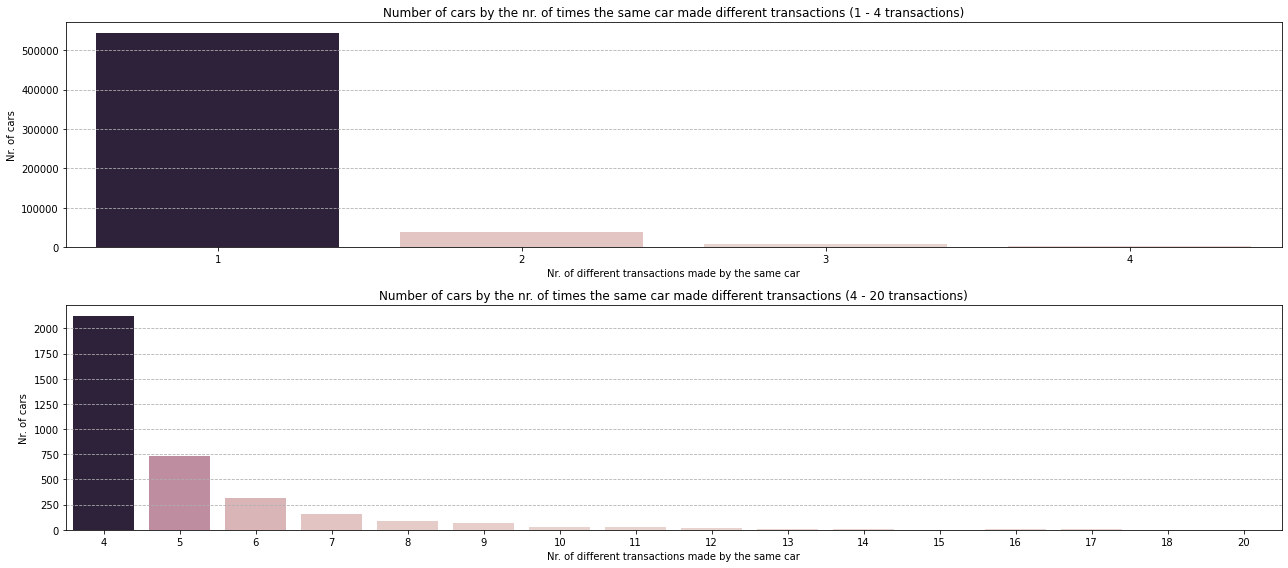

,Nr. of diff. transactions by the same car,Nr. of cars,Ratio (%),Cumulative (%)
0,1,543607,91.6,91.6
1,2,39241,6.6,98.2
2,3,7222,1.2,99.4
3,4,2127,0.4,99.8


Statistics of the distribution of of plate numbers (in terms of transactions):


count    593656.000000
mean          1.114037
std           0.458712
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          20.000000
Name: count, dtype: float64

91th percentile - 1.0
92th percentile - 2.0


In [55]:
# column "PlateNumber"

display(transactions_df["PlateNumber"].describe())

# value counts
platenumber_value_counts = transactions_df["PlateNumber"].value_counts()
display(platenumber_value_counts.sort_values(ascending=False))
display(platenumber_value_counts[platenumber_value_counts > 1])
print("Average occurence among the above value counts (the above plate numbers):", platenumber_value_counts[platenumber_value_counts > 1].mean())
print()

print("Nr. of plate numbers associated with more than one transaction (as the above value counts):",
      len(platenumber_value_counts[platenumber_value_counts > 1]),
      len(platenumber_value_counts[platenumber_value_counts > 1])/transactions_df["PlateNumber"].nunique()*100)

print("Sum of the occurence of these plate numbers (that are associated with more than one transaction):", 
      platenumber_value_counts[platenumber_value_counts > 1].sum(), 
      platenumber_value_counts[platenumber_value_counts > 1].sum()/transactions_df["PlateNumber"].count()*100)
print()

# summary of value counts
print("Nr. of cars when the car made how many different transactions (indexes), so the summary of value counts:")
platenumber_value_counts_summary = platenumber_value_counts.value_counts()
display(platenumber_value_counts_summary)


# visualize the above summary: 
print("Visualize the above summary:")
fig, ax = plt.subplots(2, 1, figsize=(18, 8))

# First chart: cars associated with 1, 2, 3, or 4 transactions
platenumber_1_4_times = platenumber_value_counts_summary.loc[[1, 2, 3, 4]]
sns.barplot(x=platenumber_1_4_times.index, 
            y=platenumber_1_4_times.values,
            hue=platenumber_1_4_times.values, ax=ax[0], legend=False)
ax[0].set_title('Number of cars by the nr. of times the same car made different transactions (1 - 4 transactions)')
ax[0].set_xlabel('Nr. of different transactions made by the same car')
ax[0].set_ylabel('Nr. of cars')
ax[0].grid(axis='y', linestyle='--')

# Second chart: all the other cars (cars associated with more than 4 transactions)
platenumber_more_more_than_3_times = platenumber_value_counts_summary[platenumber_value_counts_summary.index >= 4]
sns.barplot(x=platenumber_more_more_than_3_times.index, 
            y=platenumber_more_more_than_3_times.values,
            hue=platenumber_more_more_than_3_times.values, ax=ax[1], legend=False)
ax[1].set_title('Number of cars by the nr. of times the same car made different transactions (4 - 20 transactions)')
ax[1].set_xlabel('Nr. of different transactions made by the same car')
ax[1].set_ylabel('Nr. of cars')
ax[1].grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

# Distribution percentages
platenumber_value_percentages = (platenumber_value_counts_summary.values / platenumber_value_counts_summary.values.sum()) * 100

platenumber_value_distribution_df = pd.DataFrame({
    'Nr. of diff. transactions by the same car': platenumber_value_counts_summary.index,
    'Nr. of cars': platenumber_value_counts_summary.values,
    'Ratio (%)': platenumber_value_percentages
})
platenumber_value_distribution_df['Cumulative (%)'] = platenumber_value_distribution_df['Ratio (%)'].cumsum()
display(platenumber_value_distribution_df.head(4).round(1).reset_index(drop=True))

# statistics of the distribution of the column
print ("Statistics of the distribution of of plate numbers (in terms of transactions):")
display(platenumber_value_counts.describe())
print(f"91th percentile - {round(np.percentile(platenumber_value_counts, 91), 1)}")
print(f"92th percentile - {round(np.percentile(platenumber_value_counts, 92), 1)}")

Count is not equal to nr. of unique values: 

- There are 593 656 different cars making (associated with) 661 355 different transactions altogether

- 8.4% of the cars "made" (are associated with) multiple transactions (50 049 cars out of the 593 656 cars)

    - These cars "made" (are associated with) 17.8% of all transactions (117 748 transactions out of the 661 355 transactions)

        - As 17.8% > (8.4%*2), it suggests that cars that "made" multiple transactions tend to "make" more than two transactions on average (it's 2.35 after calculation)
<br><br>

~91.6% of the cars made only 1 transaction, while the most transactions made by one car was 20 (by the car "DCF075G")

- This results in a highly right-skewed distribution, where the average of transactions made by the same car is very close to 1 (it's 1.11)

    - 2-19 different transactions were also made by same cars:

        - among cars 6.6% made 2, ~1.2% made 3, and ~0.4% made 4 different transaction

            - 98.2% of cars made 2 or less, while 99.8% of cars made 4 or less different transactions

        - the relationship between the number of cars (y axis) and the number of different transactions made by the same car (x axis) is not completely linear:

            - for example just 15 different transactions were made by only 1 car, while 16 different transactions were made by 5 cars (each made 16 different transactions)

int64

Total Transactions: 661355
Transactions with Negative amount: 12000 (1.81%)
Transactions with Zero amount: 0 (0.00%)
Transactions with Positive amount: 649355 (98.19%)


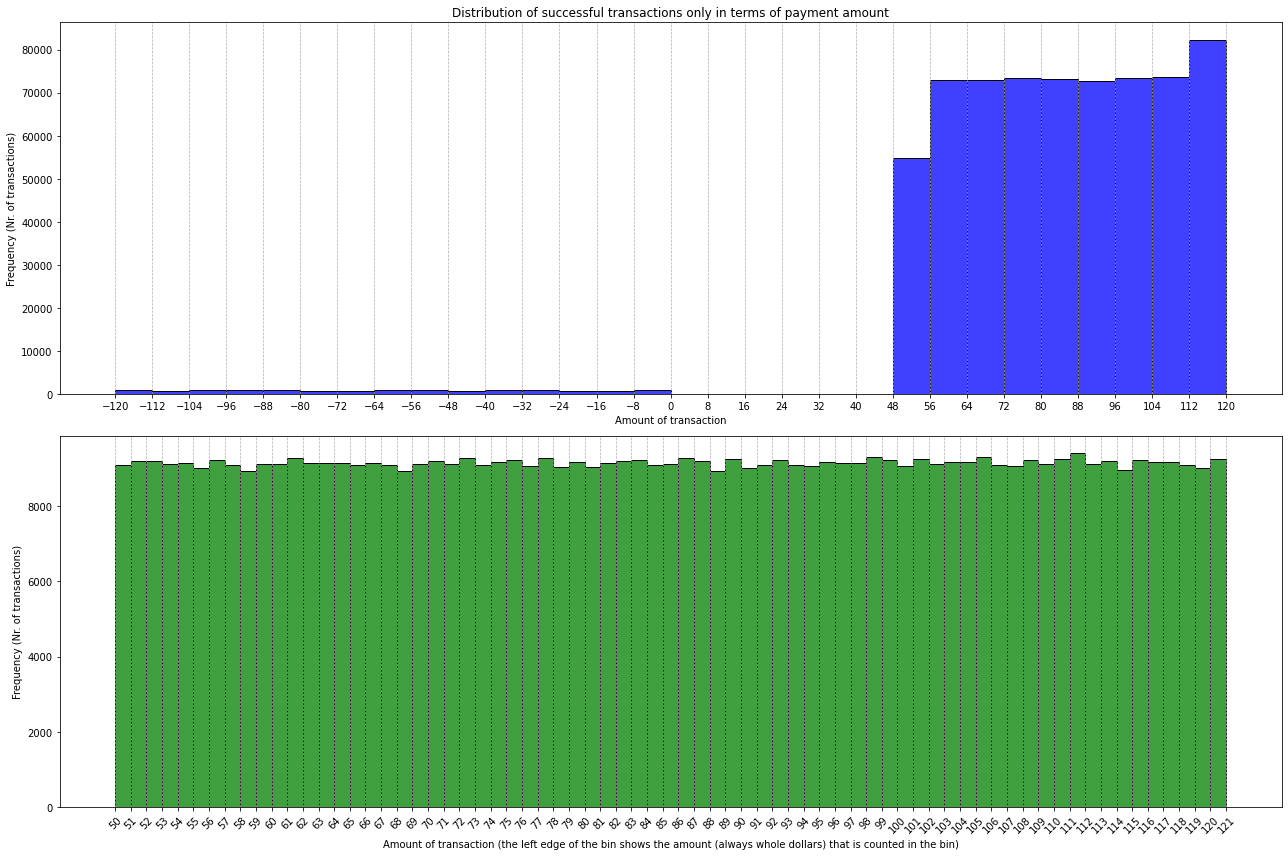

Amount
50     9082
51     9207
52     9209
53     9124
54     9147
       ... 
116    9178
117    9175
118    9091
119    9020
120    9264
Name: count, Length: 71, dtype: int64

Statistics of distribution of successful transactions


count    649355.000000
mean         85.032019
std          20.494376
min          50.000000
25%          67.000000
50%          85.000000
75%         103.000000
max         120.000000
Name: Amount, dtype: float64

Relative std: 24.10195129817609

Checking the new column: label if the transaction was successful
649355


,Amount,IsTransactionSuccessful
10,69,1
11,-120,0
12,94,1


In [56]:
# column "Amount"

# Summary statistics
print(transactions_df['Amount'].dtype)
print()

# Split transactions with negative, zero, and positive amounts
negative_amounts = transactions_df[transactions_df['Amount'] < 0]['Amount']
zero_amounts = transactions_df[transactions_df['Amount'] == 0]['Amount']
positive_amounts = transactions_df[transactions_df['Amount'] > 0]['Amount']

print(f"Total Transactions: {len(transactions_df)}")
print(f"Transactions with Negative amount: {len(negative_amounts)} ({len(negative_amounts)/len(transactions_df) * 100:.2f}%)")
print(f"Transactions with Zero amount: {len(zero_amounts)} ({len(zero_amounts)/len(transactions_df) * 100:.2f}%)")
print(f"Transactions with Positive amount: {len(positive_amounts)} ({len(positive_amounts)/len(transactions_df) * 100:.2f}%)")


# Visualize
fig, ax = plt.subplots(2, 1, figsize=(18, 12))

# First chart: Distribution of all transaction amounts
sns.histplot(transactions_df['Amount'], bins=30, color='blue', ax=ax[0])
bin_edges_all = np.histogram_bin_edges(transactions_df['Amount'], bins=30)
ax[0].set_xticks(bin_edges_all)
ax[0].set_title('Distribution of all transactions in terms of payment amount')
ax[0].set_xlabel('Amount of transaction')
ax[0].set_ylabel('Frequency (Nr. of transactions)')
ax[0].grid(True, axis='x', linestyle='--', linewidth=0.7)

# Second chart: Distribution of only successful transactions
bin_edges_positive = np.arange(50, 122, 1)  # Adjust as necessary for your data
sns.histplot(positive_amounts, bins=bin_edges_positive, color='green', ax=ax[1])
ax[1].set_xticks(bin_edges_positive)
ax[1].set_xticklabels(bin_edges_positive, rotation=45)  # Rotate x-ticks by 45 degrees
ax[0].set_title('Distribution of successful transactions only in terms of payment amount')
ax[1].set_xlabel('Amount of transaction (the left edge of the bin shows the amount (always whole dollars) that is counted in the bin)')
ax[1].set_ylabel('Frequency (Nr. of transactions)')
ax[1].grid(True, axis='x', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

display(positive_amounts.value_counts().sort_index())

print("Statistics of distribution of successful transactions")
display(positive_amounts.describe())
print("Relative std:", positive_amounts.std()/positive_amounts.mean() * 100)
print()

# Adding a column to indicate if the transaction was succesful or failed ("zero or negative amounts to represent failed transactions")
transactions_df['IsTransactionSuccessful'] = np.where(transactions_df['Amount'] < 0, 0, 1) # using < instead of <= as there are no zero amount transactions
# check:
print("Checking the new column: label if the transaction was successful")
print(transactions_df['IsTransactionSuccessful'].sum())
display(transactions_df.loc[10:12][["Amount", 'IsTransactionSuccessful']])

As all values in the column are integers, seems like transactions were charged only in whole dollars

 - This could be due to mainly 2 things:

    - the system that records the transactions is rounding charged amounts to the nearest whole number

        - in this case this is a limitation of the system in how it can capture the data

    - the transactions are truly charged only in whole dollars 

        - in this case business logic might be behind this decision, or it is an intentional simplification in transaction handling
<br>
- ~98,2% of transactions have positive amount meaning that almost all the transactions were successful

- ~1,8% of were failed transactions as they have negative amounts 

- There are no transactions with zero amount

<br>
The low number/ratio of failed transactions can be observed visually in first (upper) the chart as well<br>


The second (lower) chart (successful transactions only) indicates that different amounts (50-120) were charged with nearly equal frequencies (distribution of amounts is uniform)

- Each amount was charged ~9 000 times

    - The average amount of transactions is ~85 dollars with a ~24,1% relative standard deviation

        - on average the transaction amounts vary by plus/minus 24,1% (by 20,5 dollars) from the mean ~85 dollars (min: 50, max:120)

    - Half of the transactions were charged with 85 dollars or less

        - The median is very close to the mean, which is another sign of a uniform distribution

Seems like the base fee for entering a lot is 50$ as there are no amounts below that, so at least 50$ is always charged when entering a lot

### 2.4 Peak parking time analysis

- This analysis could have been conducted for ExitDate-s as well, taking EntryDate here as it should be more insightful

I have a prior assumption that peak parking times will differ based on the type of the day: it might matter if the day is a weekday or weekend day

In [57]:
# Extract hour and days from datetimes
parking_sessions_with_lots_df_adjusted_times['EntryDate_adjusted_Hour'] = parking_sessions_with_lots_df_adjusted_times['EntryDate_adjusted'].dt.hour
parking_sessions_with_lots_df_adjusted_times['EntryDate_adjusted_Day'] = parking_sessions_with_lots_df_adjusted_times['EntryDate_adjusted'].dt.day_name()

,ParkingSessionId,PlateNumber,Timezone,EntryDate_adjusted,ExitDate_adjusted,EntryDate_adjusted_Hour,EntryDate_adjusted_Day,EntryDate_adjusted_DayType
0,95f18106-b717-43dd-81b6-b6fbaec23e54,HJ08CW,GMT-5,2023-11-04 21:44:24.474000+00:00,2023-11-04 23:52:47.899000+00:00,21,Saturday,Weekend
1,d59c0519-3116-4530-892a-ec896744d0e5,0YEX66Q,GMT-7,2023-10-28 17:50:02.208000+00:00,2023-10-28 18:24:00.896000+00:00,17,Saturday,Weekend
2,3e25744e-6bd2-4c3b-b252-9fcd715fe99b,AFB580I,GMT-5,2023-10-21 18:38:49.466000+00:00,2023-10-21 21:10:59.252000+00:00,18,Saturday,Weekend
3,41e21d0a-5d82-4062-a17b-c767cf5cd08b,BSC708T,GMT-5,2023-10-23 00:11:41.597000+00:00,2023-10-23 01:17:47.127000+00:00,0,Monday,Weekday
4,9d390550-36e9-4ab7-aacc-865c62228a49,GXA056M,GMT-5,2023-10-24 22:12:06.023000+00:00,2023-10-24 22:35:30.628000+00:00,22,Tuesday,Weekday


,EntryDate_adjusted_Day,EntryCount,Ratio (%),Ratio change (% point)
0,Monday,110710,11.8,0.0
1,Tuesday,119224,12.7,0.9
2,Wednesday,125512,13.3,0.7
3,Thursday,128882,13.7,0.4
4,Friday,151337,16.1,2.4
5,Saturday,171074,18.2,2.1
6,Sunday,134344,14.3,-3.9


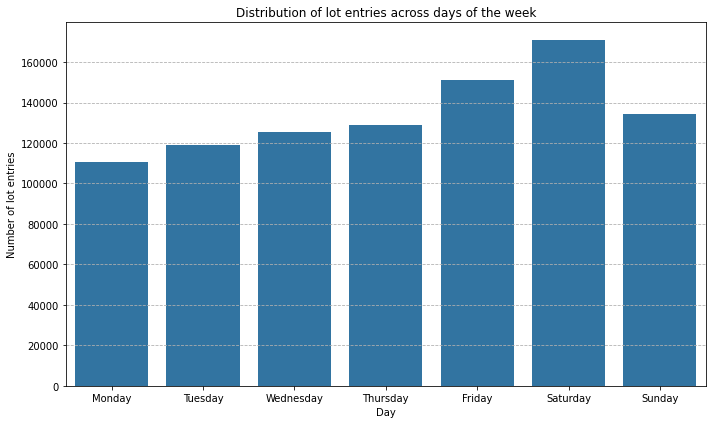

In [58]:
# Group entries by days, calculate ratio to the other days 
entry_summary = parking_sessions_with_lots_df_adjusted_times.groupby('EntryDate_adjusted_Day').size().reset_index(name='EntryCount')
entry_summary['Ratio (%)'] = entry_summary['EntryCount'] / entry_summary['EntryCount'].sum() * 100

# Display summary in days order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
entry_summary['EntryDate_adjusted_Day'] = pd.Categorical(entry_summary['EntryDate_adjusted_Day'], categories=day_order, ordered=True)
entry_summary = entry_summary.sort_values(by='EntryDate_adjusted_Day')

# Calculate ratio differences
ratios = entry_summary['Ratio (%)'].values
percentage_diff = np.zeros_like(ratios)
percentage_diff[1:] = (ratios[1:] - ratios[:-1])
entry_summary['Ratio change (% point)'] = percentage_diff
display(entry_summary.sort_values(by='EntryDate_adjusted_Day').round(1).reset_index(drop=True))

# Visualize the summary
# put days in order on the x axis
plt.figure(figsize=(10, 6))
sns.barplot(data=entry_summary, x='EntryDate_adjusted_Day', y='EntryCount')
plt.title('Distribution of lot entries across days of the week')
plt.xlabel('Day')
plt.ylabel('Number of lot entries')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()   

- On Monday lot entries are the lowest: 11,8% of all entries <br>

- From Monday to Thursday the number of lot entries increases 

    - but the increase in ratios is slower and slower (0.9, 0.7, 0.4 percentage points)

        - this means there is less and less difference between days Monday to Friday in terms of number of lot entries  <br>

- From Thursday to Friday the trend of slower and slower increase breaks as there is a much greater increase in the number of lot entries than before

    - the increase is ~2.5x greater from Thursday to Friday than from Monday to Thursday <br>

- From Friday to Saturday the increase in ratio (2.1%point) is almost as large as from Thursday to Friday (2.4%point)

    - it can be said that as the weekend starts, the number of lot entries significantly increases (if we consider Friday or part of Friday as 'weekend' too) <br>

- On Sunday the "weekend trend" breaks

    - the ratio of lot entries significantly drops compared to Saturday: by 3.9%point

        - this decrease was almost twice as large as the increase from Friday to Saturday

        - the ratio of Sunday lot entries dropped back to almost the ratio of Thursday entries, but still a bit higher (14.3% vs. 13.7%) 

        - intuition and interpretation aligns with this, as on Sunday people usually tend to travel and drive to parking lots less and rest for example at home more (in the US and in my intuition)   <br><br>

Summary: least lot entries happen on Monday (11.8%), while the most lot entries on Friday and Saturday (16.1% and 18.2%)<br><br>

(This analysis could have been conducted by calculating the count change from day to day (in percentages) instaed of the ratio change (in percentage points),
- and in this case count changes in percentages could be better interpreted than percentage point changes

- but this way anyways the direction and 'magnitude' of changes are analysed)

Based on the findings above the former assumption that it does makes a difference if it's a weekday or a weekend day seems true

- But at the same time it seems like more granularity is needed as the days Friday, Saturday, Sunday and the other four weekdays differ greatly

- Monday - Thursday correspond to the same 'slower and slower increases' trend and seem to be 'more similar to each other than the other 3 days' in terms of nr. of lot entries, or in other words  

    - Monday to Thursday days appear to form a cluster of similar activity levels, while Friday to Sunday show more variation.

    - This suggests that it would be insightful (could uncover distinct patterns) to classify the daily distribution of entries into the 4 categories 

    - Create a function to label the result of this classification:


In [59]:
def classify_day(day):
    if day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday']:
        return 'Mon-Thu'
    elif day == 'Friday':
        return 'Friday'
    elif day == 'Saturday':
        return 'Saturday'
    else:
        return 'Sunday'

# Apply func
parking_sessions_with_lots_df_adjusted_times['EntryDate_adjusted_DayType_4cat'] = parking_sessions_with_lots_df_adjusted_times['EntryDate_adjusted_Day'].apply(classify_day)

# FIltering where all 4 categories appear:
parking_sessions_with_lots_df_adjusted_times[["ParkingSessionId", "Timezone", "EntryDate_adjusted", "ExitDate_adjusted", "EntryDate_adjusted_Day", "EntryDate_adjusted_DayType", "EntryDate_adjusted_DayType_4cat"]].loc[14:19]

,ParkingSessionId,Timezone,EntryDate_adjusted,ExitDate_adjusted,EntryDate_adjusted_Day,EntryDate_adjusted_DayType,EntryDate_adjusted_DayType_4cat
14,4dbb502c-dcf1-47c8-b2d9-d96df089b8da,GMT-5,2023-11-02 23:29:24.566000+00:00,2023-11-02 23:57:15.718000+00:00,Thursday,Weekday,Mon-Thu
15,a8be5b4e-01a1-402c-9cf2-702550aca017,GMT-5,2023-10-20 19:20:55.856000+00:00,2023-10-20 20:00:24.251000+00:00,Friday,Weekday,Friday
16,0c222bee-4adc-4fc6-b5db-0dcbece82b26,GMT-5,2023-10-20 19:37:54.456000+00:00,2023-10-20 20:42:13.063000+00:00,Friday,Weekday,Friday
17,734a1958-7830-4f17-bded-72b56f58d4c8,GMT-5,2023-10-21 20:19:43.994000+00:00,2023-10-21 20:53:45.591000+00:00,Saturday,Weekend,Saturday
18,c5c1cd7a-188d-4727-a861-c06abf683918,GMT-5,2023-10-22 22:09:42.308000+00:00,2023-10-22 22:43:56.778000+00:00,Sunday,Weekend,Sunday
19,ac1b935b-4479-42d9-8a7a-0a6e28b48d5b,GMT-5,2023-10-23 17:15:54.140000+00:00,2023-10-23 18:30:49.451000+00:00,Monday,Weekday,Mon-Thu


In [60]:
# Count lot entries by hour and the type of day
hourly_counts = parking_sessions_with_lots_df_adjusted_times.groupby(['EntryDate_adjusted_Hour', 'EntryDate_adjusted_DayType_4cat']).size().unstack()

# Displaying the first 5 hours only: 
hourly_counts.head(5)

EntryDate_adjusted_DayType_4cat,Friday,Mon-Thu,Saturday,Sunday
EntryDate_adjusted_Hour,,,,
0,7868,20805,11820,12406
1,5961,16495,10989,11450
2,4203,13567,8374,8484
3,2701,7996,6314,6719
4,1843,4913,4779,5829


**Distribution of hours by 4 day types/categories (horizontal)**

- Visualize the distribution of lot entries by hours of the day for all 4 different day types 

- On Monday-Thursday the nr. of lot entries are 4 times more than on Friday or Saturday or Sunday (to the count of Monday the counts of +3 days are added)

    - To show the distribution of lot entries for all 4 categories in a standardized way (relative nr. of lot entries) for the analysis, the y axis labels are removed
    
    - In the created visualization the first distribution (Monday-Thursday days) is interpreted as the distribution of 1 day well representing the distribution of the days Monday, Tueesday. Wedmesday and Thursday 
        - The rationale behind this is the conclusion of the previous analysis (lot entries distribution by days), which is that these weekdays appear to cluster in terms of lot entry activity levels
        
        - It is also confirmed later with visualization

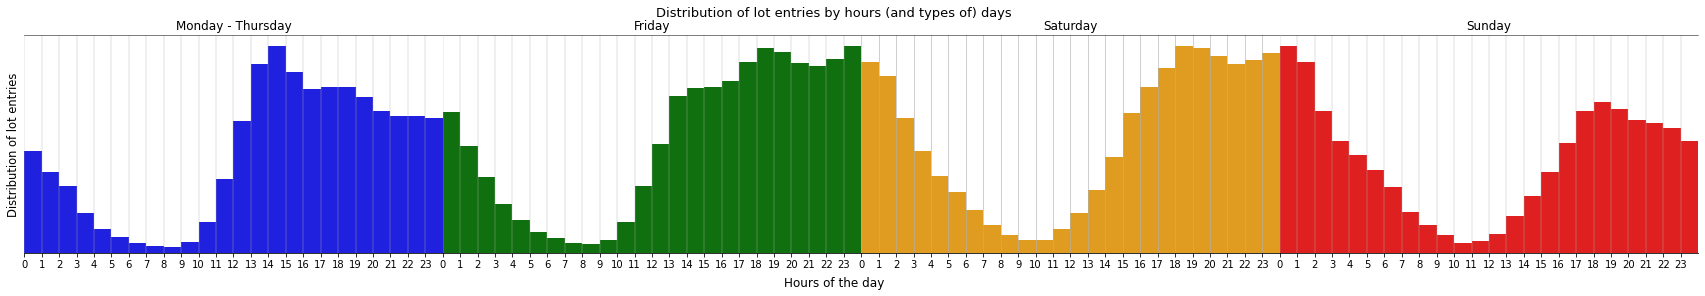

In [61]:
fig, ax = plt.subplots(1, 4, figsize=(30, 4))

fig.suptitle('Distribution of lot entries by hours (and types of) days', fontsize=13)

# Monday-Thursday
sns.barplot(x=hourly_counts.index, y=hourly_counts['Mon-Thu'], color='blue', ax=ax[0], width=1)
ax[0].set_title('Monday - Thursday')
ax[0].set_xlabel('')
ax[0].set_ylabel('Distribution of lot entries', fontsize = 11.5)
ax[0].set_yticks([])
ax[0].set_xticks(np.arange(-0.5, len(hourly_counts.index)-1, 1))
ax[0].set_xticklabels(hourly_counts.index)
ax[0].grid(axis='x', linewidth = 0.4)

# Friday
sns.barplot(x=hourly_counts.index, y=hourly_counts['Friday'], color='green', ax=ax[1], width=1)
ax[1].set_title('Friday')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_yticks([])
ax[1].set_xticks(np.arange(-0.5, len(hourly_counts.index)-1, 1))
ax[1].set_xticklabels(hourly_counts.index)
ax[1].grid(axis='x', linewidth=0.4)

# Saturday
sns.barplot(x=hourly_counts.index, y=hourly_counts['Saturday'], color='orange', ax=ax[2], width=1)
ax[2].set_title('Saturday')
ax[2].set_xlabel('')
ax[2].set_ylabel('')
ax[2].set_yticks([])
ax[2].set_xticks(np.arange(-0.5, len(hourly_counts.index)-1, 1))
ax[2].set_xticklabels(hourly_counts.index)
ax[2].grid(axis='x', linewidth=0.6)

# Sunday
sns.barplot(x=hourly_counts.index, y=hourly_counts['Sunday'], color='red', ax=ax[3], width=1)
ax[3].set_title('Sunday')
ax[3].set_xlabel('')
ax[3].set_ylabel('')
ax[3].set_yticks([])
ax[3].set_xticks(np.arange(-0.5, len(hourly_counts.index)-1, 1))
ax[3].set_xticklabels(hourly_counts.index)
ax[3].grid(axis='x', linewidth=0.4)

# Set a single x-axis label for all subplots
fig.text(0.5, 0.01, 'Hours of the day', ha='center', fontsize=12)

for axes in ax:
    axes.spines['left'].set_visible(False)  # Turn off the left spine
    axes.spines['right'].set_visible(False)  # Turn off the right spine
    axes.spines['top'].set_linewidth(0.5)  # Set bottom spine width

# Adjust subplots: remove space between plots
plt.subplots_adjust(wspace=-0)

# Display the plot
plt.show()

The advantage of the above horizontal layout (charts next to each other) is that we can see how the distribution of lot entries is changing by hours as we 'move forward in time' through the days of the week
- This can be observed in an exact way from Friday 00:00 to Sunday 23:59 (while the first chart is an approximation for the days Mon-Thu in terms of lot entry activity distribution) <br> <br>


**Results, findings and conclusions based on the above horizontal visual analysis**

- Before the morning hours, starting from 1-2 AM (on weekend days more from 2 AM) there is a gradual decline through the overnight hours (from midnight until morning) from high levels of entry activity to the lowest levels occurring in the morning hours

- The lowest levels period of ~2 hours is shifts to a later and later time window on Saturday and Sunday: 9-11 AM and 10-12 AM compared to 7-9 AM on weekdays (this can be better observed by a vertical analysis of distributions - next cell) 

- After the lowest level hours in the morning, lot entry activity start to increase more sharply, and around ~18:00-19:00 the peak is reached on Friday and Saturday

    - On Friday and Saturday after the peak is reached, activity levels remain very high in the afternoon, evenining and nighttime until around 2 AM (next day)

        - This reflects well the usual routine of people on these "weekend periods": the can do more outside activites and stay out later (because of work schedules) leading to significantly more parking lot entries 

    - On the contrast, on Monday-Thursday weekdays the peak is reached earlier at around 14:00-15:00, and from there the lot entry activity level is slowly decreases on each day until Friday ~10 AM 

        - The early decline compared to Friday and Sunday afternoons-evenings reflect a return to a quieter routine of peopel before the the next work day starts  
    
    - On Sunday the peak levels are reached also at around ~18:00-19:00 (as on Friday and Saturday), but only to 60-70% of the activity levels on Friday and Saturday  
    
        - Contrary to Friday and Saturday and similarly to Monday-Thursday, after the peak ~2 hours, activity starts to decrease gradually
            
        - Even though this decline is similar to the Monday-Thursday decline, activity levels on Sunday afternoon are overall even lower than Monday-Thursday afternoon levels 
        
            - This reflects that Sundays are treated the most as rest days (especially in the US) and people have even quieter routines (in terms of parking lot entries) than on weekdays

            - This could be due to the fact that shopping malls and other facilities are many times closed on Sunday (thus driving and parking activities also decline) and due to having more rest at home before the start of the next workweek  


**Proposal**

- Based on the visual analysis and the conclusion above, I have the idea of organizing the findings in a table structure for a more 'numerical-like' potential further analysis:

    - Columns: Monday-Thursday, Friday, Saturday, Sunday
    
    - Rows: hours of lowest level activity (~2 hour period), start of afternoon increase (~10/11/12 AM), hours of peak levels (around the hours 14-15/18-19 ),
            hours of high activity levels (for Friday and Sunday several hours), start of high activity decline (e.g. 2 AM), and also some relative measures of how high or low the activity level of a period is 


**Analyse peak parking times: distribution of hours by the 4 day types/categories (vertical)**

- To be able to see how the distributions compare from another perspective as well, organizing these charts in a vertical way (below each other) for an even deeper visual insight


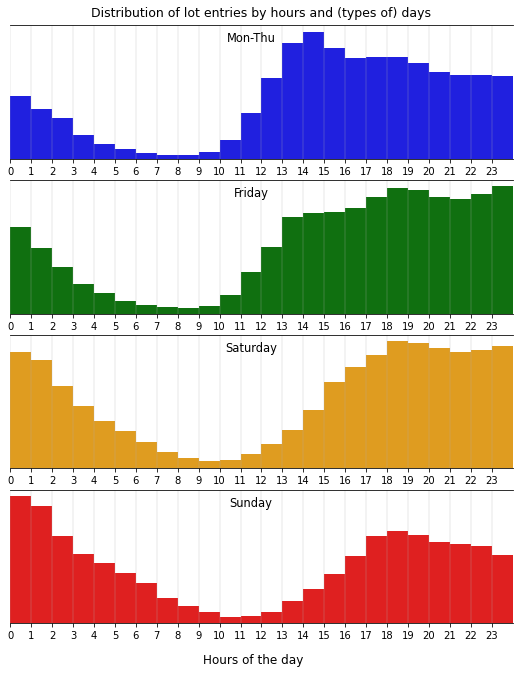

In [98]:
fig, ax = plt.subplots(4, 1, figsize=(9, 11))

# Monday-Thursday
sns.barplot(x=hourly_counts.index, y=hourly_counts['Mon-Thu'], color='blue', ax=ax[0], width=1)
ax[0].set_title('Distribution of lot entries by hours and (types of) days', fontsize=12.5, va='bottom')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_yticks([])
ax[0].set_xticks(np.arange(-0.5, len(hourly_counts.index)-1, 1))
ax[0].set_xticklabels(hourly_counts.index)
ax[0].text(11, hourly_counts['Mon-Thu'].max()*0.95, 'Mon-Thu', ha='center', va='center', fontsize=11.5)
ax[0].grid(axis='x', linewidth = 0.3)

# Friday
sns.barplot(x=hourly_counts.index, y=hourly_counts['Friday'], color='green', ax=ax[1], width=1)
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_yticks([])
ax[1].set_xticks(np.arange(-0.5, len(hourly_counts.index)-1, 1))
ax[1].set_xticklabels(hourly_counts.index)
ax[1].text(11, hourly_counts['Friday'].max()*0.95, 'Friday', ha='center', va='center', fontsize=11.5)
ax[1].grid(axis='x', linewidth = 0.3)

# Saturday
sns.barplot(x=hourly_counts.index, y=hourly_counts['Saturday'], color='orange', ax=ax[2], width=1)
ax[2].set_xlabel('')
ax[2].set_ylabel('')
ax[2].set_yticks([])
ax[2].set_xticks(np.arange(-0.5, len(hourly_counts.index)-1, 1))
ax[2].set_xticklabels(hourly_counts.index)
ax[2].text(11, hourly_counts['Saturday'].max()*0.95, 'Saturday', ha='center', va='center', fontsize=11.5)
ax[2].grid(axis='x', linewidth = 0.3)

# Sunday
sns.barplot(x=hourly_counts.index, y=hourly_counts['Sunday'], color='red', ax=ax[3], width=1)
ax[3].set_xlabel('', fontsize = 12)
ax[3].set_ylabel('')
ax[3].set_yticks([])
ax[3].set_xticks(np.arange(-0.5, len(hourly_counts.index)-1, 1))
ax[3].set_xticklabels(hourly_counts.index)
ax[3].text(11, hourly_counts['Sunday'].max()*0.95, 'Sunday', ha='center', va='center', fontsize=11.5)
ax[3].grid(axis='x', linewidth = 0.3)

for axes in ax:
    axes.spines['left'].set_visible(False)  # Turn off the left spine
    axes.spines['right'].set_visible(False)  # Turn off the right spine
    axes.spines['top'].set_linewidth(0.8)  # Set bottom spine width

# Set a single x-axis label for all subplots
fig.text(0.5, 0.075, 'Hours of the day', ha='center', fontsize=12)

# Adjust subplots: remove space between plots
plt.subplots_adjust(hspace=0.16)  # Adjust for vertical layout

# Display the plot
plt.show()

The advantage of the above vertical layout (charts below each other) is that we can see how the distribution of lot entries compare for the same periods (same hours) <br><br>

**Results, findings and conclusions based on the above horizontal visual analysis**

- The pattern that can be seen much clearer this way is the period of lowest lot entry activity levels for each day,
    - It is typically a time window of ~2 hours

    - This time window is around 7-9 AM for Monday-Thursday days, but it can be observed how it shifts a few hours for Saturday (9-11 AM) and again later for Sunday (10-11 AM) (weekends "start later") <br><br>

The results and findings of the horizontal analysis can be observed here as well, and some patterns are particularly visible here, such as: 

- Weekdays have a higher level of parking lot entry activity in the morning (from 10 AM) and early afternoon hours, after which activity level slowly declines on Monday-Thursday

- Weekends (+Friday night), by contrast, show lower activity in the morning hours (before noon) and delayed afternoon peaks, after which activity levels remain very high until around 2 AM
    
- It is visible on the vertical layout that in the decreasing overnight period (until the morning) the largest drop is from 1-2 AM to 2-3 AM on Saturday and Sunday
        
    - On Fridays the largest drop is also from 0-1 AM to 1-2 AM, which reflects that people cannot stay out (make lot entries) as long as on Friday and Saturday nights (overnights), as Friday is a workday       
   
-  Friday serves as a kind of 'transitional day' between the more structured weekdays (after increase and peak hours there is a slow decrease back) and the hight activity Friday and Saturday nights

- Sunday morning, afternoon, evening and night has the lowest overall activity (low activity levels even in the peak hours), reflecting a return to a quieter routine before the start of the workweek <br><br>


More vertical comparisons:

 - For the overnight hours (from midnight until morning) it is visible how Saturday and Sunday have higher levels of activity compared to Mon-Thu and Friday overnight hours, which is due to the weekend (end of work week)

- It is also apparent how the lot entry activity 'cools down' slower by a later time on Saturday and Sunday, and how the day 'starts later' (activity start to increase later) on these days

- For the afternoon and evening hours it can be observed how the peak levels of activity are reached later for Friday, Saturday, and Sunday

    - It can be seen how Sunday peak activity levels are much lower than on the other days (especially than on Friday and Saturday)    

- For the nighttime hours it is visible how lot entry activity level remains very high for Friday and Saturday nights while these hours are a gradual 'cooling off' period for days Mon-Thu and Sunday to rest and prepare for the next workday

Compare how much similar the distributions for Monday, Tuesday, Wednesday and Thursday are

- This serves as a double-check for the Mon-Thu cluster (created based on the daily split of lot entries) that it represents well these days
        
- This comparison is conducted now after seeing the distribution for the other 3 days, so that it can be assessed visually how much these days (do not) differ 

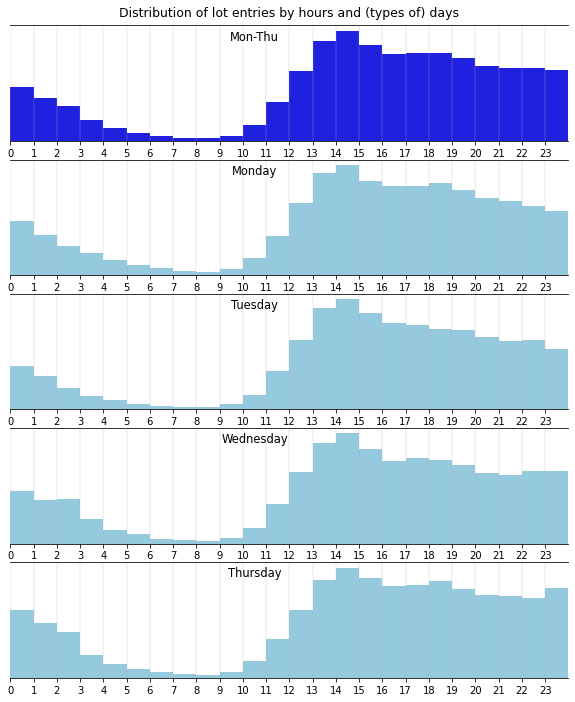

In [63]:
# Analyse peak parking times: compare how much similar the distributions are for Monday, Tuesday, Wednesday and Thursday, and also compare to the grouped Mon-Thu distribution

hourly_counts2 = parking_sessions_with_lots_df_adjusted_times.groupby(['EntryDate_adjusted_Hour', 'EntryDate_adjusted_Day']).size().unstack()

fig, ax = plt.subplots(5, 1, figsize=(10, 12))

# Monday-Thursday
sns.barplot(x=hourly_counts.index, y=hourly_counts['Mon-Thu'], color='blue', ax=ax[0], width=1)
ax[0].set_title('Distribution of lot entries by hours and (types of) days', fontsize=12.5, va='bottom')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_yticks([])
ax[0].set_xticks(np.arange(-0.5, len(hourly_counts.index)-1, 1))
ax[0].set_xticklabels(hourly_counts.index)
ax[0].text(10, hourly_counts['Mon-Thu'].max()*0.95, 'Mon-Thu', ha='center', va='center', fontsize=11.5)
ax[0].grid(axis='x', linewidth = 0.3)

# Monday
sns.barplot(x=hourly_counts2.index, y=hourly_counts2['Monday'], color="#87CEEB", ax=ax[1], width=1)
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_yticks([])
ax[1].set_xticks(np.arange(-0.5, len(hourly_counts2.index)-1, 1))
ax[1].set_xticklabels(hourly_counts2.index)
ax[1].text(10, hourly_counts2['Monday'].max()*0.95, 'Monday', ha='center', va='center', fontsize=11.5)
ax[1].grid(axis='x', linewidth = 0.3)

# Tuesday
sns.barplot(x=hourly_counts2.index, y=hourly_counts2['Tuesday'], color='#87CEEB', ax=ax[2], width=1)
ax[2].set_xlabel('')
ax[2].set_ylabel('')
ax[2].set_yticks([])
ax[2].set_xticks(np.arange(-0.5, len(hourly_counts2.index)-1, 1))
ax[2].set_xticklabels(hourly_counts2.index)
ax[2].text(10, hourly_counts2['Tuesday'].max()*0.95, 'Tuesday', ha='center', va='center', fontsize=11.5)
ax[2].grid(axis='x', linewidth = 0.3)

# Wednesday
sns.barplot(x=hourly_counts2.index, y=hourly_counts2['Wednesday'], color='#87CEEB', ax=ax[3], width=1)
ax[3].set_xlabel('')
ax[3].set_ylabel('')
ax[3].set_yticks([])
ax[3].set_xticks(np.arange(-0.5, len(hourly_counts2.index)-1, 1))
ax[3].set_xticklabels(hourly_counts2.index)
ax[3].text(10, hourly_counts2['Wednesday'].max()*0.95, 'Wednesday', ha='center', va='center', fontsize=11.5)
ax[3].grid(axis='x', linewidth = 0.3)

# Thursday
sns.barplot(x=hourly_counts2.index, y=hourly_counts2['Thursday'], color='#87CEEB', ax=ax[4], width=1)
ax[4].set_xlabel('', fontsize = 12)
ax[4].set_ylabel('')
ax[4].set_yticks([])
ax[4].set_xticks(np.arange(-0.5, len(hourly_counts2.index)-1, 1))
ax[4].set_xticklabels(hourly_counts2.index)
ax[4].text(10, hourly_counts2['Thursday'].max()*0.95, 'Thursday', ha='center', va='center', fontsize=11.5)
ax[4].grid(axis='x', linewidth = 0.3)

for axes in ax:
    axes.spines['left'].set_visible(False)  # Turn off the left spine
    axes.spines['right'].set_visible(False)  # Turn off the right spine
    axes.spines['top'].set_linewidth(0.8)  # Set bottom spine width

# Set a single x-axis label for all subplots
# fig.text(0.5, 0.075, 'Hours of the day', ha='center', fontsize=12)

# Adjust subplots: remove space between plots
plt.subplots_adjust(hspace=0.16)  # Adjust for vertical layout

# Display the plot
plt.show()

 It can be obseved that the hourly distribution of lot entries for these days are generally very similar, thus the 'Mon-Thu' grouping represents well these 4 workdays 
 
There are 2 subtle patterns making just a mild difference between these days, noting for the aim of completeness:

- The overnight 'cooling off' period for Monday is more gradual and just a bit longer (lowest by 8-9 AM instead of 7-8 AM) compared to the other 3 weekdays

    - This may be well due to the fact that this day is the first day of the workweek

- For Wednesday the nighttime hours (from ~22:00 to midnight) show a bit higher levels of activity than Monday and Tuesday, and for Thursday it's a bit higher than Wednesday

     - As we saw, this trend continous as we go 'further in the week' since it is due to the fact that as it is closer to the weekend people tend to stay out later (thus making more lot entries)

- Besides these subtle patterns it can be confirmed that the 'Mon-Thu' grouping represents well these 4 workdays 

# 3. Feature engineering

### 3.1 Merge tables

In [64]:
# Before merging tables, check the tables on the left and right side
print("Left side - Sessions") 
display(parking_sessions_df[parking_sessions_df["PlateNumber"] == '01745DVA'])
display(parking_sessions_df[parking_sessions_df["PlateNumber"] == '01745DVW'])
print()

print("Right side - Transactions") 
display(transactions_df[transactions_df["PlateNumber"] == '01745DVA'])
display(transactions_df[transactions_df["PlateNumber"] == '01745DVW'])

Left side - Sessions


,ParkingSessionId,PlateNumber,EntryDate,ExitDate,ParkingLotId,Make,Color
31730,3baaa2cd-68df-4684-b111-407a9ebb3d3d,01745DVA,2023-11-03 14:05:57.651000+00:00,2023-11-03 22:18:47.934000+00:00,b4121597-d3c8-4eab-a082-3d2759bdc4bb,TESLA,Black
167434,c7ea2b85-e561-4e27-b52a-b6a1c404d910,01745DVA,2023-11-01 15:12:43.540000+00:00,2023-11-03 14:04:39.415000+00:00,b4121597-d3c8-4eab-a082-3d2759bdc4bb,TESLA,Black
171524,fb1d2419-dc5a-4c29-a351-21ce293570d8,01745DVA,2023-11-01 14:20:08.632000+00:00,2023-11-01 14:48:18.224000+00:00,b4121597-d3c8-4eab-a082-3d2759bdc4bb,TESLA,Black
171593,fd9a5371-b144-435c-9a5f-4aed0e3194d0,01745DVA,2023-10-25 15:48:03.870000+00:00,2023-10-25 18:50:05.212000+00:00,b4121597-d3c8-4eab-a082-3d2759bdc4bb,TESLA,Black
770846,bd32de04-c4e9-4efb-b8b4-05733e95b053,01745DVA,2023-11-01 17:19:21.635000+00:00,2023-11-03 15:31:31.307000+00:00,b4121597-d3c8-4eab-a082-3d2759bdc4bb,TESLA,Black


,ParkingSessionId,PlateNumber,EntryDate,ExitDate,ParkingLotId,Make,Color
32043,5360e31b-e0a2-493f-ab09-25321746aee1,01745DVW,2023-11-03 13:47:41.881000+00:00,2023-11-03 15:41:19.919000+00:00,b4121597-d3c8-4eab-a082-3d2759bdc4bb,TESLA,Black
170212,808549f0-56c3-4315-9ee3-f0adddbd2e39,01745DVW,2023-10-25 14:19:59.054000+00:00,2023-10-25 14:57:39.578000+00:00,b4121597-d3c8-4eab-a082-3d2759bdc4bb,TESLA,Black
171231,ede14707-895a-44ca-b443-f089f02fe2b5,01745DVW,2023-10-25 17:14:35+00:00,2023-10-25 19:19:39.853000+00:00,b4121597-d3c8-4eab-a082-3d2759bdc4bb,TESLA,Black
328567,2b5a592c-587a-44d0-b826-37f0291a0329,01745DVW,2023-10-25 13:39:02.080000+00:00,2023-10-25 13:52:15.533000+00:00,b4121597-d3c8-4eab-a082-3d2759bdc4bb,TESLA,Black
336685,843dd566-f6ee-4e02-ab2c-6b5f786a0775,01745DVW,2023-10-25 15:56:49.615000+00:00,2023-10-25 19:15:42.643000+00:00,b4121597-d3c8-4eab-a082-3d2759bdc4bb,TESLA,Black
355028,0ab329c8-8776-41ab-9f23-7849aea803f4,01745DVW,2023-10-25 16:05:01.436000+00:00,2023-10-25 19:18:51.211000+00:00,b4121597-d3c8-4eab-a082-3d2759bdc4bb,TESLA,Black



Right side - Transactions


,TransactionId,TransactionDate,TransactionType,ParkingSessionId,PlateNumber,Amount,IsTransactionSuccessful
289714,623637a0-7a4b-4c23-926d-1c4b32fe48ff,2023-11-03 15:10:08.651000000,Card,3baaa2cd-68df-4684-b111-407a9ebb3d3d,01745DVA,102,1
308026,22803a91-3d0d-4e74-a865-cfd9df656413,2023-10-25 17:56:21.870000000,Check,fd9a5371-b144-435c-9a5f-4aed0e3194d0,01745DVA,51,1
389186,b59208fc-0331-403b-8a75-b0e66641ea58,2023-11-08 20:11:59.890000000,Post,NaN,01745DVA,90,1
389511,cf3c2529-7ff7-40b0-a494-e363eea7a677,2023-11-02 15:00:34.635000000,Check,bd32de04-c4e9-4efb-b8b4-05733e95b053,01745DVA,89,1


,TransactionId,TransactionDate,TransactionType,ParkingSessionId,PlateNumber,Amount,IsTransactionSuccessful
200639,2296d63d-e714-4b69-aaef-9179fb87933b,2023-10-25 17:40:37.615000000,Card,843dd566-f6ee-4e02-ab2c-6b5f786a0775,01745DVW,111,1
350521,a1f287c6-79a1-4699-a599-303b343783bb,2023-10-25 13:40:30.080000000,Card,2b5a592c-587a-44d0-b826-37f0291a0329,01745DVW,53,1
378028,85f5a15b-3d12-4c93-af64-28ba0072873a,2023-10-25 14:39:59.054000000,Check,808549f0-56c3-4315-9ee3-f0adddbd2e39,01745DVW,69,1
524503,34ec570e-3da3-476e-b4b8-588dc8b4ddfa,2023-10-25 18:14:05.000000000,Check,ede14707-895a-44ca-b443-f089f02fe2b5,01745DVW,83,1


In [65]:
# Merge tables
    # The parking sessions and the lots are already matched, match transactions

# In case there are leading and trailing spaces in the PlateNumber columns
parking_sessions_with_lots_df_adjusted_times['PlateNumber'] = parking_sessions_with_lots_df_adjusted_times['PlateNumber'].str.strip()
transactions_df['PlateNumber'] = transactions_df['PlateNumber'].str.strip()

# Follow the merging process with shapes of dfs
print(parking_sessions_with_lots_df_adjusted_times.shape)
print(transactions_df.shape)
print()
print()

display(parking_sessions_df["PlateNumber"].describe())
display(transactions_df["PlateNumber"].describe())
print()

lot_operations_df = pd.merge(left = parking_sessions_with_lots_df_adjusted_times,
                            right = transactions_df,
                            on='PlateNumber', # matching on plate number due to task description: "... transaction with the matching plate number"
                            # Not including ParkingSessionId in the join as this information (of they are equal) is needed later: "... before and after correcting the mistyped characters?" + "If there is no transaction ..."
                            how='left', 
                            suffixes=('_session', '_transaction'))
print("Before date filtering:", lot_operations_df.shape)

# Date filtering - "The transaction time should be always between the parking session start and end time"
    # As the transactions table "logs transactions related to parking sessions", and transaction dates are in local time zone in the "day-to-day practice", 
    # the original entry and exit dates (in local time zone) should be used to apply the condition:
lot_operations_df = lot_operations_df[
    (lot_operations_df['TransactionDate'] >= lot_operations_df['EntryDate']) & 
    (lot_operations_df['TransactionDate'] <= lot_operations_df['ExitDate'])]
print("After date filtering:", lot_operations_df.shape)

(941083, 21)
(661355, 7)




count      941096
unique     828399
top       300304P
freq           27
Name: PlateNumber, dtype: object

count      661355
unique     593656
top       DCF075G
freq           20
Name: PlateNumber, dtype: object


Before date filtering: (1151467, 27)
After date filtering: (539282, 27)


### 3.2 Question

**Question:** Are there any discrepancies during merging?


- The condition "The transaction time should be always between the parking session start and end time" cannot be applied directly when joining (unlike with SQL) 

    - but a separate date filtering need to be applied by subsetting the resulting Cartesian product (2x2) table  

- For "TransactionId" to advoid conflicting column names better to add suffixes in the resulting table 

    - Pandas performs this by default by adding _x and _y suffixes

    - Better to specify it in for easier identification of columns later and better interpretability

- Continuing the answer to the question at a later cell below

It is important to note that ParkingSessionId_session is not a unique identifier YET

- For rows when the ParkingSessionId_session is duplicated, there is 1 row (or rarely no row) where the ParkingSessionId_transaction is matching (it is the last ones in both displayed examples)

    - The other not maching rows are due to for example mistyped characters, and this problem needs to be corrected: "before and after correcting the mistyped characters?"
        
     - Correcting at the beginning of task 4. (next section)

In [66]:
display(lot_operations_df["ParkingSessionId_session"].value_counts()[lot_operations_df["ParkingSessionId_session"].value_counts()>1])
display(lot_operations_df[lot_operations_df["ParkingSessionId_session"] == 'df117fad-49ad-4595-90ce-1e4617b9f179'][["ParkingSessionId_session", "ParkingSessionId_transaction"]])
display(lot_operations_df[lot_operations_df["ParkingSessionId_session"] == '99944ce6-1bc3-43fa-9a43-140f94d4ce67'][["ParkingSessionId_session", "ParkingSessionId_transaction"]])

# Similarly for ParkingSessionId_transaction, as it is a 2x2 Cartesian product table (YET)
display(lot_operations_df[lot_operations_df["ParkingSessionId_transaction"] == '75e1a35e-ef53-4661-88bc-e9178ebabefd'][["ParkingSessionId_session", "ParkingSessionId_transaction"]])
# Index '997897' ParkingSessionId-s are matching

ParkingSessionId_session
19c9a9da-a84d-43c9-90c7-4e33f2a76023    8
99944ce6-1bc3-43fa-9a43-140f94d4ce67    6
a2fcaab4-5710-494c-afaf-055fea6ac277    6
6253eae2-8f89-4283-b9e2-e6b4172cb3b5    6
94859087-9f6f-4fbf-b25e-59f9cff22622    5
                                       ..
d5150e13-e372-4658-9995-4d09c04ebf38    2
7f88e8b7-7587-4d5c-836b-89028f5aeeab    2
714b5684-9ef7-4e81-8da1-45011247ee7b    2
74668357-9a82-4cbb-92fd-c6a208122f34    2
eb473a78-9c1f-44fc-b041-376096ee2239    2
Name: count, Length: 1573, dtype: int64

,ParkingSessionId_session,ParkingSessionId_transaction
246758,df117fad-49ad-4595-90ce-1e4617b9f179,NaN
246761,df117fad-49ad-4595-90ce-1e4617b9f179,931d8ffc-8b4a-48df-8150-7495f0c1a081
246763,df117fad-49ad-4595-90ce-1e4617b9f179,cdc7dee2-1cc0-42eb-933d-d61ca1ff61db
246767,df117fad-49ad-4595-90ce-1e4617b9f179,df117fad-49ad-4595-90ce-1e4617b9f179


,ParkingSessionId_session,ParkingSessionId_transaction
1028851,99944ce6-1bc3-43fa-9a43-140f94d4ce67,NaN
1028853,99944ce6-1bc3-43fa-9a43-140f94d4ce67,a2fcaab4-5710-494c-afaf-055fea6ac277
1028854,99944ce6-1bc3-43fa-9a43-140f94d4ce67,fefafe28-c657-4c59-8c0b-ee463536bc13
1028855,99944ce6-1bc3-43fa-9a43-140f94d4ce67,4caf3e5a-749f-4fd1-8ab0-4a9fb7ce4371
1028858,99944ce6-1bc3-43fa-9a43-140f94d4ce67,6253eae2-8f89-4283-b9e2-e6b4172cb3b5
1028860,99944ce6-1bc3-43fa-9a43-140f94d4ce67,99944ce6-1bc3-43fa-9a43-140f94d4ce67


,ParkingSessionId_session,ParkingSessionId_transaction
993378,7bba92b8-b244-484e-8986-0a527335d0ff,75e1a35e-ef53-4661-88bc-e9178ebabefd
993413,cde3430f-1c6c-4cd8-96a7-07026f0dfa0d,75e1a35e-ef53-4661-88bc-e9178ebabefd
993778,42c53b9e-958f-4553-ab03-847f1628bfa8,75e1a35e-ef53-4661-88bc-e9178ebabefd
993815,e7e3b570-af9f-4cd2-b134-d546d90dfedb,75e1a35e-ef53-4661-88bc-e9178ebabefd
994974,cd8e0e0a-5238-4833-b92c-af68f66357d8,75e1a35e-ef53-4661-88bc-e9178ebabefd
997897,75e1a35e-ef53-4661-88bc-e9178ebabefd,75e1a35e-ef53-4661-88bc-e9178ebabefd
1021658,8a54a581-20ad-4c78-876c-4fb2d63fe657,75e1a35e-ef53-4661-88bc-e9178ebabefd


In [67]:
# Check columns
display(lot_operations_df.columns)
# First column seems wrong, check:  
display(lot_operations_df[lot_operations_df.columns[0]]) # or lot_operations_df.iloc[:, 0]

# As it seems an unnecessary index column (starting from 0 and increasing 1 by 1), drop it
lot_operations_df = lot_operations_df.drop(lot_operations_df.columns[0], axis=1)
# Check again:
display(lot_operations_df.columns)

Index(['Unnamed: 0', 'ParkingSessionId_session', 'PlateNumber', 'EntryDate',
       'ExitDate', 'ParkingLotId', 'Make', 'Color', 'Latitude', 'Longitude',
       'ParkingSpace', 'City', 'State', 'Timezone', 'EntryDate_adjusted',
       'ExitDate_adjusted', 'ParkingDuration_mins', 'EntryDate_adjusted_Hour',
       'EntryDate_adjusted_Day', 'EntryDate_adjusted_DayType',
       'EntryDate_adjusted_DayType_4cat', 'TransactionId', 'TransactionDate',
       'TransactionType', 'ParkingSessionId_transaction', 'Amount',
       'IsTransactionSuccessful'],
      dtype='object')

0               0
2               2
4               3
5               4
9               8
            ...  
1151456    941085
1151457    941086
1151458    941087
1151463    941092
1151466    941095
Name: Unnamed: 0, Length: 539282, dtype: int64

Index(['ParkingSessionId_session', 'PlateNumber', 'EntryDate', 'ExitDate',
       'ParkingLotId', 'Make', 'Color', 'Latitude', 'Longitude',
       'ParkingSpace', 'City', 'State', 'Timezone', 'EntryDate_adjusted',
       'ExitDate_adjusted', 'ParkingDuration_mins', 'EntryDate_adjusted_Hour',
       'EntryDate_adjusted_Day', 'EntryDate_adjusted_DayType',
       'EntryDate_adjusted_DayType_4cat', 'TransactionId', 'TransactionDate',
       'TransactionType', 'ParkingSessionId_transaction', 'Amount',
       'IsTransactionSuccessful'],
      dtype='object')

In [68]:
# First overview of top 3 rows
display(lot_operations_df.head(3))

# Explore the data counts and data types of columns of the merged table
display(lot_operations_df.info())



# Create a flag for "If the payment is valid that should be shown on a field as well":
display(lot_operations_df[lot_operations_df['ParkingSessionId_transaction'].isna()].head(3))

lot_operations_df["IsPaymentValid"] = np.where(lot_operations_df['ParkingSessionId_transaction'].notna(), 1, 0)

# Question: Are there any discrepancies during merging? 
# It is also visible that EntryDate, ExitDate and TransactionDate columns are not in datetime format


,ParkingSessionId_session,PlateNumber,EntryDate,ExitDate,ParkingLotId,Make,Color,Latitude,Longitude,ParkingSpace,...,EntryDate_adjusted_Hour,EntryDate_adjusted_Day,EntryDate_adjusted_DayType,EntryDate_adjusted_DayType_4cat,TransactionId,TransactionDate,TransactionType,ParkingSessionId_transaction,Amount,IsTransactionSuccessful
0,95f18106-b717-43dd-81b6-b6fbaec23e54,HJ08CW,2023-11-04 20:44:24.474000+00:00,2023-11-04 22:52:47.899000+00:00,21d37c77-7426-4843-bb64-9f5e283e973e,JEEP,White,33.206419,-95.927330,33,...,21,Saturday,Weekend,Saturday,30ede4e8-9656-4573-a4a8-447ccce8a67e,2023-11-04 22:52:08.474000000,Check,95f18106-b717-43dd-81b6-b6fbaec23e54,118.0,1.0
2,3e25744e-6bd2-4c3b-b252-9fcd715fe99b,AFB580I,2023-10-21 17:38:49.466000+00:00,2023-10-21 20:10:59.252000+00:00,65dcf5db-550a-4a1e-a903-9ac5814f669d,Ford,Orange,45.386938,-92.794549,42,...,18,Saturday,Weekend,Saturday,7f78d9cc-e5c8-425c-bf3a-aeaa89ba9d9f,2023-10-21 19:15:05.466000000,Post,3e25744e-6bd2-4c3b-b252-9fcd715fe99b,119.0,1.0
4,41e21d0a-5d82-4062-a17b-c767cf5cd08b,BSC708T,2023-10-22 23:11:41.597000+00:00,2023-10-23 00:17:47.127000+00:00,65dcf5db-550a-4a1e-a903-9ac5814f669d,KIA,Red,45.386938,-92.794549,42,...,0,Monday,Weekday,Mon-Thu,fe6005c2-bcfa-427f-af0b-1b5c900d5d15,2023-10-22 23:55:09.597000000,Post,41e21d0a-5d82-4062-a17b-c767cf5cd08b,75.0,1.0


<class 'pandas.core.frame.DataFrame'>
Index: 539282 entries, 0 to 1151466
Data columns (total 26 columns):
 #   Column                           Non-Null Count   Dtype              
---  ------                           --------------   -----              
 0   ParkingSessionId_session         539282 non-null  object             
 1   PlateNumber                      539282 non-null  object             
 2   EntryDate                        539282 non-null  object             
 3   ExitDate                         539282 non-null  object             
 4   ParkingLotId                     539282 non-null  object             
 5   Make                             539282 non-null  object             
 6   Color                            539282 non-null  object             
 7   Latitude                         538780 non-null  float64            
 8   Longitude                        538780 non-null  float64            
 9   ParkingSpace                     539282 non-null  int64        

None

,ParkingSessionId_session,PlateNumber,EntryDate,ExitDate,ParkingLotId,Make,Color,Latitude,Longitude,ParkingSpace,...,EntryDate_adjusted_Hour,EntryDate_adjusted_Day,EntryDate_adjusted_DayType,EntryDate_adjusted_DayType_4cat,TransactionId,TransactionDate,TransactionType,ParkingSessionId_transaction,Amount,IsTransactionSuccessful
805,13ffbb67-0114-48d1-a68e-c81e9c7b7ae6,XDV545G,2023-11-13 20:22:21.442000+00:00,2023-11-14 14:42:12.290000+00:00,010cc137-57a2-4864-b233-39ab56d45a90,Honda,Blue,40.429894,-104.386043,8,...,20,Monday,Weekday,Mon-Thu,ac235d11-e573-416f-91eb-6665b0b7fc5e,2023-11-14 14:36:47.275000000,Post,NaN,113.0,1.0
9022,5813cfaa-929a-405f-9b49-be3250058870,2TSR46S,2023-11-11 02:16:20.202000+00:00,2023-11-13 21:59:00.077000+00:00,38d0b743-b0bd-4d4f-a9f9-7d03846314b4,Ford,Grey,44.101858,-70.110330,30,...,2,Saturday,Weekend,Saturday,2a95970e-2c47-4a77-9fdc-2663c8ddccc9,2023-11-12 18:41:34.366308775,Post,NaN,-61.0,0.0
9192,7fe80f65-c858-4ea5-b58a-f71347b2b4e6,T221102Z,2023-11-13 21:41:55.019000+00:00,2023-11-16 19:04:30.658000+00:00,30ba8cc6-52ff-4af0-b619-1ea204e1364a,Ford,White,42.634799,-87.346829,21,...,20,Monday,Weekday,Mon-Thu,73f2eb46-8c3f-4652-9f5a-fc45cda2b975,2023-11-16 15:48:49.196000000,Post,NaN,66.0,1.0


**Question:** Are there any discrepancies during merging?

Based on the .info:

- As the number of not missing values for the ParkingSessionId_transaction column is 538 737 while there are 539 282 sessions

- It can be seen that for some of the joining transactions the ParkingSessionId was already missing, which is mimicking "erroneous charges" (incorrect charges) <br>


"If there is no transaction with the matching plate number, the parking lot user might not pay for the parking, or there might be an error"
- There is a transaction matched for all sessions based on plate number and entry-transaction-exit dates, but some the transaction is in fact not linked to that session as ParkingSessionId was not even filled (or ParkingSessionId is filled but doesn't match as seen above by duplicates)


In [69]:
print("Overview of the ParkingSessionId")
print("Nr. of sessions where the payment is valid ('ParkingSessionId_transaction' is Not a missing value):", lot_operations_df["IsPaymentValid"].sum())
print("Nr. of sessions where they pament is not valid ('ParkingSessionId_transaction' is a missing value):", len(lot_operations_df[lot_operations_df["IsPaymentValid"] == 0]))
print()
print("Nr. of sessions where the two ParkingSessionId are matching:", len(lot_operations_df[lot_operations_df['ParkingSessionId_session'] == lot_operations_df['ParkingSessionId_transaction']]))
print("Nr. of sessions where the two ParkingSessionId are not matching:", len(lot_operations_df[lot_operations_df['ParkingSessionId_session'] != lot_operations_df['ParkingSessionId_transaction']]), len(lot_operations_df[lot_operations_df['ParkingSessionId_session'] != lot_operations_df['ParkingSessionId_transaction']])/len(lot_operations_df)*100)
print("Nr. of sessions where ParkingSessionId-s are not matching but the payment is valid :", 
      len(lot_operations_df[(lot_operations_df["IsPaymentValid"] == 1) & 
                            (lot_operations_df['ParkingSessionId_session'] != lot_operations_df['ParkingSessionId_transaction'])]))
print("Total nr. of rows:", len(lot_operations_df))

# Even when the payment is valid the two ParkingSessionId-s are not always matching: for 2866 sessions, which is 0.53% of the rows
# It is visible that not all transactions can be paired correctly to the sessions using the plate numbers and the dates as joining conditions
    # this might be due to character mismatches in the plate number caused by users sometimes mistyping plate numbers
        # correcting at the beginning of task 4. (next section)

Overview of the ParkingSessionId
Nr. of sessions where the payment is valid ('ParkingSessionId_transaction' is Not a missing value): 538737
Nr. of sessions where they pament is not valid ('ParkingSessionId_transaction' is a missing value): 545

Nr. of sessions where the two ParkingSessionId are matching: 536416
Nr. of sessions where the two ParkingSessionId are not matching: 2866 0.5314473689090309
Nr. of sessions where ParkingSessionId-s are not matching but the payment is valid : 2321
Total nr. of rows: 539282


In [70]:
print("Nr. of sessions where the payment was not valid but the transaction was not failed:",
      len(lot_operations_df[(lot_operations_df["IsPaymentValid"] == 0) & 
                            (lot_operations_df["IsTransactionSuccessful"] == 1)]))
print("Nr. of sessions where the payment was valid but the transaction was failed:",
      len(lot_operations_df[(lot_operations_df["IsPaymentValid"] == 1) & 
                            (lot_operations_df["IsTransactionSuccessful"] == 0)]))
nr_of_both_valid_successf =  len(lot_operations_df[(lot_operations_df["IsPaymentValid"] == 1) & 
                            (lot_operations_df["IsTransactionSuccessful"] == 1)])
print("Nr. of sessions where the payment was valid and the transaction was successful too:",
      nr_of_both_valid_successf, nr_of_both_valid_successf/len(lot_operations_df)*100)

print("Distribution of successful vs unsuccessful transactions:")
print(lot_operations_df["IsTransactionSuccessful"].value_counts())
# Almost all joining transactions were successful, even some (486) of those that are not valid payments ("invalid: the parking lot user might not pay for the parking, or there might be an error")
      # These transactions should be corrected later 
# In all cases when the charge was correct the transaction was successfully executed as well, and this holds true for 99,9% of the sessions 

# Compare the same column in the right-side transactions table
print("Distribution of successful vs unsuccessful transactions in the transactions table:")
display(transactions_df["IsTransactionSuccessful"].value_counts())
# It can be seen that the ratio of failed transactions were much worse in the transactions table

Nr. of sessions where the payment was not valid but the transaction was not failed: 486
Nr. of sessions where the payment was valid but the transaction was failed: 0
Nr. of sessions where the payment was valid and the transaction was successful too: 538737 99.89893970130656
Distribution of successful vs unsuccessful transactions:
IsTransactionSuccessful
1.0    539223
0.0        59
Name: count, dtype: int64
Distribution of successful vs unsuccessful transactions in the transactions table:


IsTransactionSuccessful
1    649355
0     12000
Name: count, dtype: int64

### 3.3 Question

**Question:** Think of features that could be created that could be helpful for modelling or provide deeper insights into the parking lot operations

*All the provided calculations are valid and runnable codes that I created*

**Duration of parking sessions (elapsed time between ExitDate and EntryDate) in minutes (Numerical feature)**

- Already added during EDA when examining the EntryDate and ExitDate columns

- This new feature makes it available for example to segment lot users or parking sessions based on the total total time spent in the lot

- Calculation:

In [71]:
run_code = False
if run_code:
    
    parking_sessions_with_lots_df_adjusted_times['ParkingDuration_mins'] = (parking_sessions_with_lots_df_adjusted_times['ExitDate_adjusted'] - parking_sessions_with_lots_df_adjusted_times['EntryDate_adjusted']).dt.total_seconds()/60

**Elapsed time between transaction and exit in minutes (Numerical feature)**

- This new feature measures the time it took for the lot user to exit the lot after the payment was made

    - For example if the elapsed time is above a given threshold, it could help identify parking violations or potential revenue opportunities by fines for overstaying the paid parking time 

- Calculation:


In [72]:
run_code = False
if run_code:
        
# Convert respective columns to DateTime (handle the 2 different formats for dats)
        lot_operations_df['ExitDate'] = pd.to_datetime(lot_operations_df['ExitDate'], errors='coerce')
        lot_operations_df['ExitDate'] = lot_operations_df['ExitDate'].fillna(pd.to_datetime(lot_operations_df['ExitDate']))
        lot_operations_df['TransactionDate'] = pd.to_datetime(lot_operations_df['TransactionDate'], errors='coerce')
        lot_operations_df['TransactionDate'] = lot_operations_df['TransactionDate'].fillna(pd.to_datetime(lot_operations_df['TransactionDate']))
# Drop timezones from both dates, otherwise code fails
        lot_operations_df['TransactionDate'] = pd.to_datetime(lot_operations_df['TransactionDate']).dt.tz_localize(None)
        lot_operations_df['ExitDate'] = pd.to_datetime(lot_operations_df['ExitDate']).dt.tz_localize(None)
# Calculate elapsed time in minutes
        lot_operations_df['Time_between_Trans_Exit_mins'] = (lot_operations_df['ExitDate'] - lot_operations_df['TransactionDate']).dt.total_seconds() / 60

**Revenure per minutes of parking (Numerical feature)**

-  This new feature measures the revenue (in dollars) generated per minute of each parking session

    - Could give insight into how much each session contributes to the overall revenue based on the time parked (spent in the lot)
        
    - Calculation:    

In [73]:
run_code = False
if run_code:

    lot_operations_df['RevenuePerMinute'] = lot_operations_df['Amount'] / lot_operations_df['ParkingDuration_mins']

**Flag if the lot user is frequent user (of parking lots) or not (Binary Categorical feature)**

- According to the performed EDA

    - the "Ratio of total lot entries (parking sessions) that were made by such cars that entered a lot at one another time too (at least once): 19.92% (187463/941096)"

    - the "Ratio of cars that has entered a lot multiple times: 9.03% (74766/828399)""

- This new feature flags users who have parked in a parking lot more than a given number of times

    - Could be helpful in identifying loyal customers or frequent violators
       
    - According to the performed EDA

        - the mean of lot entries by the same car is 1.13 with 0.57 standard deviation, 90th percentile is still 1, 2 is from the 91th, and 3 is from 99th percentile
           
        - the "Nr. of cars that has entered a lot (had a parking session) more than 3 times: 8010 (0.97%)
                
            - based on these points I would classify a user as a frequent user if they entered lots more than 2 times (top ~1%)

- Calculation:

In [74]:
run_code = False
if run_code:

# Count nr. of unique parking sessions for each plate number and add this count to the merged table 
    sessions_by_users = lot_operations_df.groupby('PlateNumber_by_Lot')['ParkingSessionId'].nunique()
# Create a flag of frequent user if the nr. of unique sessions are above the given threshold (3)
    lot_operations_df['IsFrequentUser'] = lot_operations_df['PlateNumber_by_Lot'].map(lambda x: 1 if sessions_by_users[x] > 2 else 0)

**Flag for those sessions where the entry date is in the peak hours or not (Binary Categorical feature)** (similar classification could be done to differentiate weekday/weekend sessions for similar purposes - higher fees)

- Peak hours are defined according to the performed EDA

- Can be helpful for identifying those session when the entry was in peak hours for the purpose of for example increased fees for such sessions 

- Calculation:

In [75]:
run_code = False
if run_code:
    
# Define peak hour ranges
    peak_hours = {'Mon-Thu': [(13, 15)], 'Friday': [(17, 23)], 'Saturday': [(0, 2), (17, 23)], 'Sunday': [(0, 2), (17, 19)]}
# Check if the entry hour is in the defined peak hour ranges
    def is_peak_hour(row):
        day = row['EntryDate_adjusted_DayType_4cat']
        hour = row['EntryDate_adjusted_Hour']    
        for start, end in peak_hours[day]:
                if start <= hour <= end:
                    return 1
        return 0 
    lot_operations_df['PeakHourFlag'] = lot_operations_df.apply(is_peak_hour, axis=1)

**Utilization rate of parking lot by hours (Numerical feature)**

- this variable will measure the utilization rate of the parking lot for that hour on that day: CarsParkedIn/the total available parking spaces

    - first need to calculate how many users have entered a specific lot on a specific day and hour: CarsParkedIn

- sometimes it can happen that this new measure is above 100%, which indicates that in that hour (on that day) more cars entered the parking lot than its capactiy, which happens when cars 'change' quicky:
        - in that hour many cars enter and exit the lot  

-  It is not a new feature for the merged table as this measure is aggregated by lot, day, and hour, but still it can provide "deeper insight into the parking lot operations"

- Calculation:

In [76]:
run_code = False
if run_code:
    
# prepare EntryDate_Hour
    lot_operations_df['EntryDate_Hour'] = lot_operations_df['EntryDate'].dt.hour
# group by lotId, entry day, entry hour, and count the number of parking sessions with on this lot that entered in this hour (on this day)
    carsparkedin_hourly = lot_operations_df.groupby(['ParkingLotId', 'EntryDate_Day', 'EntryDate_Hour'])['ParkingSessionId'].count().reset_index(name='CarsParkedIn')
# match the parking lots
    carsparkedin_hourly = pd.merge(carsparkedin_hourly, 
                      lot_operations_df[['ParkingLotId', 'ParkingSpace']].drop_duplicates(), 
                      on='ParkingLotId', 
                      how='left')
# calculate the ratio of cars parked in/parking spaces on that lot
    carsparkedin_hourly['UtilizationRate'] = (carsparkedin_hourly['CarsParkedIn'] / carsparkedin_hourly['ParkingSpace']) * 100

# 4. Understand parking personas

### 4.1 Question

**Question:** What type of parking lot users can you differentiate based on the length of their parking?

In [77]:
# Fist correcting mistyped characters, as users differentiation based on the length of parking is also better done on the corrected data
    # Excluding those rows where ParkingSessionId-s are not matching (2866 rows, 0.5% of all rows)

print("Shape before correcting:", lot_operations_df.shape)
lot_operations_df_corrected = lot_operations_df[lot_operations_df['ParkingSessionId_session'] == lot_operations_df['ParkingSessionId_transaction']].copy()
print("Shape after correcting:", lot_operations_df_corrected.shape)

Shape before correcting: (539282, 27)
Shape after correcting: (536416, 27)


In [78]:
display(lot_operations_df["PlateNumber"].value_counts())
display(lot_operations_df_corrected["PlateNumber"].value_counts())
print()

display(lot_operations_df["ParkingSessionId_session"].value_counts())
display(lot_operations_df_corrected["ParkingSessionId_session"].value_counts()) 
# It can be seen how the dataset is corrected

PlateNumber
510YJID    38
510YJIV    35
510YJIG    33
510YJIB    32
300304P    31
           ..
KAA501J     1
54847V      1
7KV983I     1
980160W     1
GXA056M     1
Name: count, Length: 493204, dtype: int64

PlateNumber
300539I    16
DCF075G    16
300304P    15
300304T    15
DCF075F    15
           ..
KAA501J     1
54847V      1
7KV983I     1
980160W     1
HHG723W     1
Name: count, Length: 493104, dtype: int64

ParkingSessionId_session
19c9a9da-a84d-43c9-90c7-4e33f2a76023    8
99944ce6-1bc3-43fa-9a43-140f94d4ce67    6
a2fcaab4-5710-494c-afaf-055fea6ac277    6
6253eae2-8f89-4283-b9e2-e6b4172cb3b5    6
94859087-9f6f-4fbf-b25e-59f9cff22622    5
                                       ..
3abb5168-657a-4964-add8-b4160d0402b7    1
4b9e2526-bc86-46a4-a076-9fdf09245ba5    1
12a2425f-ef57-47b5-a6b6-7836bc7f47bd    1
a243d271-ecb6-42dc-b684-c02d5fbbef90    1
4dbb502c-dcf1-47c8-b2d9-d96df089b8da    1
Name: count, Length: 537466, dtype: int64

ParkingSessionId_session
af81a304-836b-41d2-8de9-53f186d4b35c    1
a243d271-ecb6-42dc-b684-c02d5fbbef90    1
12a2425f-ef57-47b5-a6b6-7836bc7f47bd    1
4b9e2526-bc86-46a4-a076-9fdf09245ba5    1
3abb5168-657a-4964-add8-b4160d0402b7    1
                                       ..
5a4b5656-c767-4fc5-a65f-0656a286590c    1
9d390550-36e9-4ab7-aacc-865c62228a49    1
41e21d0a-5d82-4062-a17b-c767cf5cd08b    1
3e25744e-6bd2-4c3b-b252-9fcd715fe99b    1
95f18106-b717-43dd-81b6-b6fbaec23e54    1
Name: count, Length: 536416, dtype: int64

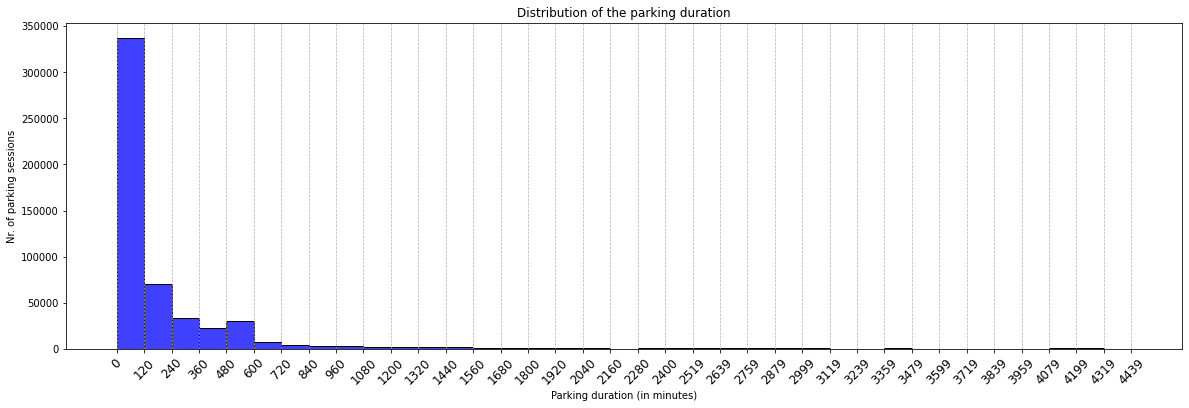

In [79]:
# The distribution of parking duration was already visualized during EDA of the column "ParkingDuration":

plt.figure(figsize=(20, 6))

sns.histplot(lot_operations_df_corrected['ParkingDuration_mins'], bins=37, color='blue')

# Ticks on x axis
bin_edges = np.histogram_bin_edges(lot_operations_df_corrected['ParkingDuration_mins'], bins=37)
plt.xticks(bin_edges, rotation=45, fontsize=12)

plt.title('Distribution of the parking duration')
plt.xlabel('Parking duration (in minutes)')
plt.ylabel('Nr. of parking sessions')
plt.grid(True, axis='x', linestyle='--', linewidth=0.7)
plt.show()

Note that during EDA it was seen that there were 13 sessions (only) were the parking duration was negative, these rows were excluded

- The chart above suggests that the vast majority of parking sessions are below 2 hours (120 minutes)

-  It is notable that there are more parking sessions between 480 and 600 minutes (8 and 10 hours) than between 360 and 480 minutes (6 and 8 hours)
    
    - The higher frqeuency of between 8 and 10 hours lasting parking activity is probably 'caused' by the pattern of users entering lots (parking cars), going to work for 8 hours, and then leaving lots (picking up cars after work)
    
- There are approximately as many sessions that took between 8 and 10 hours (480 and 600 minutes) than between 4 and 6 hours (240 and 360 minutes) 
    
- There is a significant drop in frequency of the parking sessions after the 8 - 10 hours range, meaning that there were relatively very few parking sessions that took more than 10 hours
        
    - These sessons are full-day and more than 1 day stays (parking sessions), where the maximum parking duration was 4439 minutes - approximately 3 days 

- The overall trend after the initial peak is a steady decline with a long tail. The decline slows down a bit in the mid-to-long (120 to 600 minutes -  2 to 10 hours) parking duration range

The most insightful characteristics is the significant majority of short-term parkers (below 2 hours).

In [80]:
print('Statistical overview of the parking duration distribution:')
display(lot_operations_df_corrected['ParkingDuration_mins'].describe())
display(lot_operations_df_corrected['ParkingSessionId_transaction'].describe())

Statistical overview of the parking duration distribution:


count    536416.000000
mean        226.019118
std         501.502002
min           0.000150
25%           1.865192
50%          48.141967
75%         227.264929
max        4439.084617
Name: ParkingDuration_mins, dtype: float64

count                                   536416
unique                                  536416
top       af81a304-836b-41d2-8de9-53f186d4b35c
freq                                         1
Name: ParkingSessionId_transaction, dtype: object

- The mean parking duration is ~233 minutes, but half of the parking sessions were below ~49 minutes (median), 3/4 of them took below ~228 minutes, while the longest parking session took ~4,439 minutes
    
    - It was be observed from the chart above too that the average parking duration is 'raised up' to ~226 minutes by the very few but very long parking sessions (while half of sessions are below ~49 minutes)   
    
        - The presence of outliers is also observable based on the fact that standard deviation is more than 2 times larger than the mean (501.5/226) - relative std. is ~221,9%

- 25% of parking sessions took below ~1.9 minutes

    - Were these sessions recorded with errors? Very short duration (very small time between entry and exit) sessions should be invalid sessions 

According to the performed EDA, in the original parking sessions table the "ratio of cars that has entered a lot only one time" is ~91% (753633/828399), thus the remaining ~9% (74766/828399) of cars (users) has entered a lot multiple times.

- As cars are identifying users, examining lot users in terms of parking duration would be beneficial through aggregation on the cars (plate numbers)

- As it was seen by the above descriptive analysis of the parking durations, some exceptionally long parking sessions can distort the mean, thus median would give a better representation of the users' typical parking duration


In [81]:
display(lot_operations_df_corrected.groupby('PlateNumber').agg(
    nr_of_parking_sessions=('ParkingSessionId_session', 'count'), # 'size'
    avg_parking_duration=('ParkingDuration_mins', 'mean'),
    median_parking_duration=('ParkingDuration_mins', 'median'),
    min_parking_duration=('ParkingDuration_mins', 'min'),
    max_parking_duration=('ParkingDuration_mins', 'max')
).reset_index().query('nr_of_parking_sessions > 5').head())

parkingduration_by_users = lot_operations_df_corrected.groupby('PlateNumber')['ParkingDuration_mins'].median().reset_index(name='ParkingDuration_mins_median')

,PlateNumber,nr_of_parking_sessions,avg_parking_duration,median_parking_duration,min_parking_duration,max_parking_duration
4685,1041ZMB,6,423.024328,71.675650,0.179850,1230.235350
9706,145ADSX,6,574.200839,552.137525,46.562317,1249.214817
14110,187TWJW,6,503.406006,211.366483,15.091783,1398.375550
15040,197TWJJ,6,179.179550,62.832433,12.671717,816.962133
17290,1WS748M,6,12.627236,11.315842,1.495533,25.770583


In [82]:
print(len(parkingduration_by_users))
parkingduration_by_users.head()

493104


,PlateNumber,ParkingDuration_mins_median
0,000000C,17.313033
1,0002A,9.235067
2,00040DVQ,0.983817
3,00052W,113.376733
4,000DVFI,0.901133


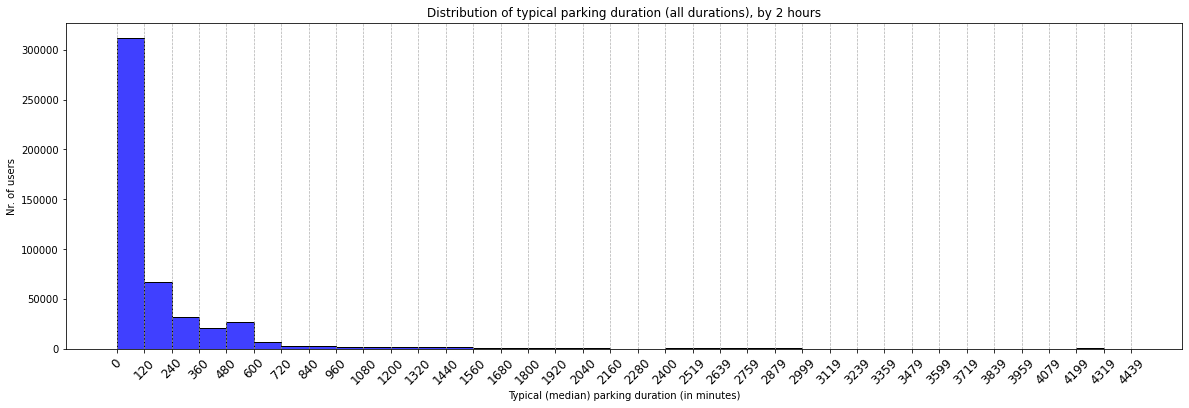

In [83]:
# Visualize distribution of typical parking duration 
plt.figure(figsize=(20, 6))
sns.histplot(parkingduration_by_users['ParkingDuration_mins_median'], bins=37, color='blue')
bin_edges = np.histogram_bin_edges(parkingduration_by_users['ParkingDuration_mins_median'], bins=37)
plt.xticks(bin_edges, rotation=45, fontsize=12)
plt.title('Distribution of typical parking duration (all durations), by 2 hours')
plt.xlabel('Typical (median) parking duration (in minutes)')
plt.ylabel('Nr. of users')
plt.grid(True, axis='x', linestyle='--', linewidth=0.7)
plt.show()


- As only 9% of users have entered a lot multiple times, the distribution of grouped parking durations is showing same characteristics as the distribution of (not grouped) parking durations:

- The chart above suggests that the vast majority of parking sessions are below 2 hours (120 minutes)

    -  it is notable that there are more users with 480 and 600 minutes (8 and 10 hours) typical parking time than user with between 360 and 480 minutes (6 and 8 hours)

        - the higher frqeuency of between 8 and 10 hours lasting parking activity is probably 'caused' by the pattern of users entering lots (parking cars), going to work for 8 hours, and then leaving lots (picking up cars after work)

    - there are approximately as many users with 8-10 hours (480 and 600 minutes) typical parking time users with 4-6 hours (240 and 360 minutes) 

    - there is a significant drop in frequency of users after the 8 - 10 hours range, meaning that there are relatively very few users with a more than 10 hours typical parking time

        - these sessons are full-day and more than 1 day stays (parking sessions), where the maximum parking duration was 4439 minutes - approximately 3 days 

- The overall trend after the initial peak is a steady decline with a long tail. The decline slows down a bit in the mid-to-long (120 to 600 minutes -  2 to 10 hours) parking duration range

    - Most insightful characteristics is the significant majority of short-term parkers (below 2 hours)

Seems like more granularity of typical parking time is needed to separate users them better.

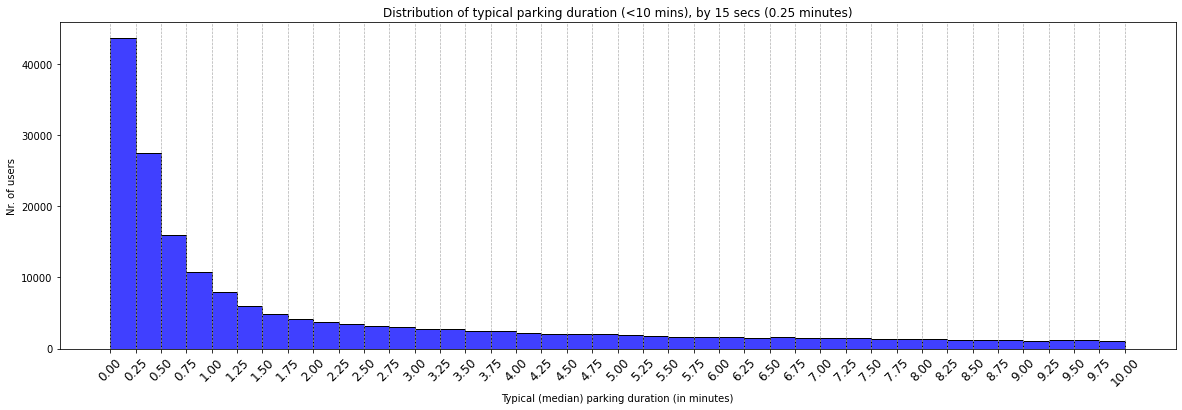

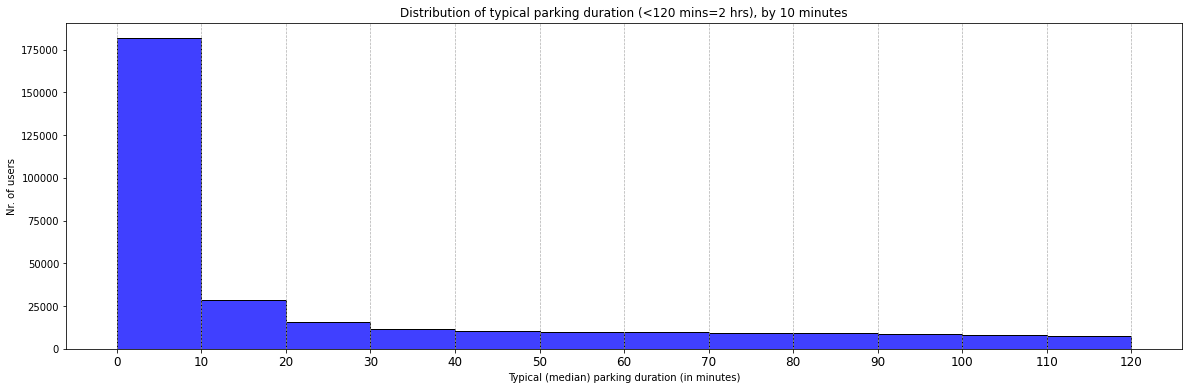

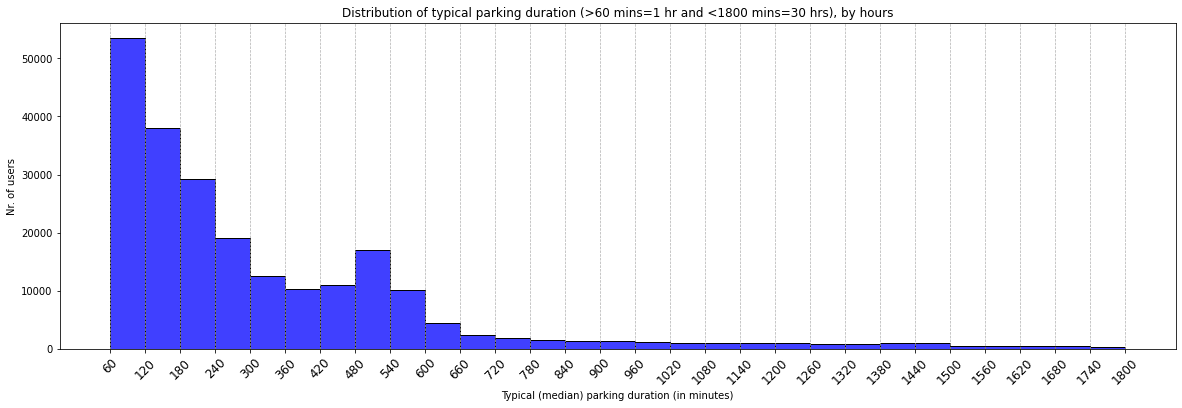

In [84]:
# Below 10 minutes
below_10_mins = parkingduration_by_users[parkingduration_by_users['ParkingDuration_mins_median'] < 10]['ParkingDuration_mins_median']
plt.figure(figsize=(20, 6))
sns.histplot(below_10_mins, bins=40, color='blue')
bin_edges = np.histogram_bin_edges(below_10_mins, bins=40)
plt.xticks(bin_edges, rotation= 45, fontsize=12)
plt.title('Distribution of typical parking duration (<10 mins), by 15 secs (0.25 minutes)')
plt.xlabel('Typical (median) parking duration (in minutes)')
plt.ylabel('Nr. of users')
plt.grid(True, axis='x', linestyle='--', linewidth=0.7)
plt.show()


# Below 2 hours
below_2_hours = parkingduration_by_users[parkingduration_by_users['ParkingDuration_mins_median'] < 120]['ParkingDuration_mins_median']
plt.figure(figsize=(20, 6))
sns.histplot(below_2_hours, bins=12, color='blue')
bin_edges = np.histogram_bin_edges(below_2_hours, bins=12)
plt.xticks(bin_edges, fontsize=12)
plt.title('Distribution of typical parking duration (<120 mins=2 hrs), by 10 minutes')
plt.xlabel('Typical (median) parking duration (in minutes)')
plt.ylabel('Nr. of users')
plt.grid(True, axis='x', linestyle='--', linewidth=0.7)
plt.show()


# 60 - 1800 percig
over_2_hours = parkingduration_by_users[(parkingduration_by_users['ParkingDuration_mins_median'] > 60) & (parkingduration_by_users['ParkingDuration_mins_median'] < 1800)]['ParkingDuration_mins_median']
plt.figure(figsize=(20, 6))
sns.histplot(over_2_hours, bins=29, color='blue')
bin_edges = np.histogram_bin_edges(over_2_hours, bins=29)
plt.xticks(bin_edges, rotation = 45, fontsize=12)
plt.title('Distribution of typical parking duration (>60 mins=1 hr and <1800 mins=30 hrs), by hours')
plt.xlabel('Typical (median) parking duration (in minutes)')
plt.ylabel('Nr. of users')
plt.grid(True, axis='x', linestyle='--', linewidth=0.7)
plt.show() 

According to the above charts (1+3) distribution charts (by grouping together bins that show similar frequencies), the following user segmentation can be created based on parking duration:

- Below 0.5 minutes: Users with a typical parking time of below 0.5 minutes are 'invalid' users as parking sessions with such low durations should have been recorded with erros. The higher ratio of this user segment can also be seen.

- 0.5 - 10 minutes: Users who entered the lot but did not actually park down their cars, just went in and either went out straight (below ~2 minutes), or looked around e.g. for a good parking space but eventually left the lot without actually parking

- 10 - 20 minutes: Users who park down their cars but eihter pick up and leave the lot right away (e.g. forgot something at home), or get done something quickly nearby the lot and then leave

- 20 - 120 minutes: Users who do some activity nearby the lot and park their cars for at most 2 hours, as for example attending one class in college and then leaving

- 120 - 240 minutes: Users who park their cars between 2 and 6 hours, and during that time do some activity that lasts for a few hours (as going to the gym for example)

- 240 - 600 minutes: Users who park their cars between 6 and 10 hours, and during that time do  some activity that lasts around half a day (if a day is ~16 hrs w/o sleeping time), such as shopping at a mall

    - 480 - 540 minutes: As identified earlies as well, there is a specific subgroup of users in the 240 - 600 minutes group - those that par their cars in order to attend work for 8 hours and then leave after the workday

- 600 - 1500 minutes: Users who park their cars between 10 and 25 hours, thus those people who leave their cars at the lot for an extensive amount of time but less than ~1 full day (~24 hours)

- Above 1500 minutes: Users who park their cars for several days (the maximum was ~4439 minutes~74 hours~3,1 days)

The wider the range of duration of the group is, the less users belong to the group.

# 5. Explain the Results

Results, findings and conclusions along the notebook are documented and explained  in-detail. <br> <br><br>

**Overview of results, findings and conclusions:** <br><br>

Insight into parking usage patterns

- The analysis reveals distinct patterns in parking lot usage for example by length of parking. Understanding these patterns and segmenting users enables better resource allocation, operational planning, and the potential for optimizing parking management strategies. It can also inform decisions about pricing structures such as hourly versus daily rates. <br><br>

Peak times identification

- By identifying peak parking times, stakeholders can enhance service levels during high-demand periods, such as increasing staffing or implementing dynamic pricing strategies. This can lead to improved customer satisfaction and increased revenue.<br><br>

Transaction analysis

- The examination of transaction amounts, including the occurrence of failed transactions (zero or negative amounts), provides insights into customer payment behavior. This information can help identify potential issues in payment processing and customer service, guiding improvements in the payment system.  <br><br>

Insightful visualizations

- The visualizations effectively communicate complex data in a digestible format, making it easier for stakeholders to grasp key insights and trends. This supports data-driven decision-making, enhancing operational efficiency and strategic planning.<br><br>

Created new features

- The new features can help refine predictive modeling and enable targeted marketing efforts. For example, recognizing frequent users could allow for loyalty programs or targeted discounts

- Further significanse and usability of the each new features is detailed at the respective question.




# 6. Bonus task

In [87]:
# Check missing ParkingSessionId-s in the transactions table
int(transactions_df["ParkingSessionId"].isna().sum())

124931

In [88]:
run_code = False

if run_code:

    transactions_df_filled = transactions_df.copy()

    # Iterate over the transactions and fill if ParkingSessionId is missing
    for transaction_index, transaction in transactions_df_filled.iterrows():
        print(transaction_index)
        if pd.isna(transaction['ParkingSessionId']):

            # Check for a match among the sessions
            for _, session in parking_sessions_with_lots_df_adjusted_times.iterrows(): # named the returned index as '_' since it is not used 

                if (session['PlateNumber'][:-1] == transaction['PlateNumber'][:-1] and 
                    len(session['PlateNumber']) == len(transaction['PlateNumber']) and # Levenshtein distance: minimum number of single-character edits required to change a string into another,
                                                                                    # and as this single-character is for sure the last chracter, there should be a condition for equal lengths of the strings too
                    session['EntryDate'] <= transaction['TransactionDate'] <= session['ExitDate']): # "The transaction time should be always between the parking session start and end time"
                    
                    transactions_df_filled.loc[transaction_index, 'ParkingSessionId'] = session['ParkingSessionId']
                    print("SessionId filled in the transactions dataframe")

Running the above cell in local environment runs 'forever'

- Trying to make the same computation in Google Colab, in the same notebook where the date standardization was done: https://colab.research.google.com/drive/1NB2a-BqdGhSFRmi7cV2Qhdw-XMnSWsV1?usp=sharing

    -  After 7h 30m 42s runtime it is still only at row 2519 (there are 661 355 rows for the transaction df)
    
    - Therefore stopping the computation in the Colab notebook

In [ ]:

transactions_df.to_csv('transactions_df_2.csv', index=False)
# parking_sessions_with_lots_df_adjusted_times.to_csv('parking_sessions_with_lots_df_adjusted_times_2.csv', index=False) # This file couldn't be uploaded to Colab, thus using the original 'parking_sessions.csv' there

# 7. Different table merging approach

As the task description (pdf) was not always 100% straightforwardly interpretable for me, experimented with a slightly different interpretation and merging approach as well

In [90]:
# # -- Merge tables -- 2
#     # The parking sessions and the lots are already matched, match transactions:

# # In case there would be leading and trailing spaces, but I wouldn't assume them for such an Id column
# parking_sessions_with_lots_df_adjusted_times['ParkingSessionId'] = parking_sessions_with_lots_df_adjusted_times['ParkingSessionId'].str.strip()
# transactions_df['ParkingSessionId'] = transactions_df['ParkingSessionId'].str.strip()

# # Follow the merging process with shapes of dfs
# print(parking_sessions_with_lots_df_adjusted_times.shape)
# print(transactions_df.shape)
# print()
# print()

# display(parking_sessions_df["ParkingSessionId"].describe())
# display(transactions_df["ParkingSessionId"].describe())
# print()


# lot_operations_df = pd.merge(parking_sessions_with_lots_df_adjusted_times,
#                             transactions_df,
#                             on='ParkingSessionId', # During EDA it was seen that there is a many-to-many relationship between the two PlateNumber columns, thus it wouldn't be appropriate to join on it (resulting table would be the Cartesian product)
#                             how='left', 
#                             suffixes=('_by_Lot', '_by_User'))
# print(lot_operations_df.shape)

In [91]:
# Question: Are there any discrepancies during merging?
    # According to EDA the column "PlateNumber" is in both dataframes (from parking_session and from transactions tables as well),
    #  therefore need to add suffixes to advoid conflicting column names in the resulting table, 
        # Pandas performs this by default by adding _x and _y suffixes
        # Better to specify it in for easier identification of columns later and better interpretability

In [92]:
# # Check columns
# display(lot_operations_df.columns)
# # First column seems wrong, check:  
# display(lot_operations_df[lot_operations_df.columns[0]]) # or lot_operations_df.iloc[:, 0]

# # As it seems an unnecessary index column (starting from 0 and increasing 1 by 1), drop it
# lot_operations_df = lot_operations_df.drop(lot_operations_df.columns[0], axis=1)
# # Check again:
# display(lot_operations_df.columns)

In [93]:
# # First overview of top 5 rows
# display(lot_operations_df.head())

# # Explore the data counts and data types of columns of the merged table I have now
# display(lot_operations_df.info())

# # Some of the findings based on the .info:
#     # EntryDate, ExitDate and TransactionDate columns are not in datetime format
#     # In case such type of data cleaning would be necessary for example for modeling:
#         # In columns where the transaction is missing, missing values could be imputed as '' for columns containing strings ('object'), and as 0-s for the Amount and TransactionSuccesful columns
#             # After imputation the Amount and TransactionSuccesful columns could be converted to ints instead of floats (as it was seen by EDA the Amount takes only whole dollars values)
#             # TransactionDate could be imputed with a 'datetime format' string and then be converted to datetime data type

In [94]:
# # Check the two PlateNumber columns in the resulting table
# display(lot_operations_df[['ParkingSessionId', 'PlateNumber_by_Lot', 'TransactionId', 'PlateNumber_by_User']].head(15))

# # The two PlateNumber columns seem to be the same when the one given by the user is filled (so there is a transaction), check:
# print("Overview of TransactionId")
# display(lot_operations_df["TransactionId"].describe())

# print("Nr. of rows where the two PlateNumbers are matching:", len(lot_operations_df[lot_operations_df['PlateNumber_by_Lot'] == lot_operations_df['PlateNumber_by_User']]))
# print("Nr. of rows where 'PlateNumber_by_User' is Not a missing value:", lot_operations_df["TransactionId"].notna().sum())
# print()

# print("Nr. of rows where 'PlateNumber_by_User' is a missing value:", lot_operations_df["TransactionId"].isna().sum())

In [95]:
# print(536416 + 404667)
# print(len(lot_operations_df))
# print()

# # 536416 (PlateNumbers are matching) + 404667 (PlateNumber_by_User is a missing value) = 941083 = length of dataframe (941083, 27)
# # Thus the plate numbers are always matching if there is a transaction 

# print("TransactionId in the transactions table:")
# display(transactions_df["TransactionId"].describe())

# print("Nr. (and ratio) of transactions (TransactionId) in the merged table:")
# print(lot_operations_df['TransactionId'].notna().sum(), lot_operations_df['TransactionId'].notna().sum()/transactions_df["TransactionId"].count())
# # Out of the 661 355 transactions in the transaction table, 536 416 transactions were matched to the parking sessions (81,1% of all transactions)
#     # This in line with the findings of EDA for the "TransactionId" column: 'Among all the transactions close to 1/5 (18,9%) of them are such invalid charges (unlinked transactions)'

# # "If there is no transaction with the matching plate number, the parking lot user might not pay for the parking, or there might be an error."
#     #If the payment is valid that should be shown on a field as welL"
# # Creating new label to differentiate valid and invalid payments
# lot_operations_df["IsPaymentValid"] = np.where(lot_operations_df['TransactionId'].isna(), 0, 1)
# # Check:
# display(lot_operations_df[['ParkingSessionId', 'PlateNumber_by_Lot', 'TransactionId', 'PlateNumber_by_User', 'IsPaymentValid']].head(10))

In [96]:
# # Check the "IsTransactionSuccessful" column in the resulting table
# print("Resulting lot operations merged table:")
# display(lot_operations_df["IsTransactionSuccessful"].value_counts())
# print()

# # Compare the same column in the right-side transactions table
# print("Transactions table: ")
# display(transactions_df["IsTransactionSuccessful"].value_counts())
# print()

# # Seems like all the transactions matched to the parking sessions were successful transactions (a transaction was labelled as failed when the amount was negative or zero)
# # Since the payment was valid when there is a transaction for that session and all matched transactions are valid payment, these two columns are redundant
#     # however the newly created IsPaymentValid column contains 0-s instead of missing values (easier to handle and calculate with) 
#         # Missing values in IsTransactionSuccessful could have been imputed as 0-s as well 

# # Confirm:
# print("Resulting lot operations merged table:")
# display(lot_operations_df["IsPaymentValid"].value_counts())